# Coronavirus (COVID-19) Visualization & Prediction  
Coronavirus is a family of viruses that are named after their spiky crown. The novel coronavirus, also known as SARS-CoV-2, is a contagious respiratory virus that first reported in Wuhan, China. On 2/11/2020, the World Health Organization designated the name COVID-19 for the disease caused by the novel coronavirus. This notebook aims at exploring COVID-19 through data analysis and projections. 

 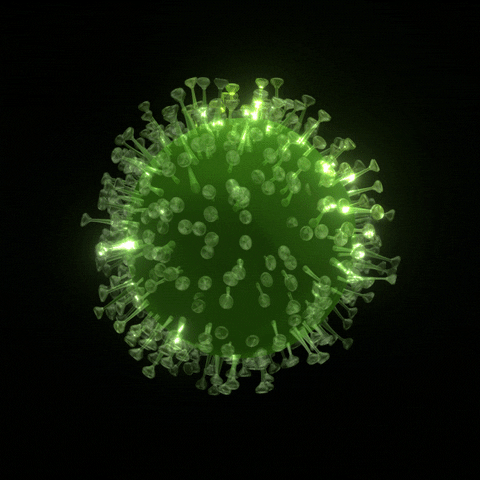
 

## History of COVID-19 Basically in India
On January 30, India reported its first case of COVID-19 in Kerala, which rose to three cases by February 3; all were students who had returned from Wuhan, China.No significant rise in cases was seen in the rest of February.

On 22 March 2020, India observed a 14-hour voluntary public curfew at the instance of the prime minister Narendra Modi.The government followed it up with lockdowns in 75 districts where COVID cases had occurred as well as all major cities.Further, on 24 March, the prime minister ordered a nationwide lockdown for 21 days, affecting the entire 1.3 billion population of India.

The transmission escalated during March, after several cases were reported all over the country, most of which were linked to people with a travel history to affected countries. On 12 March, a 76-year-old man who had returned from Saudi Arabia became the first victim of the virus in the country.On 4 March, 22 new cases came to light, including those of an Italian tourist group with 14 infected members.But number of cases start increasing dramtically after 19th March, but in the month of April it has been its peak.
   
* <a href='#world_wide_graphs'>Exploring Global Coronavirus Cases</a>
* <a href='#country_graphs'>Exploring Coronavirus Cases From Different Countries</a>
* <a href='#prediction'>Worldwide Confirmed Cases Prediction</a>
* <a href='#data_table'>Data Table</a>
* <a href='#pie_charts'>Pie Charts</a>
* <a href='#bar_charts'>Bar Charts</a>

## Symptoms of Covid 19

In [67]:
symptoms={'symptom':['Fever',
        'Dry cough',
        'Fatigue',
        'Sputum production',
        'Shortness of breath',
        'Muscle pain',
        'Sore throat',
        'Headache',
        'Chills',
        'Nausea or vomiting',
        'Nasal congestion',
        'Diarrhoea',
        'Haemoptysis',
        'Conjunctival congestion'],'percentage':[87.9,67.7,38.1,33.4,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]}

symptoms=pd.DataFrame(data=symptoms,index=range(14))

In [68]:
import plotly.offline as pxy
import plotly.express as px
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

fig = px.bar(symptoms[['symptom', 'percentage']].sort_values('percentage', ascending=False), 
             x="percentage", y="symptom", color='symptom',color_discrete_sequence = px.colors.cyclical.IceFire
              ,title='Symptom of Coronavirus',orientation='h')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)')
fig.update_traces(textposition='inside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.update_layout(barmode='stack')
fig.update_layout(plot_bgcolor='rgb(275, 270, 273)',yaxis_title='Symptoms',xaxis_title='Percentages')
fig.update_layout(template = 'plotly_white')
fig.show()


## First of all let's import the data

In [69]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
import warnings
warnings.filterwarnings("ignore")

In [70]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
# recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/05-10-2021.csv')
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/05-10-2021.csv')


In [71]:
latest_data.head()

FIPS Admin2 Province_State Country_Region          Last_Update       Lat  \
0   NaN    NaN            NaN    Afghanistan  2021-05-11 04:20:41  33.93911   
1   NaN    NaN            NaN        Albania  2021-05-11 04:20:41  41.15330   
2   NaN    NaN            NaN        Algeria  2021-05-11 04:20:41  28.03390   
3   NaN    NaN            NaN        Andorra  2021-05-11 04:20:41  42.50630   
4   NaN    NaN            NaN         Angola  2021-05-11 04:20:41 -11.20270   

       Long_  Confirmed  Deaths  Recovered   Active Combined_Key  \
0  67.709953      62063    2698    54382.0   4983.0  Afghanistan   
1  20.168300     131753    2416   118041.0  11296.0      Albania   
2   1.659600     124288    3335    86554.0  34399.0      Algeria   
3   1.521800      13429     127    13021.0    281.0      Andorra   
4  17.873900      28875     636    24772.0   3467.0       Angola   

   Incident_Rate  Case_Fatality_Ratio  
0     159.428834             4.347196  
1    4578.254222             1.833734  
2     283.432255             2.683284  
3   17380.443927             0.945714  
4      87.856035             2.202597

In [72]:
confirmed_df.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  5/3/21  5/4/21  5/5/21  5/6/21  \
0        0        0        0        0  ...   60300   60563   60797   61162   
1        0        0        0        0  ...  131276  131327  131419  131510   
2        0        0        0        0  ...  122717  122999  123272  123473   
3        0        0        0        0  ...   13295   13316   13340   13363   
4        0        0        0        0  ...   27133   27284   27529   27921   

   5/7/21  5/8/21  5/9/21  5/10/21  5/11/21  5/12/21  
0   61455   61755   61842    62063    62403    62718  
1  131577  131666  131723   131753   131803   131845  
2  123692  123900  124104   124288   124483   124682  
3   13390   13406   13423    13429    13447    13470  
4   28201   28477   28740    28875    29146    29405  

[5 rows x 481 columns]

In [73]:
cols = confirmed_df.keys()


Get all the dates for the ongoing coronavirus pandemic 
## Now preprocessing the data

In [74]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
# recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [75]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
# recovery_rate = [] 
# total_recovered = [] 
# total_active = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
#     recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
#     total_recovered.append(recovered_sum)
#     total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
#     recovery_rate.append(recovered_sum/confirmed_sum)

Getting daily increases and moving averages

In [76]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)


# recoveries
# world_daily_recovery = daily_increase(total_recovered)
# world_recovery_avg = moving_average(total_recovered, window)
# world_daily_recovery_avg = moving_average(world_daily_recovery, window)


# active 
# world_active_avg = moving_average(total_active, window)

In [77]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
# total_recovered = np.array(total_recovered).reshape(-1, 1)

Future forcasting

In [78]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

Convert integer into datetime for better visualization

In [79]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

## Now Train the model for future forecasting

In [80]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], world_cases[50:], test_size=0.03, shuffle=False) 

Model for predicting No of confirmed cases. I am using support vector machine and polynomial regression in this example. We will show the results in the later section. 

In [81]:
# # use this to find the optimal parameters for SVR
# c = [0.01, 0.1, 1]
# gamma = [0.01, 0.1, 1]
# epsilon = [0.01, 0.1, 1]
# shrinking = [True, False]

# svm_grid = {'C': c, 'gamma' : gamma, 'epsilon': epsilon, 'shrinking' : shrinking}

# svm = SVR(kernel='poly', degree=3)
# svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=30, verbose=1)
# svm_search.fit(X_train_confirmed, y_train_confirmed)

In [82]:
# svm_search.best_params_

In [83]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

MAE: 27671779.342749853
MSE: 767713415383125.9


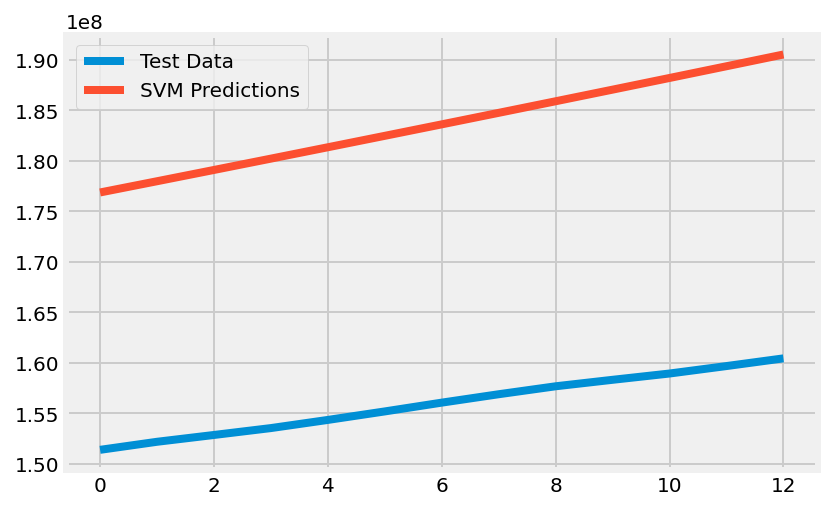

In [84]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [85]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [86]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 9885988.077205645
MSE: 100764643482019.17


In [87]:
print(linear_model.coef_)

[[-1.15201378e+07  3.16272127e+05 -2.69833574e+03  1.19108185e+01
  -1.29424703e-02]]


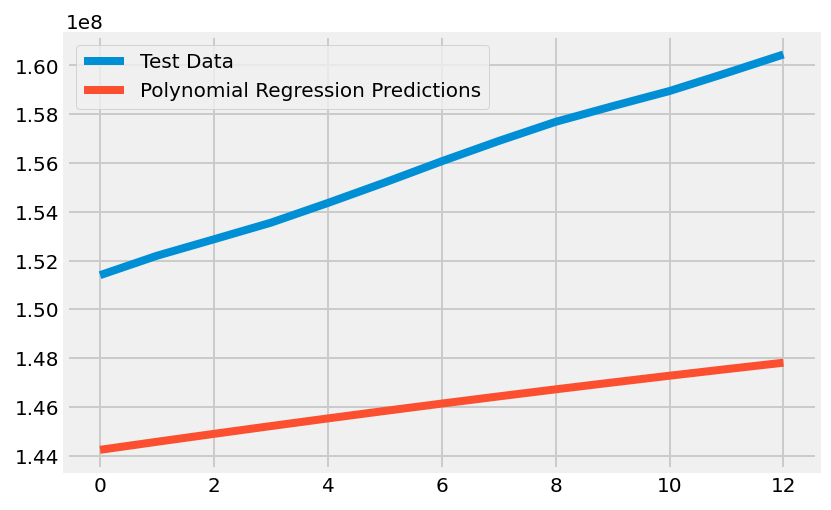

In [88]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

# Worldwide Overview By Visualizing
Graphing the number of confirmed cases and mortality rate (CFR). This gives us a big picture of the ongoing pandemic. 
 <a id='world_wide_graphs'></a>

In [89]:
# helper method for flattening the data, so it can be displayed on a bar graph 
def flatten(arr):
    a = [] 
    arr = arr.tolist()
    for i in arr:
        a.append(i[0])
    return a

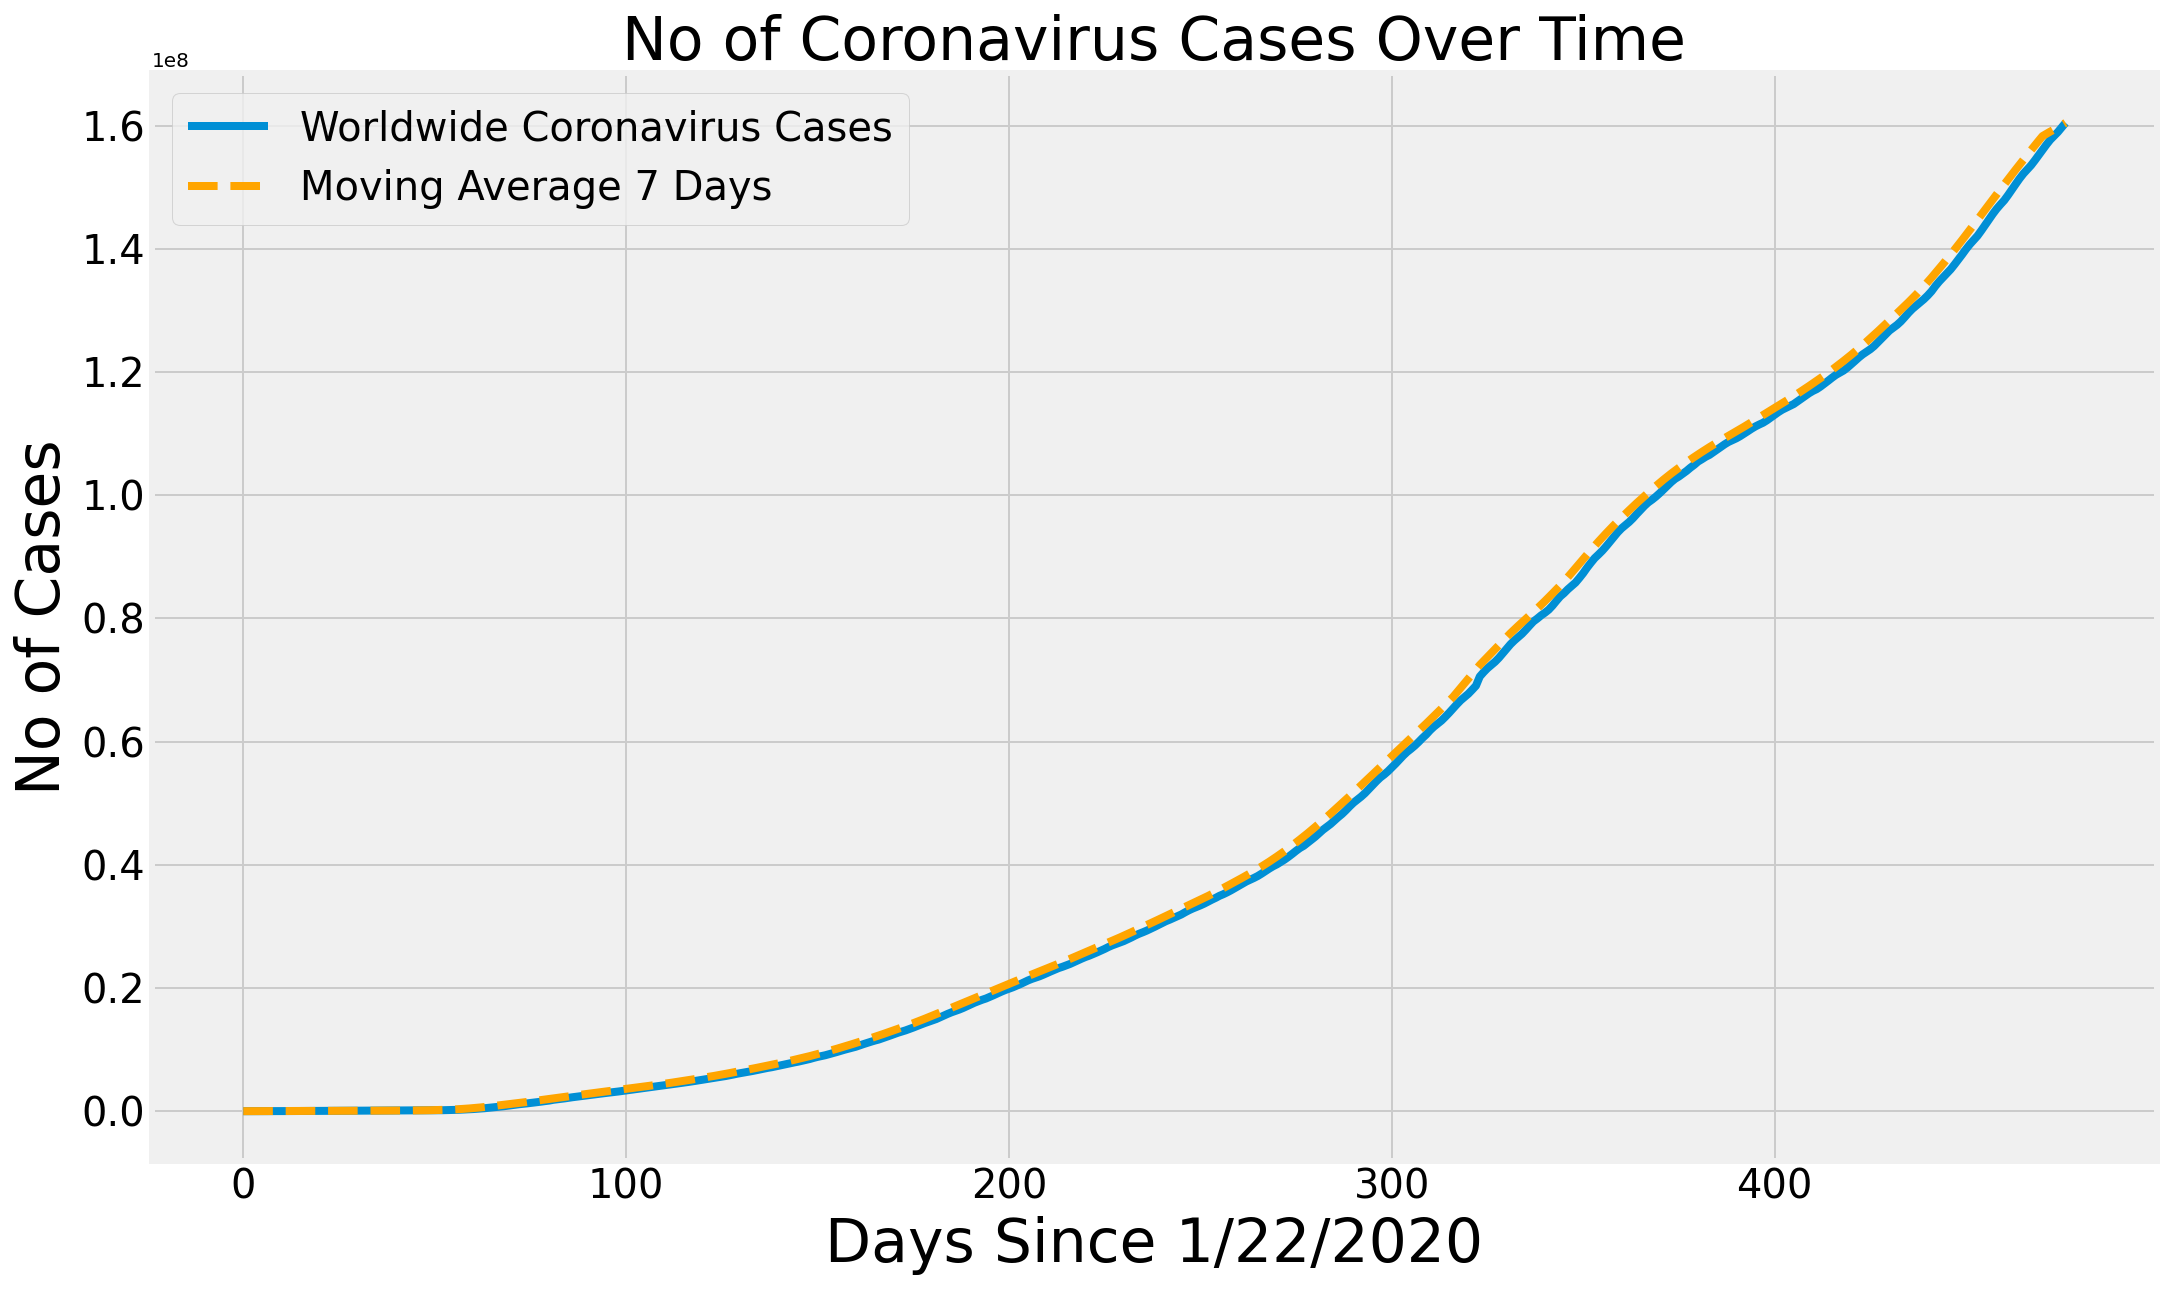

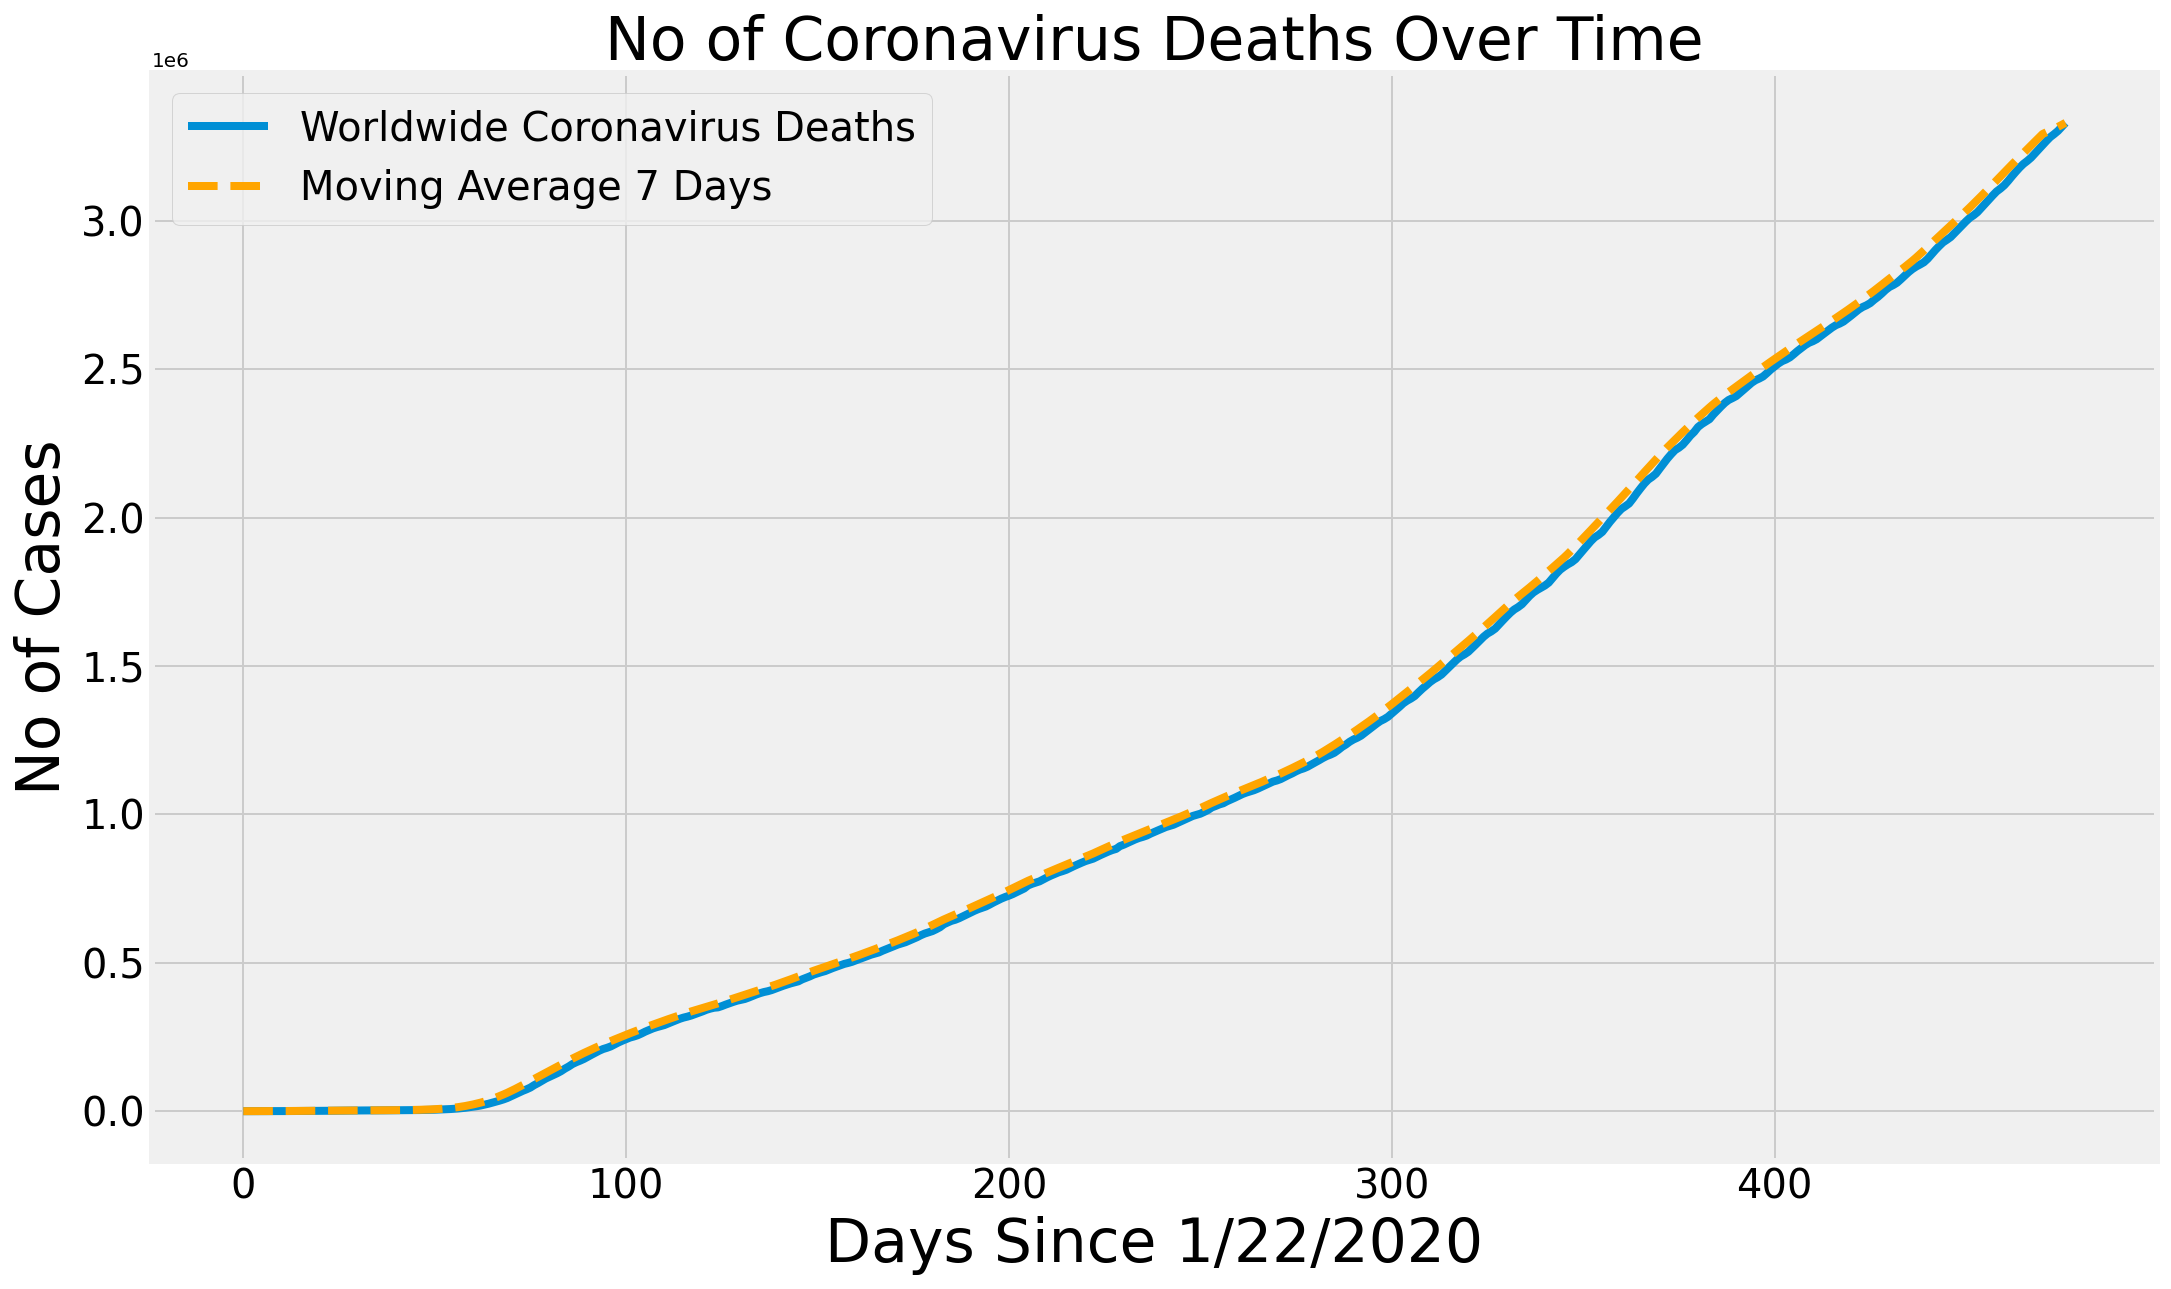

In [90]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, world_cases)
plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('No of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No of Cases', size=30)
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, world_death_avg, linestyle='dashed', color='orange')
plt.title('No of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No of Cases', size=30)
plt.legend(['Worldwide Coronavirus Deaths', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

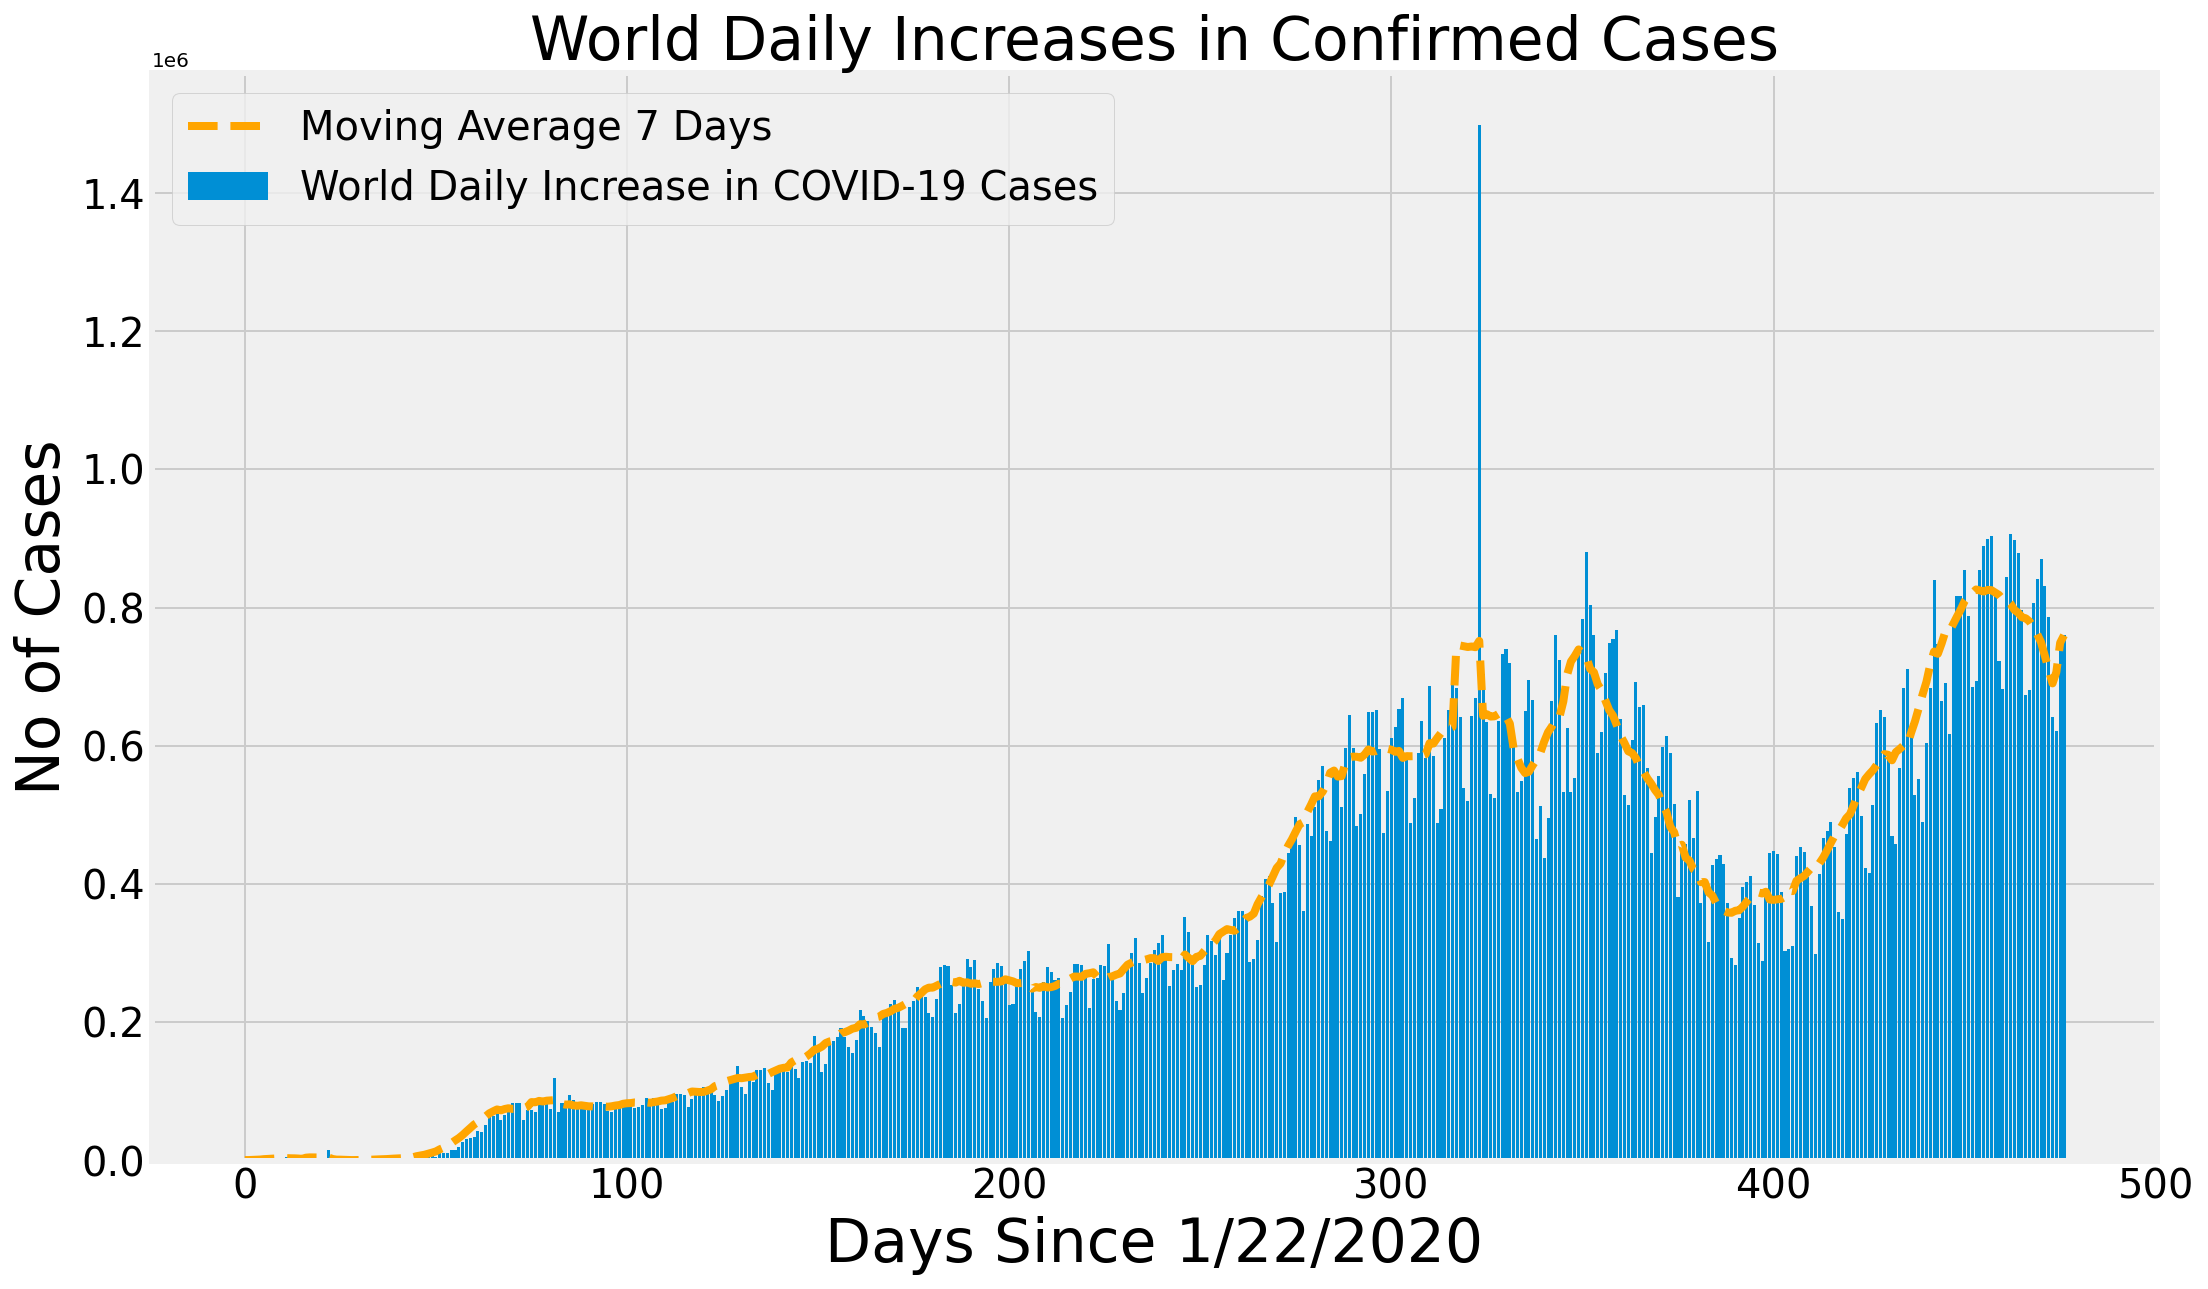

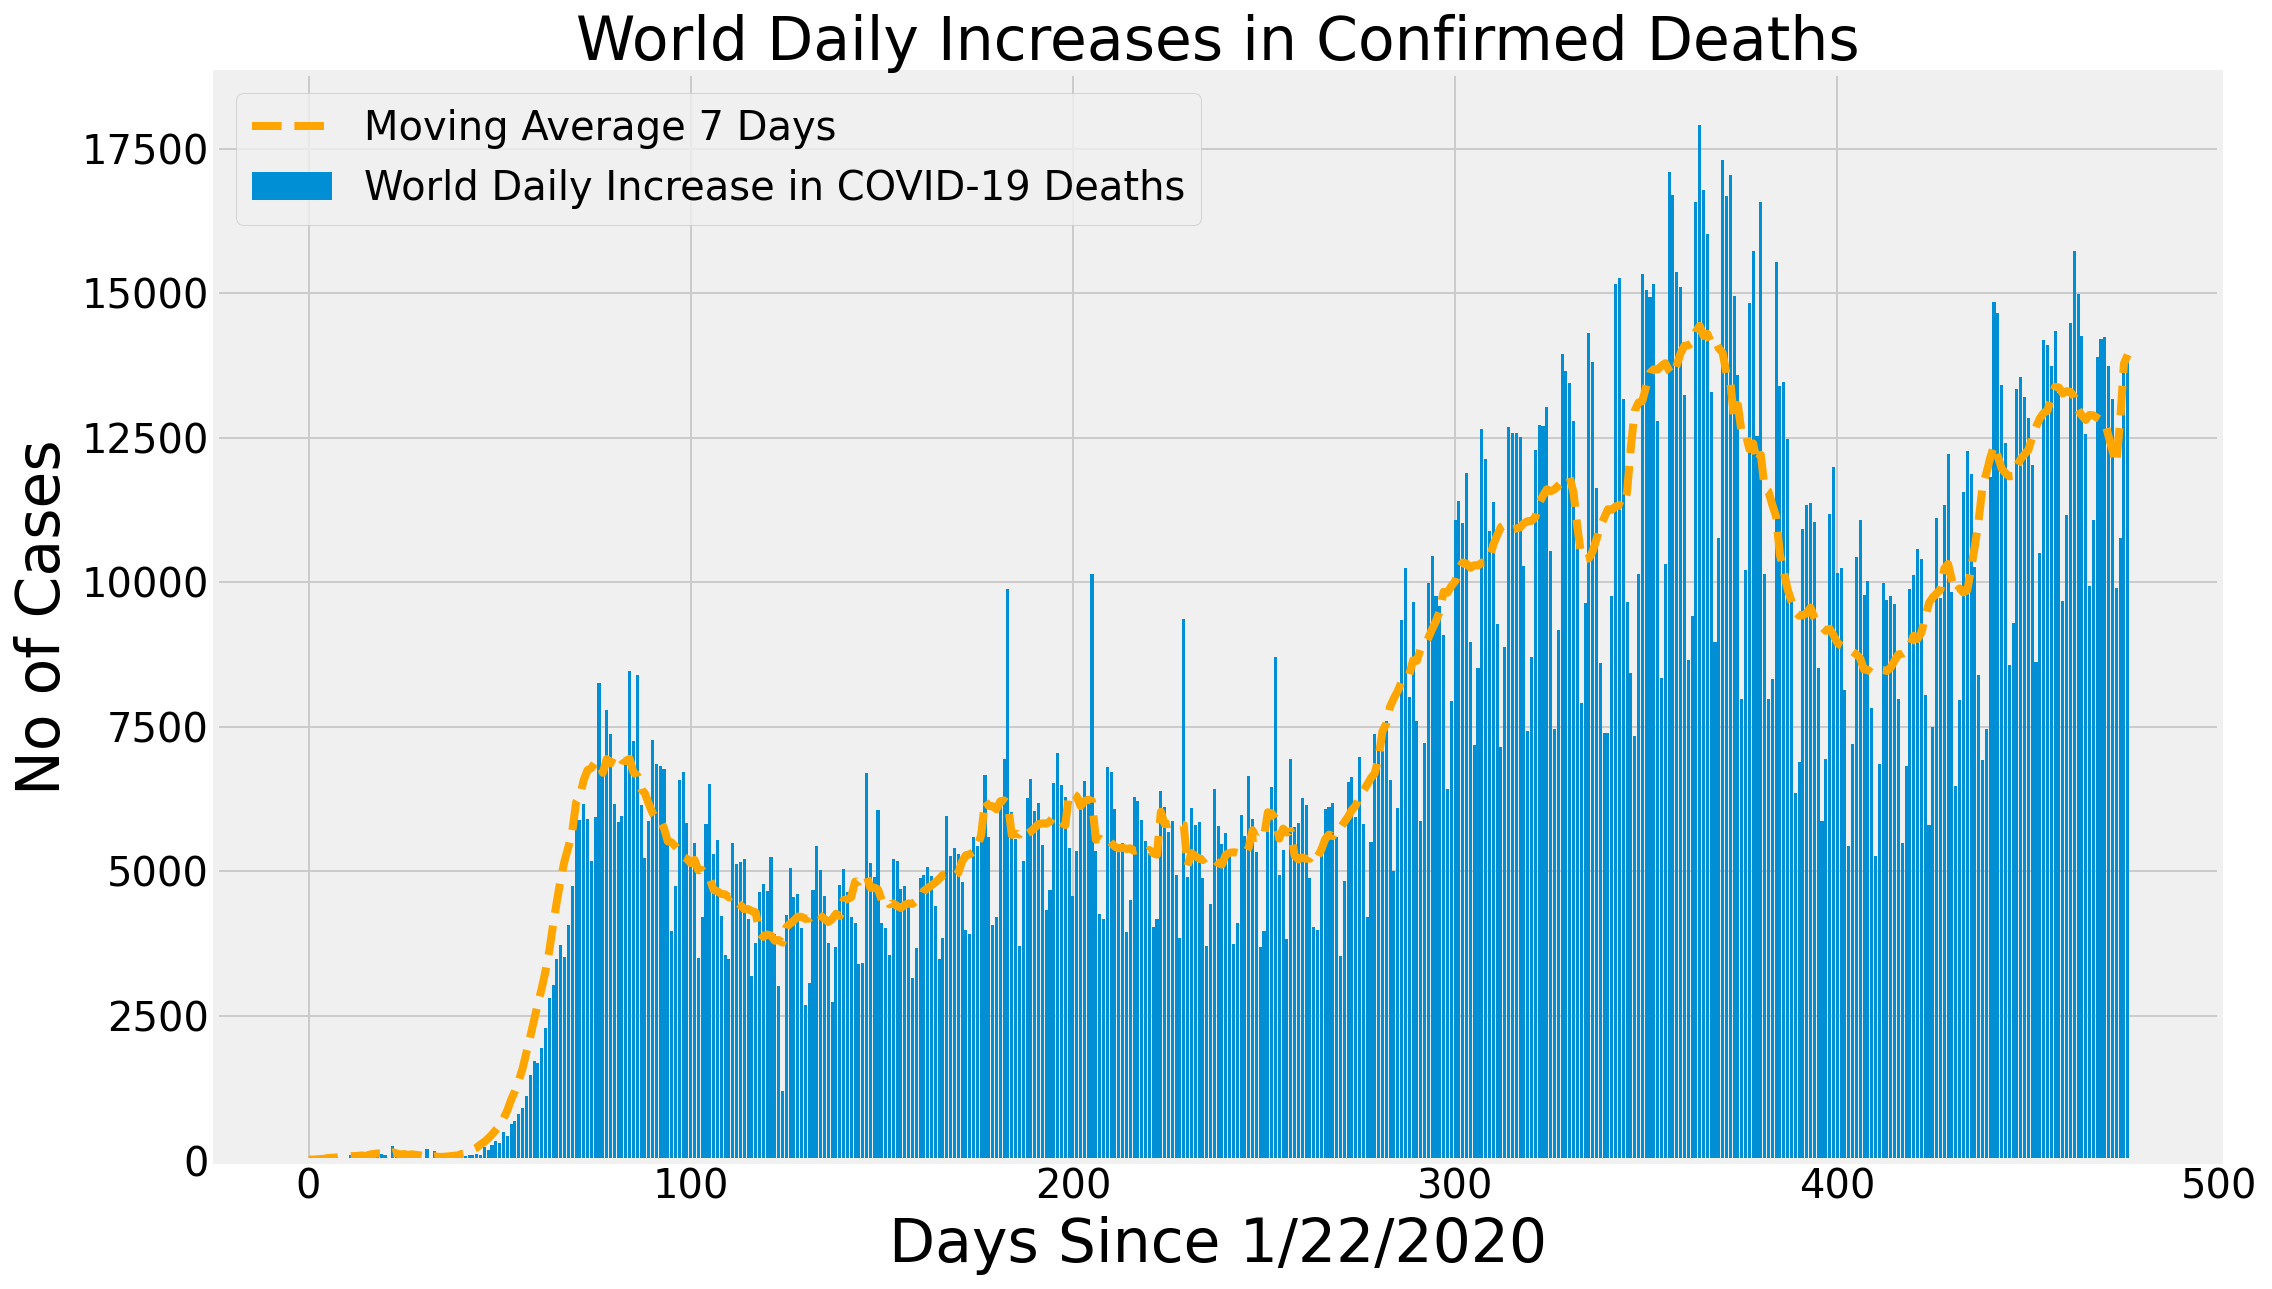

In [91]:
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_increase)
plt.plot(adjusted_dates, world_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_death)
plt.plot(adjusted_dates, world_daily_death_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('No of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Deaths'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()



In [92]:
def country_plot(x, y1, y2, y3, country):
    # window is set as 14 in in the beginning of the notebook 
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)
#     recovery_increase_avg = moving_average(y4, window)
    
    plt.figure(figsize=(16, 10))
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(window)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('No of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y2)
    plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('No of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('No of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
      
# helper function for getting country's cases, deaths, and recoveries        
def get_country_info(country_name):
    country_cases = []
    country_deaths = []
#     country_recoveries = []  
    
    for i in dates:
        country_cases.append(confirmed_df[confirmed_df['Country/Region']==country_name][i].sum())
        country_deaths.append(deaths_df[deaths_df['Country/Region']==country_name][i].sum())
#         country_recoveries.append(recoveries_df[recoveries_df['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths)
    
    
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)
#     country_daily_recovery = daily_increase(country_recoveries)
    
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_name)
    

# Country Specific Graphs
Unlike the previous section, we are taking a look at specific countries. This allows us to examine the pandemic at a local level. 
<a id='country_graphs'></a>

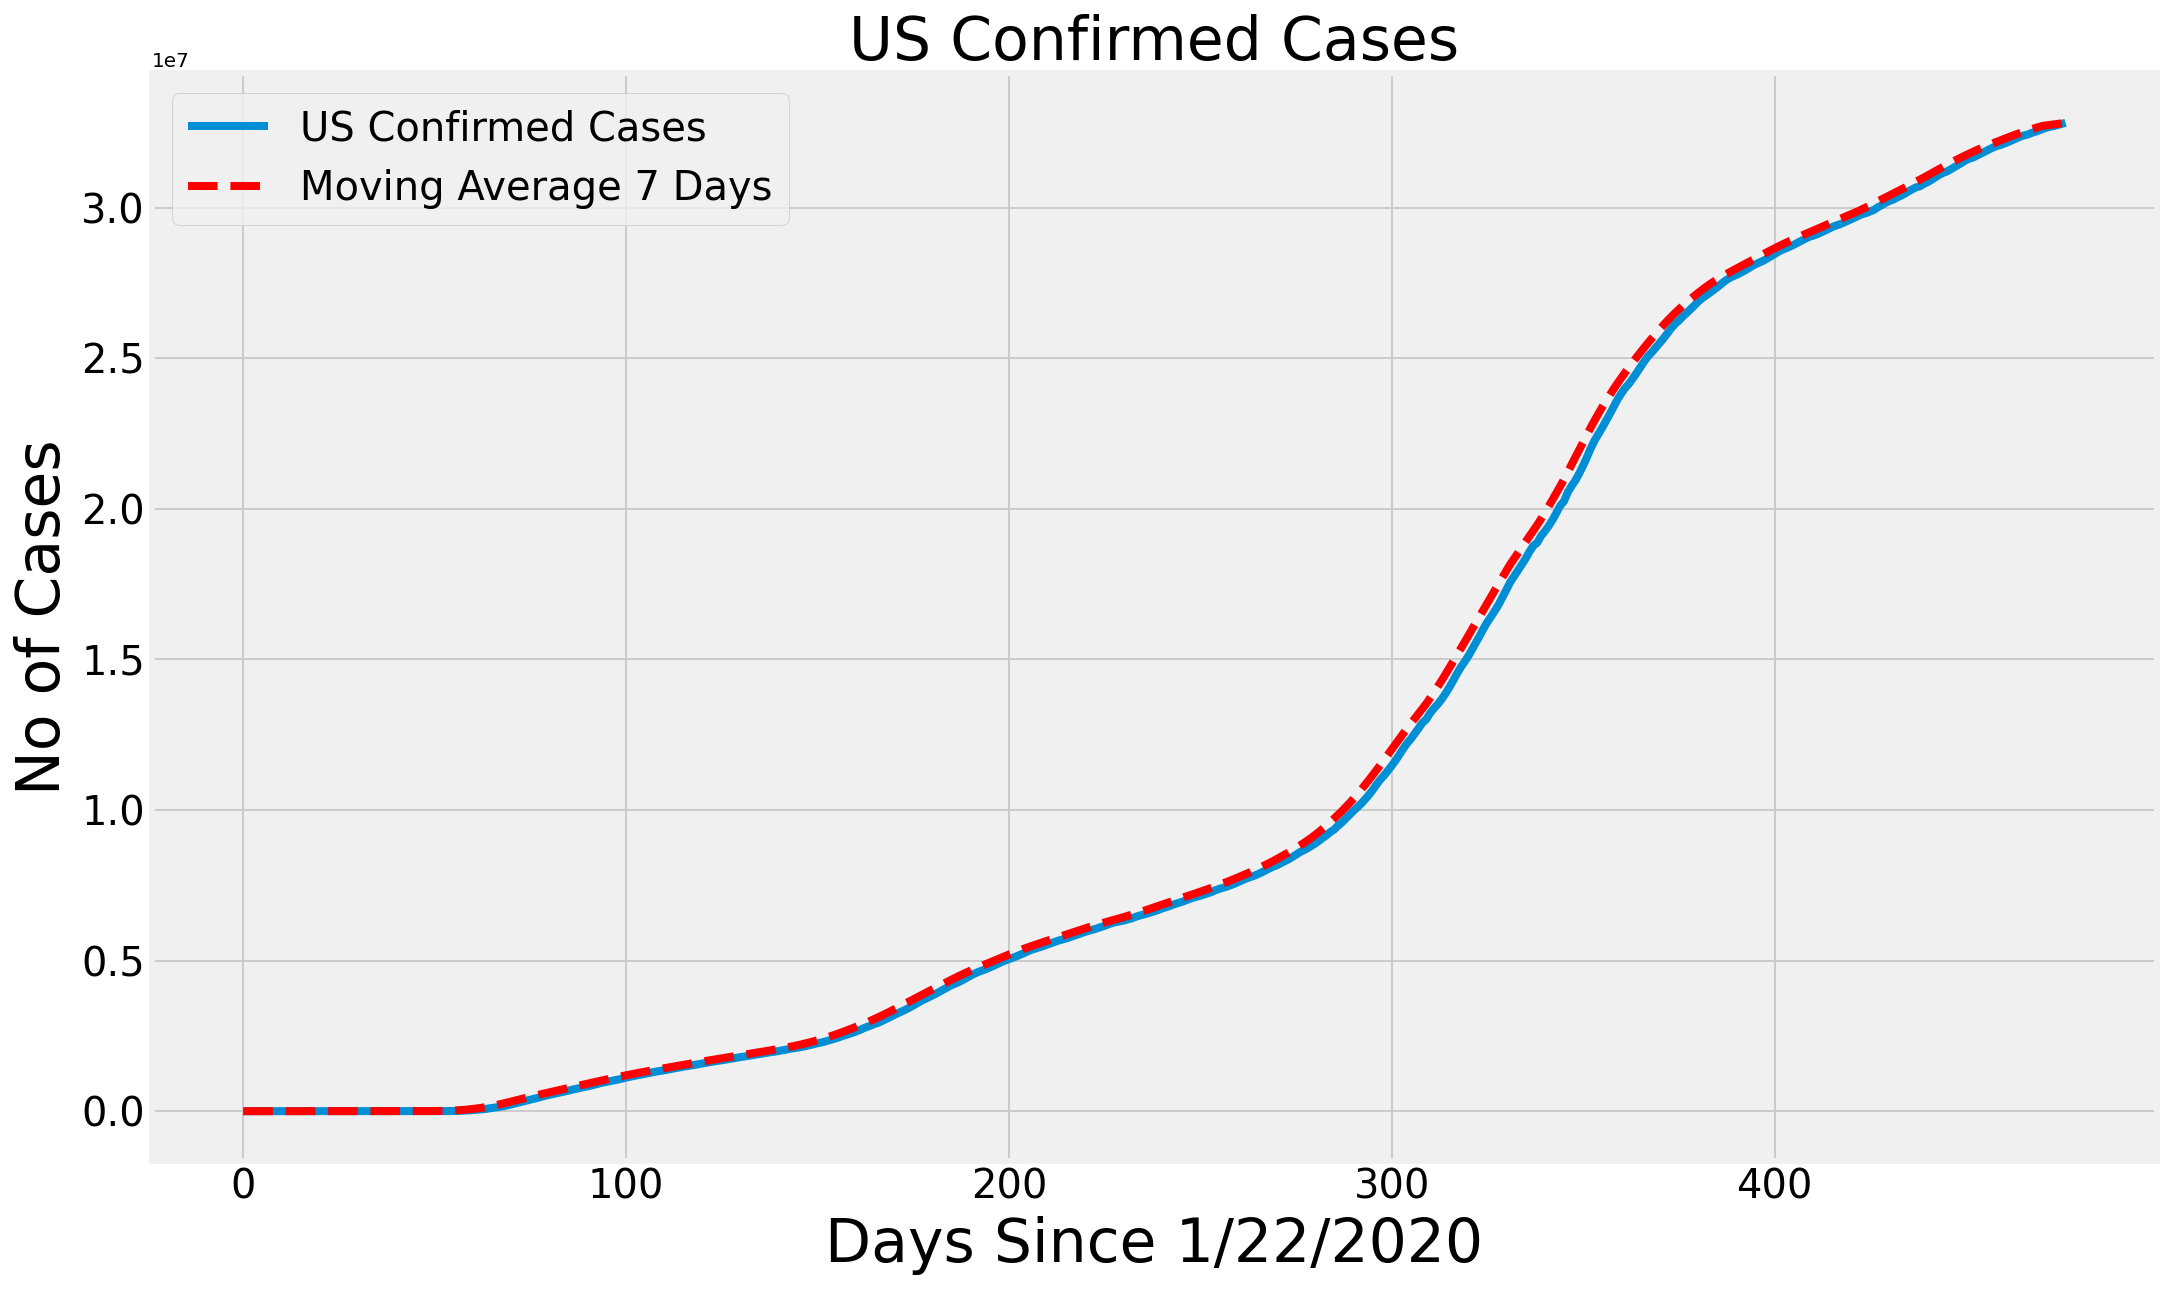

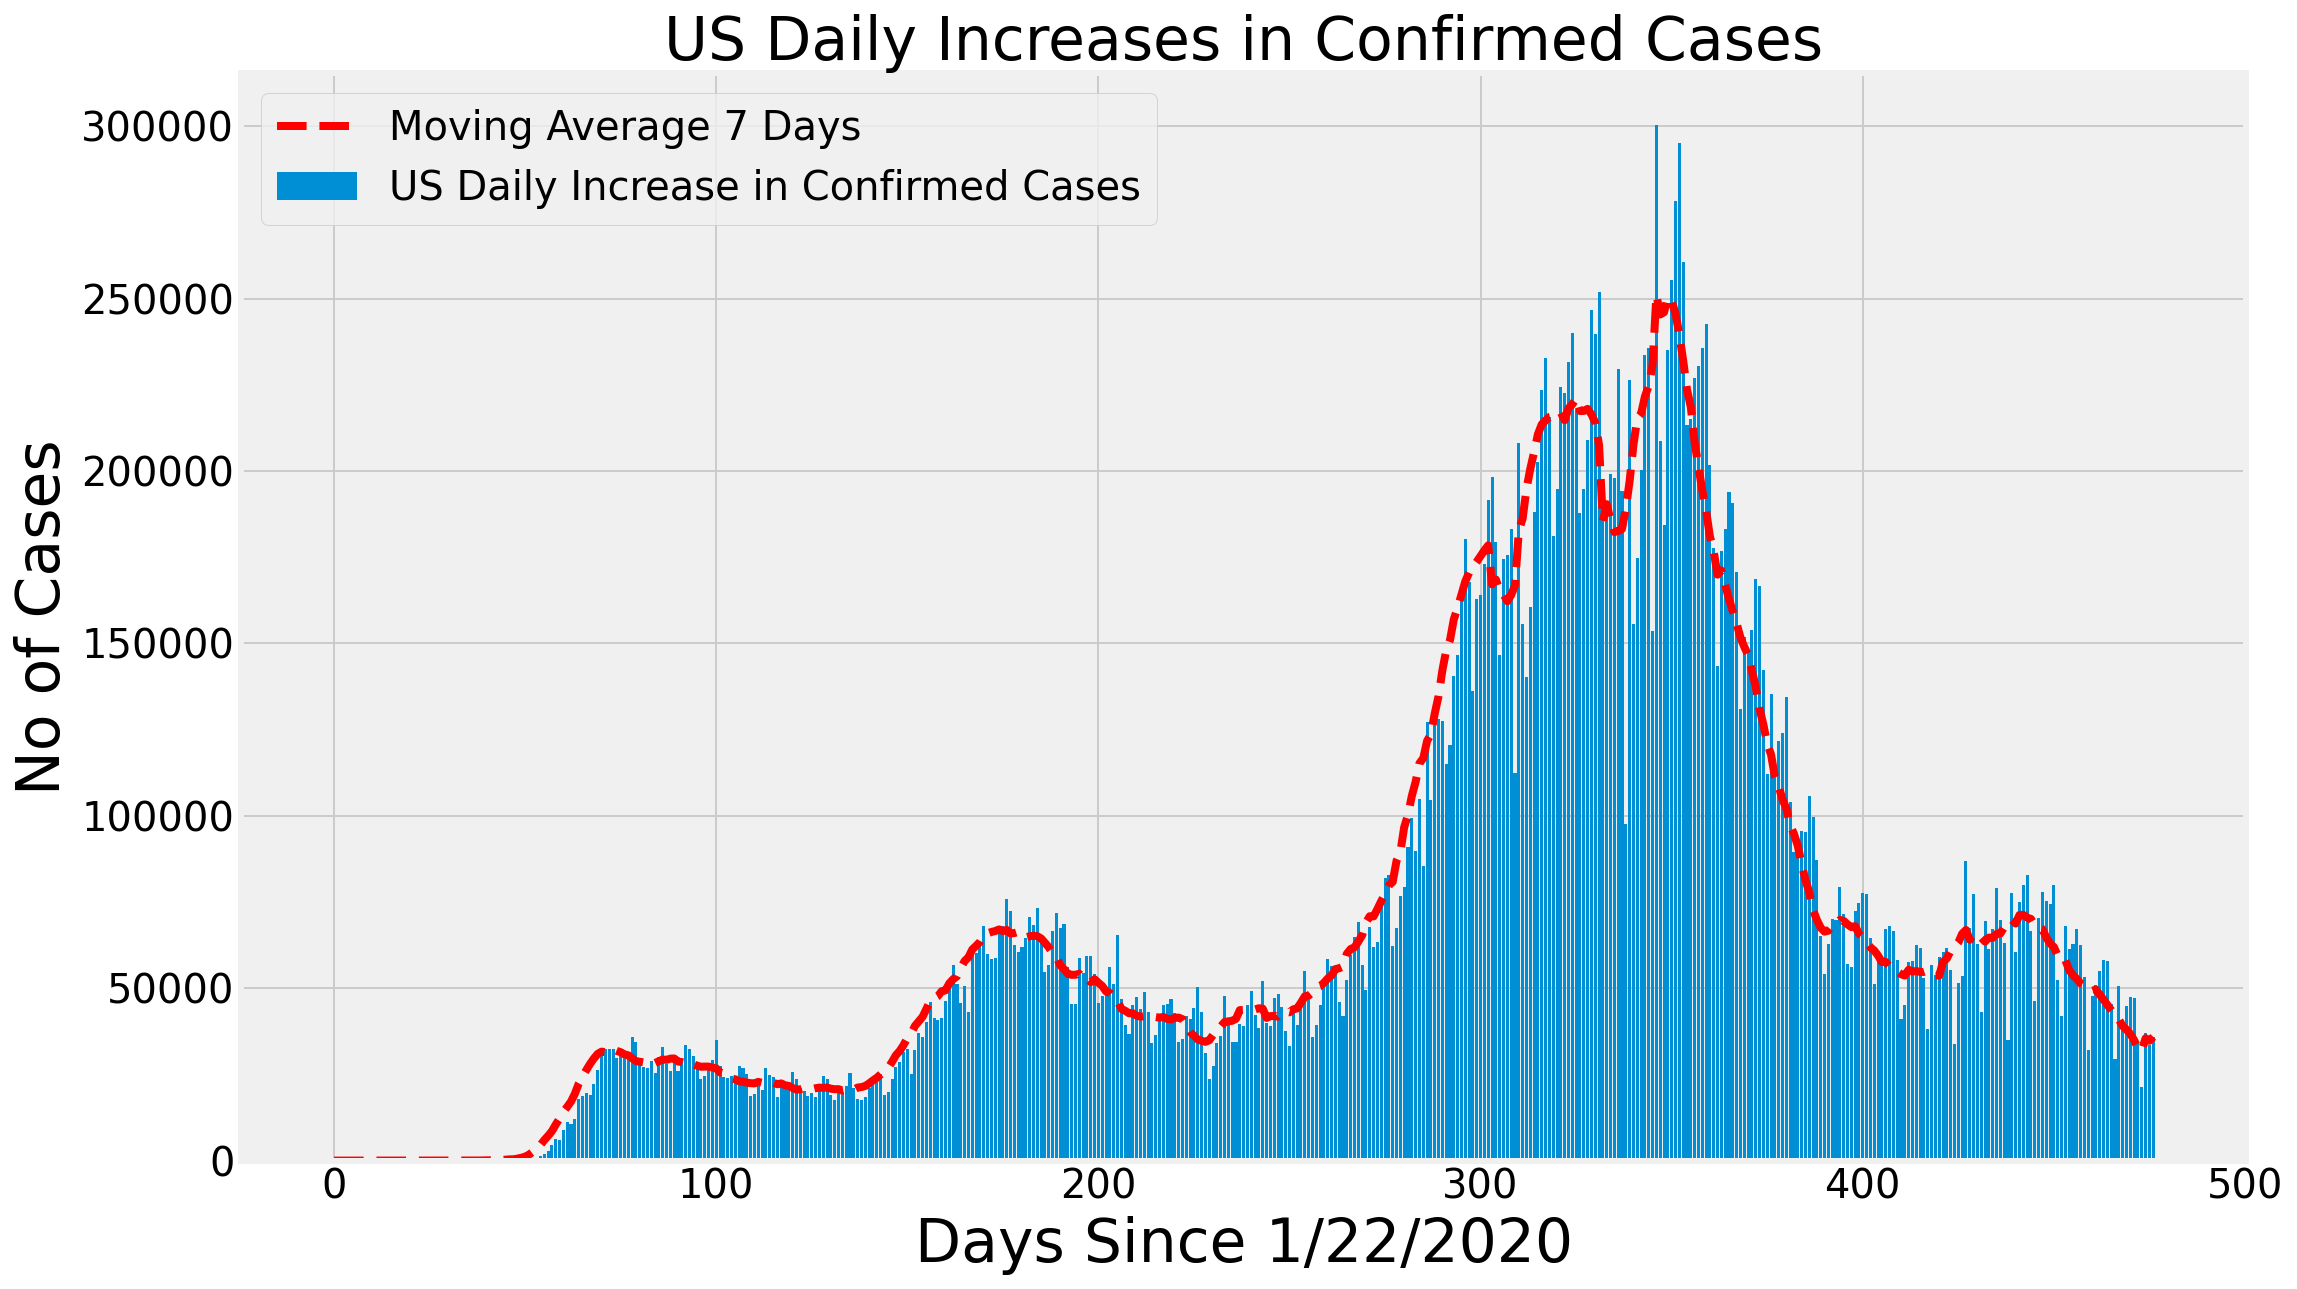

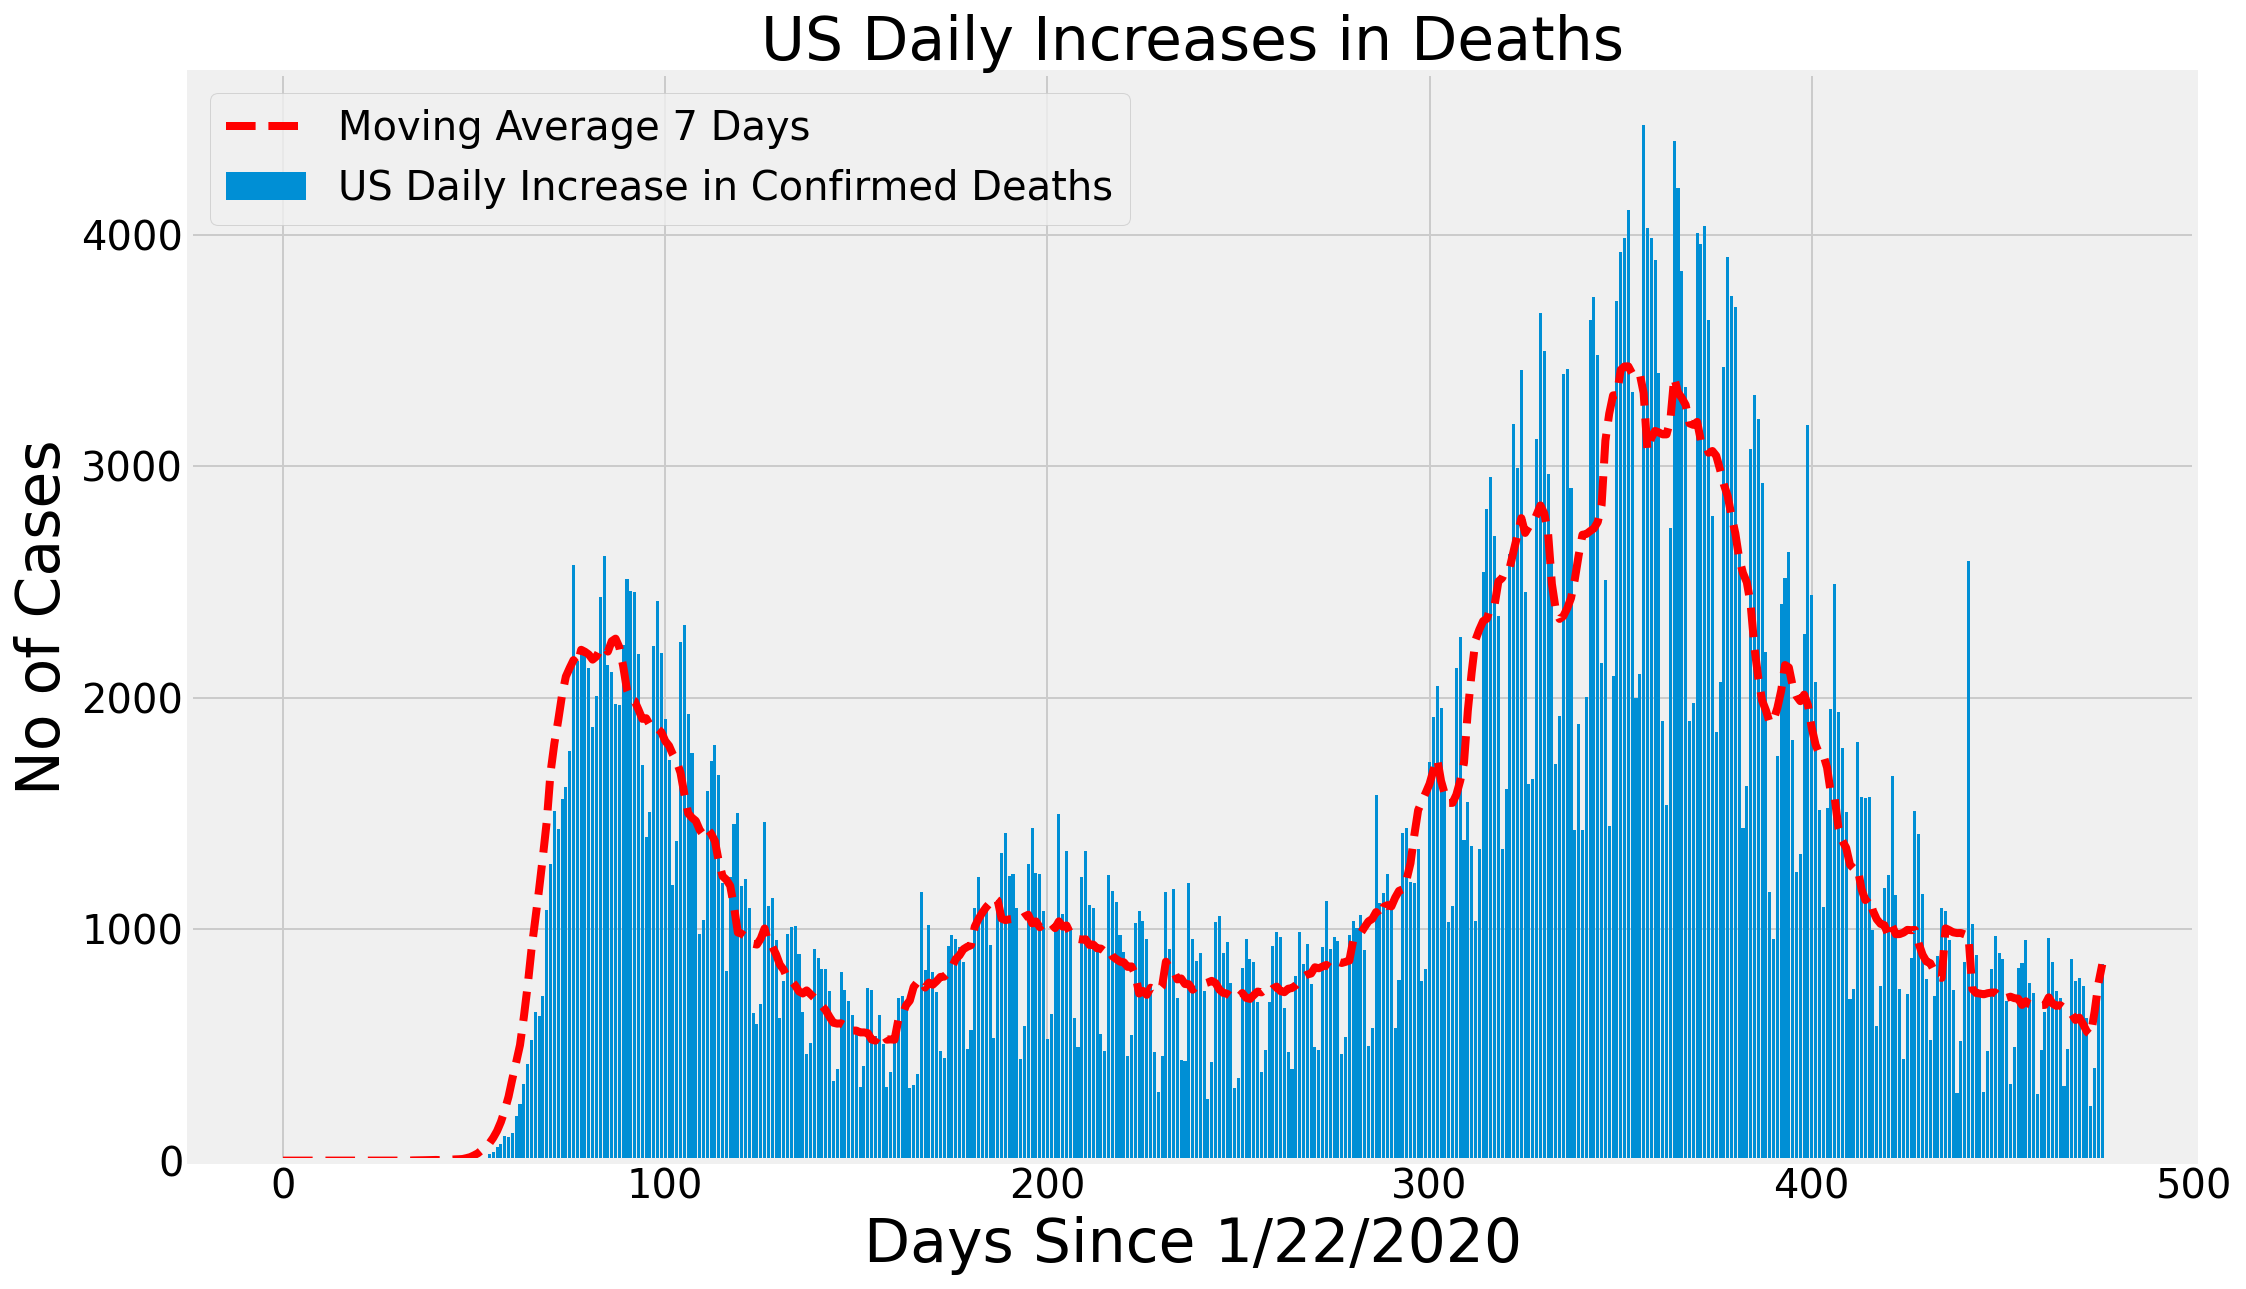

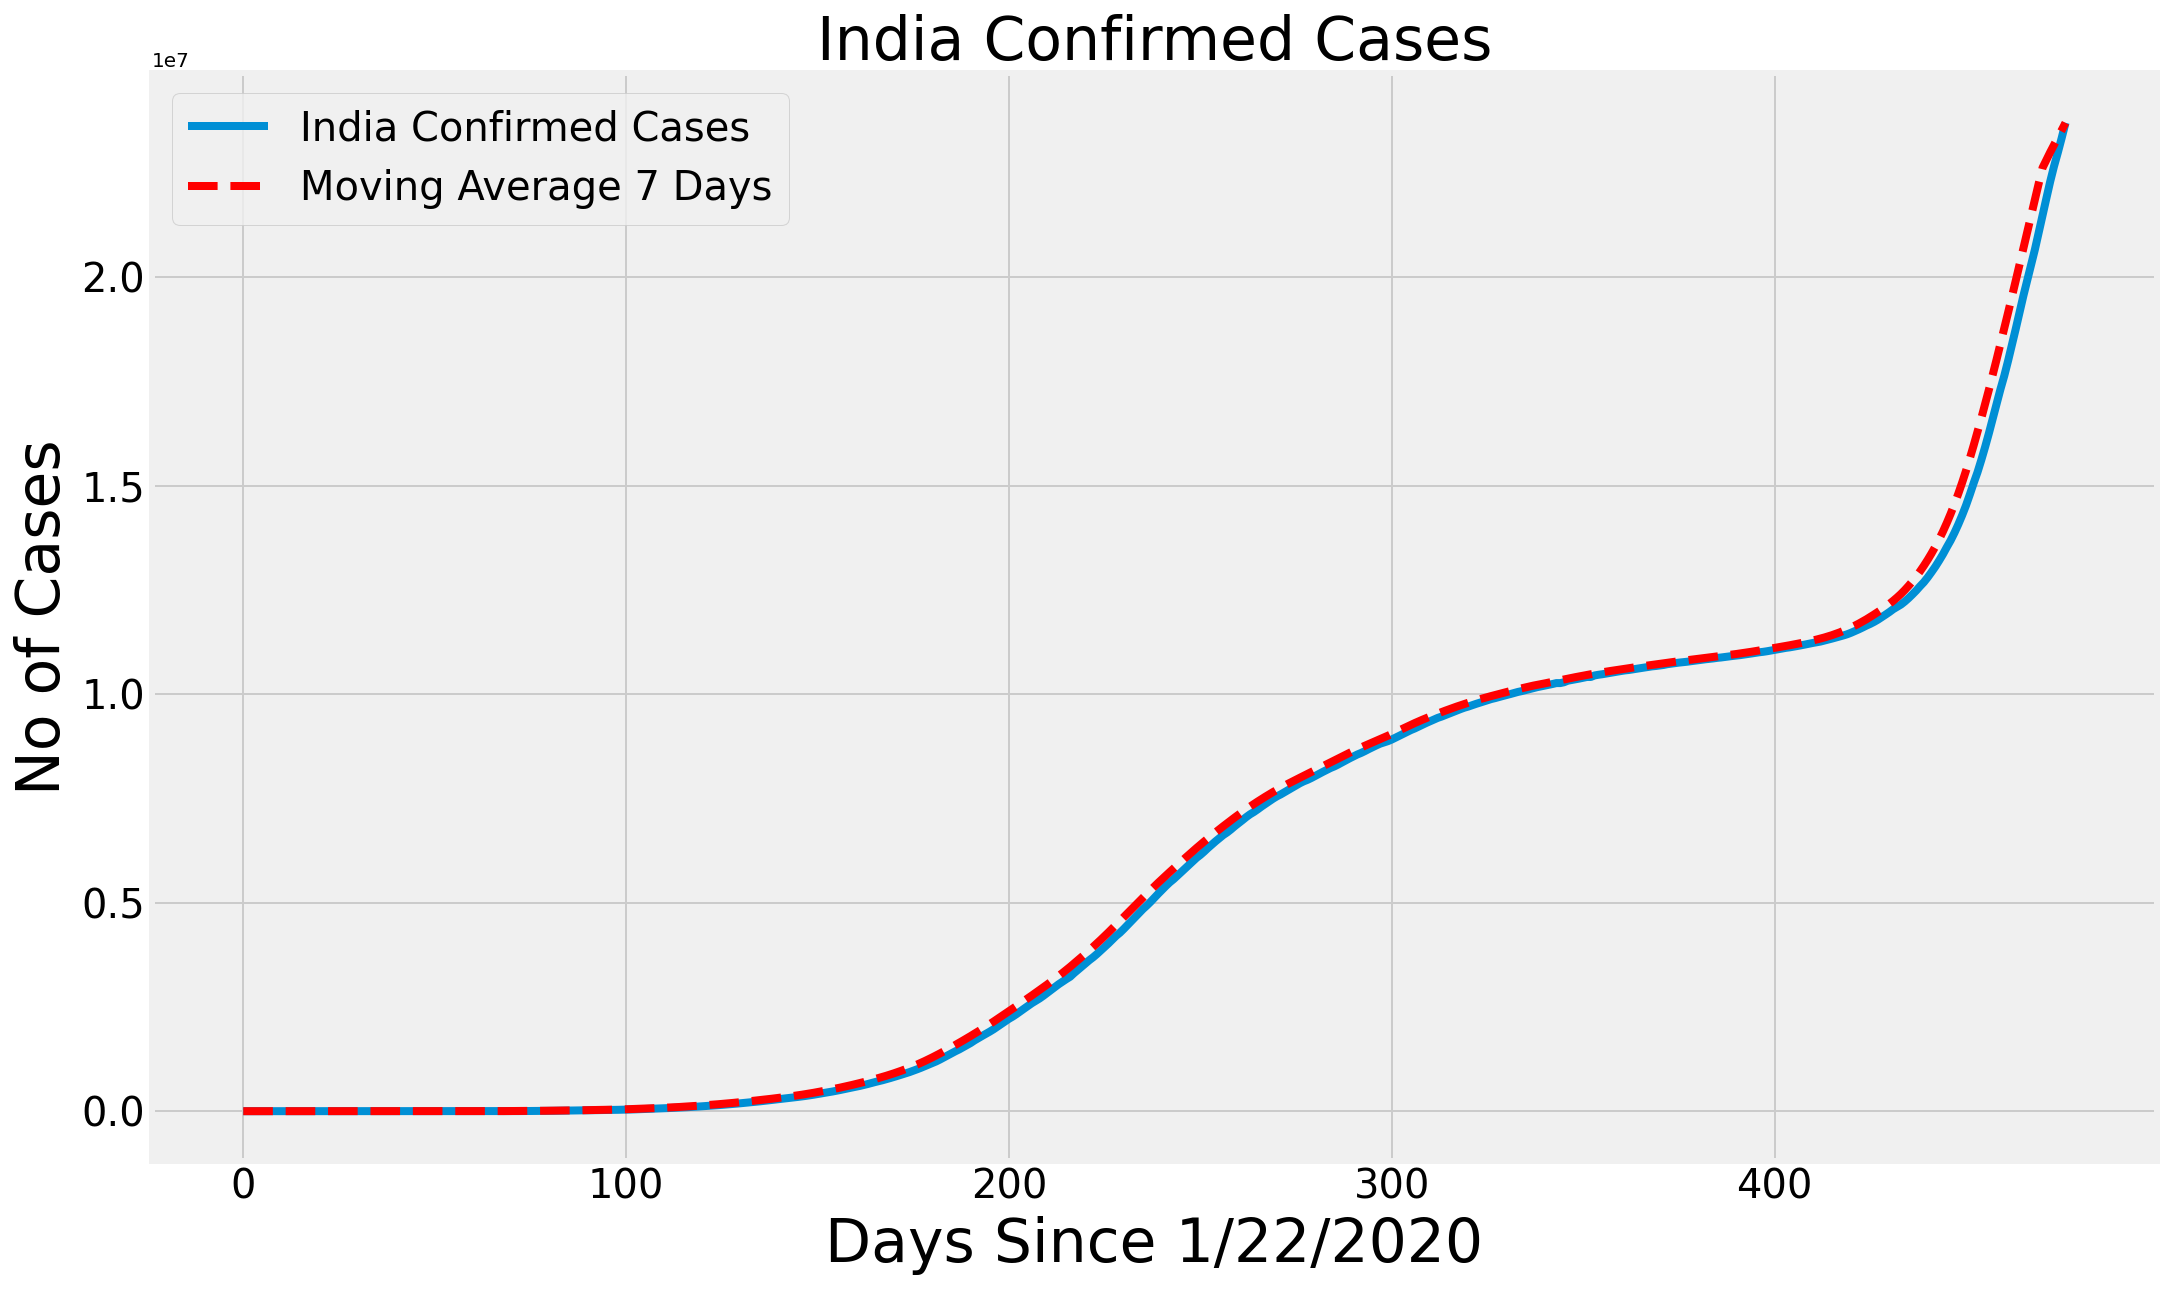

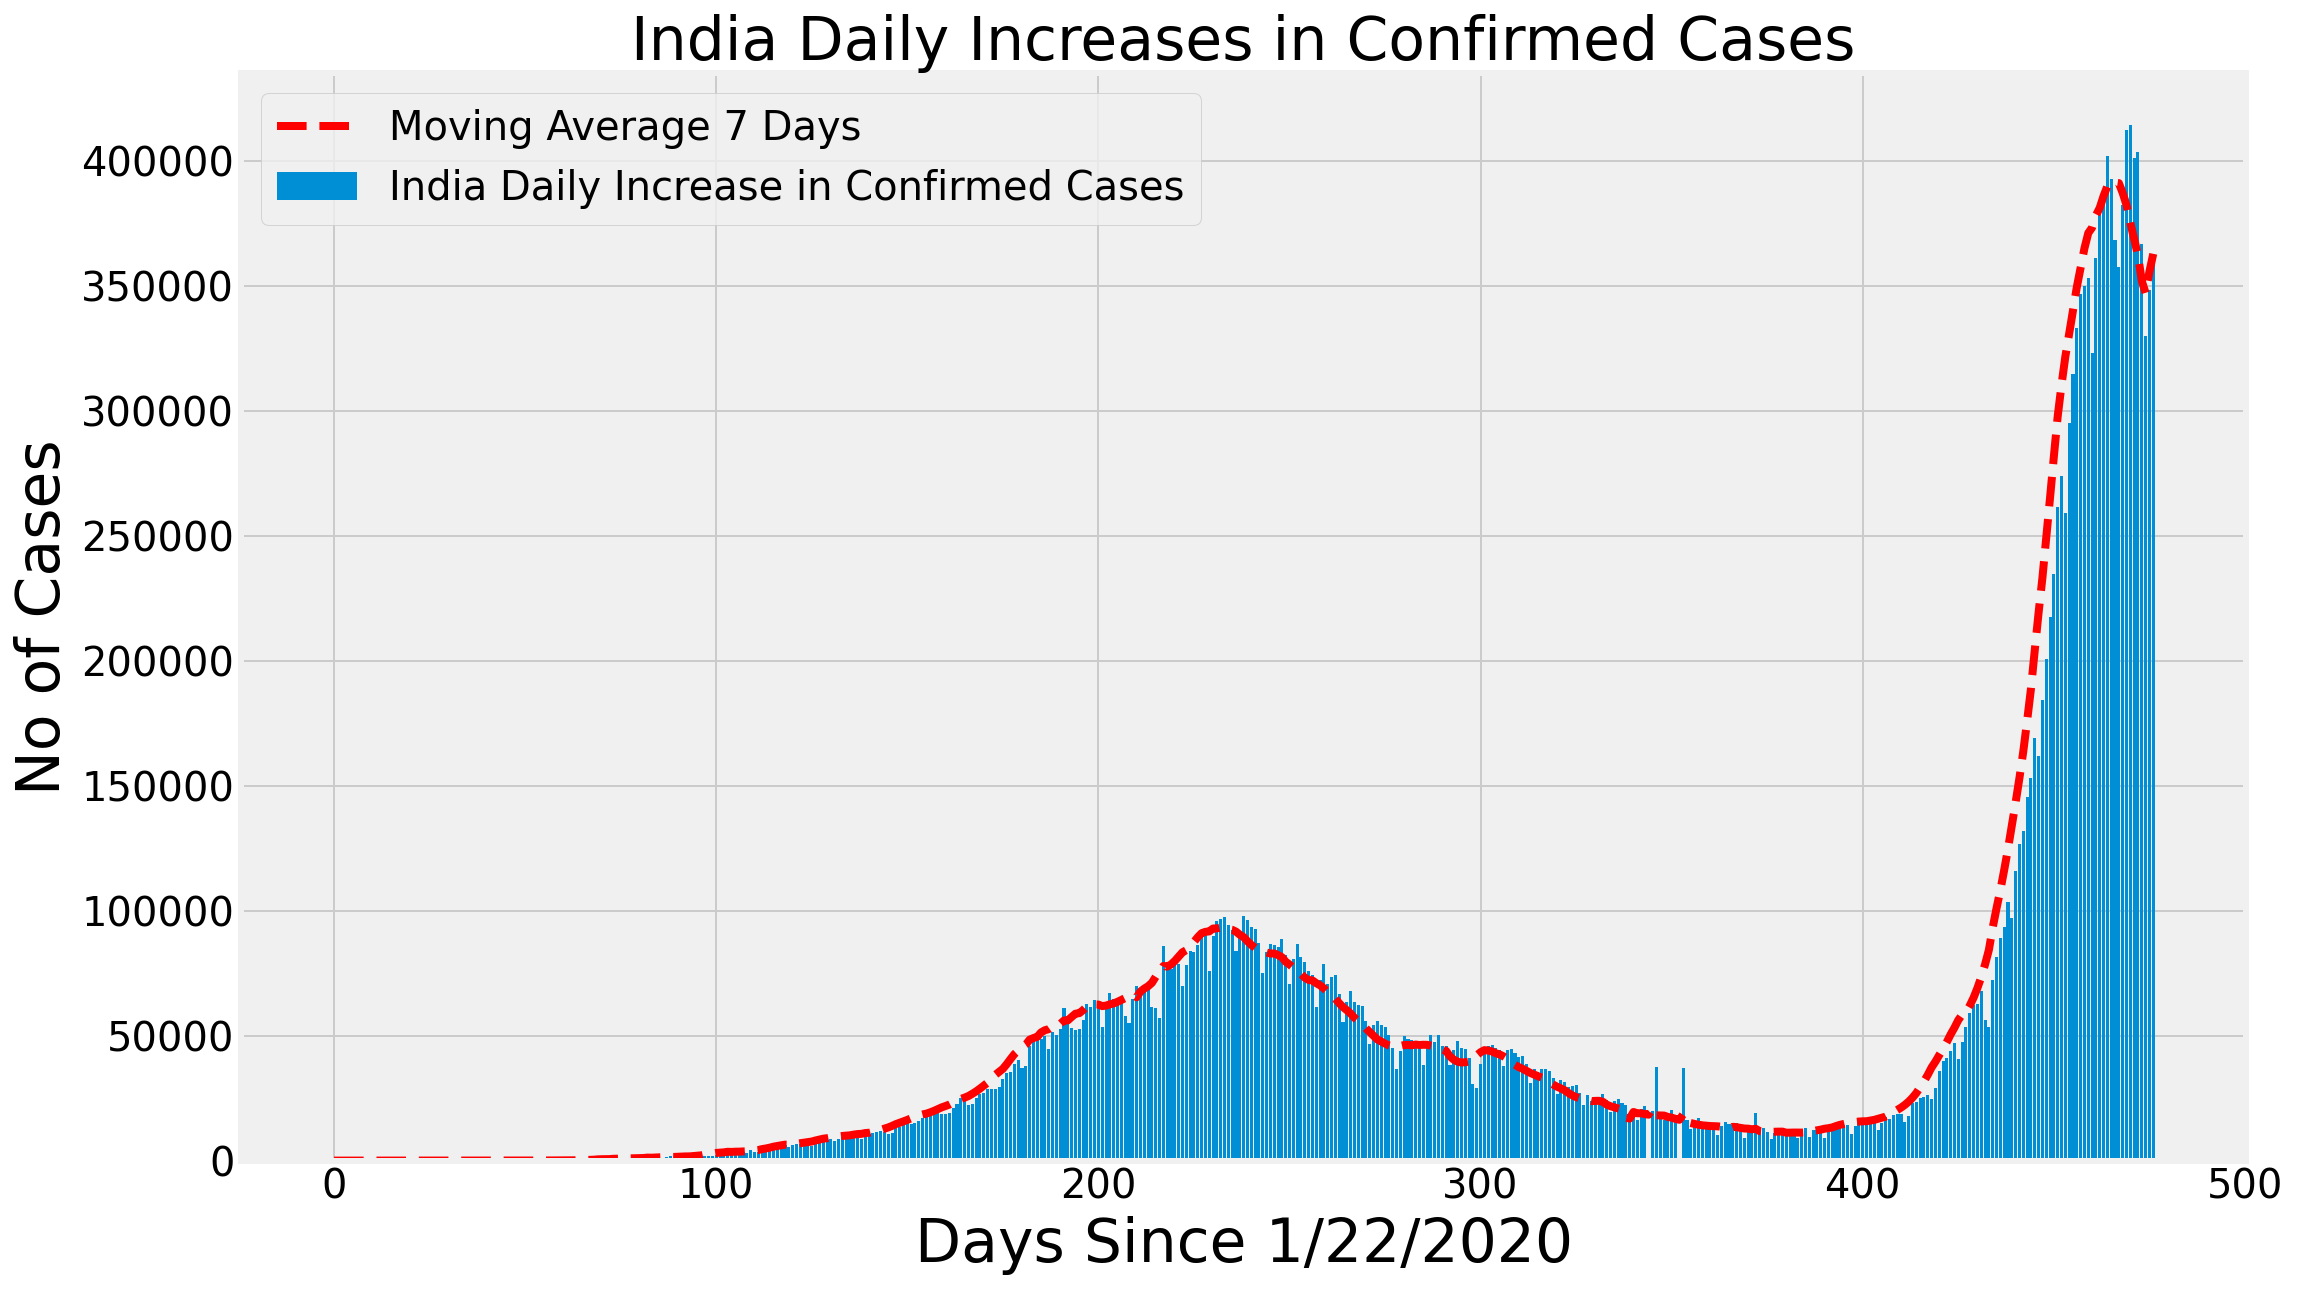

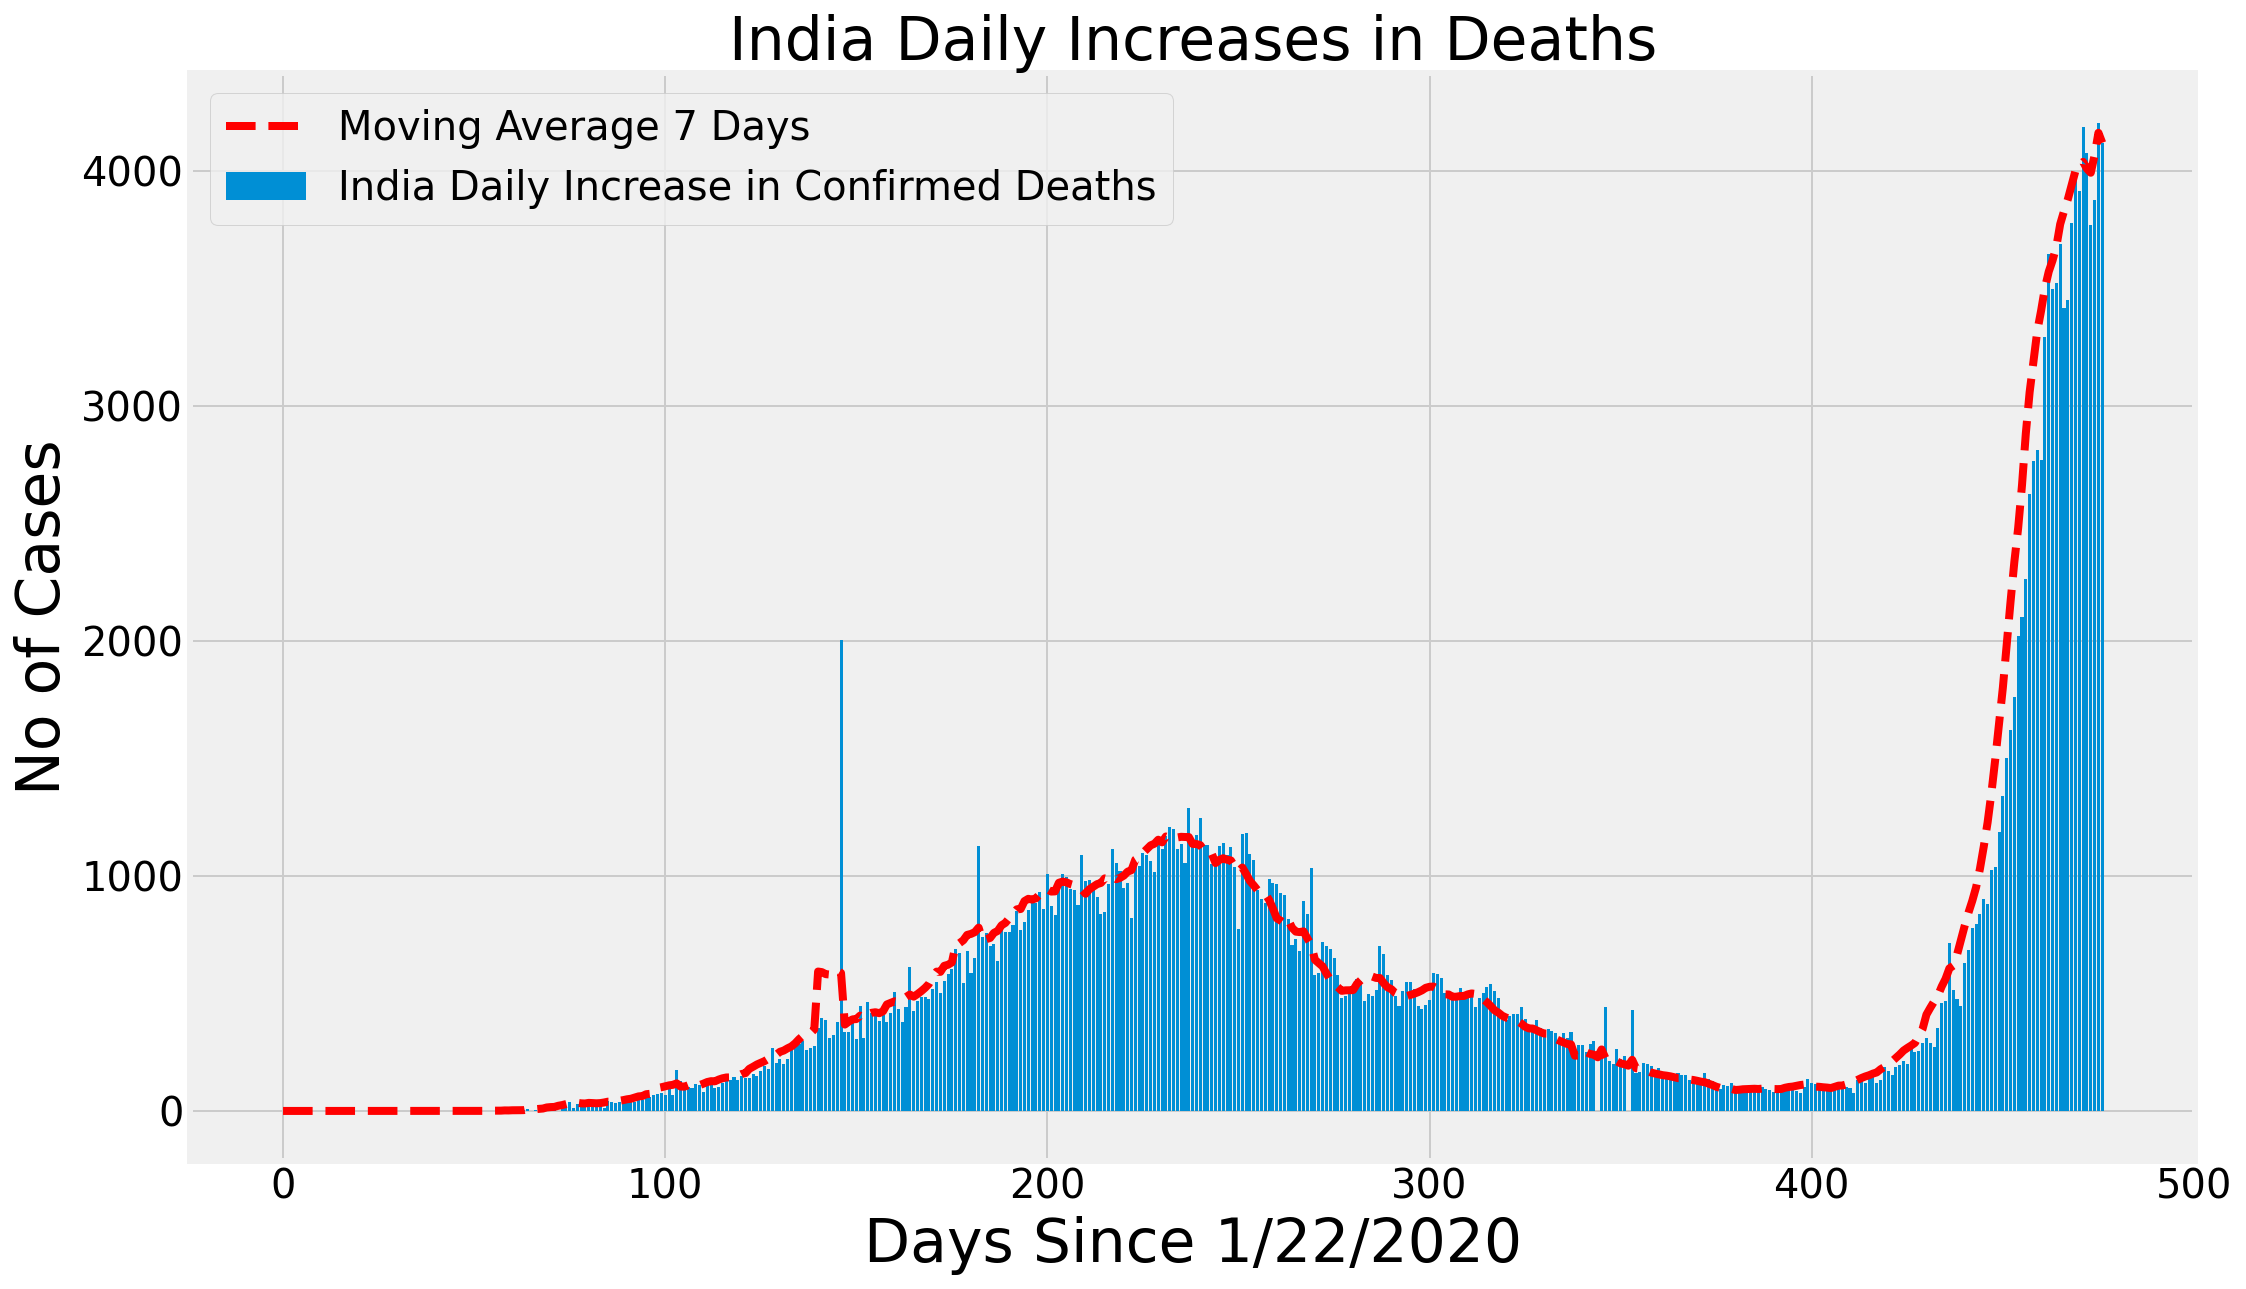

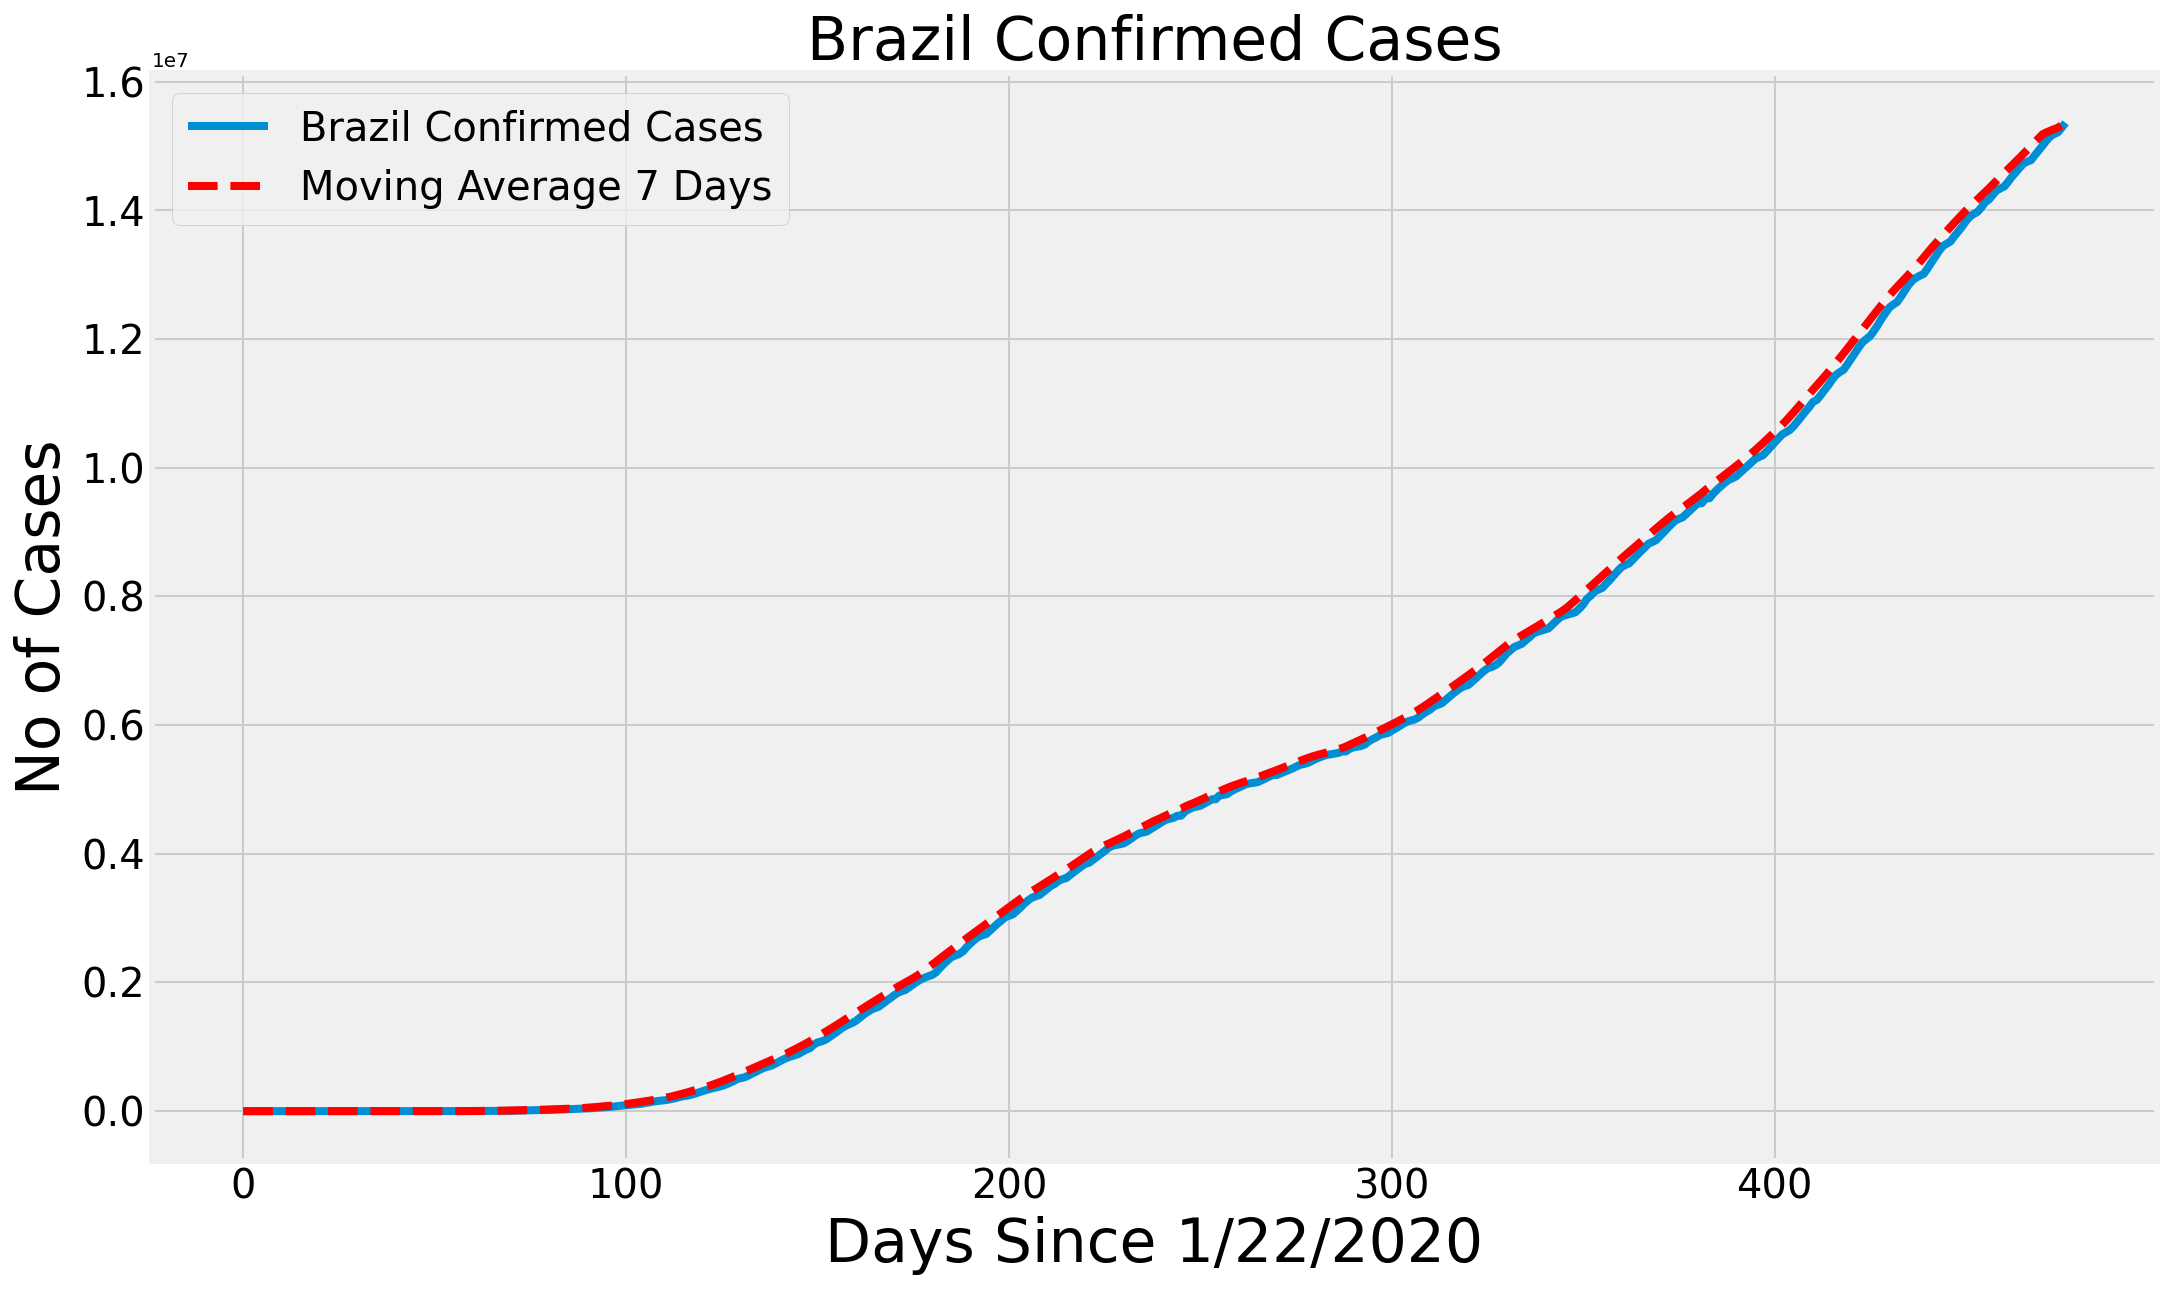

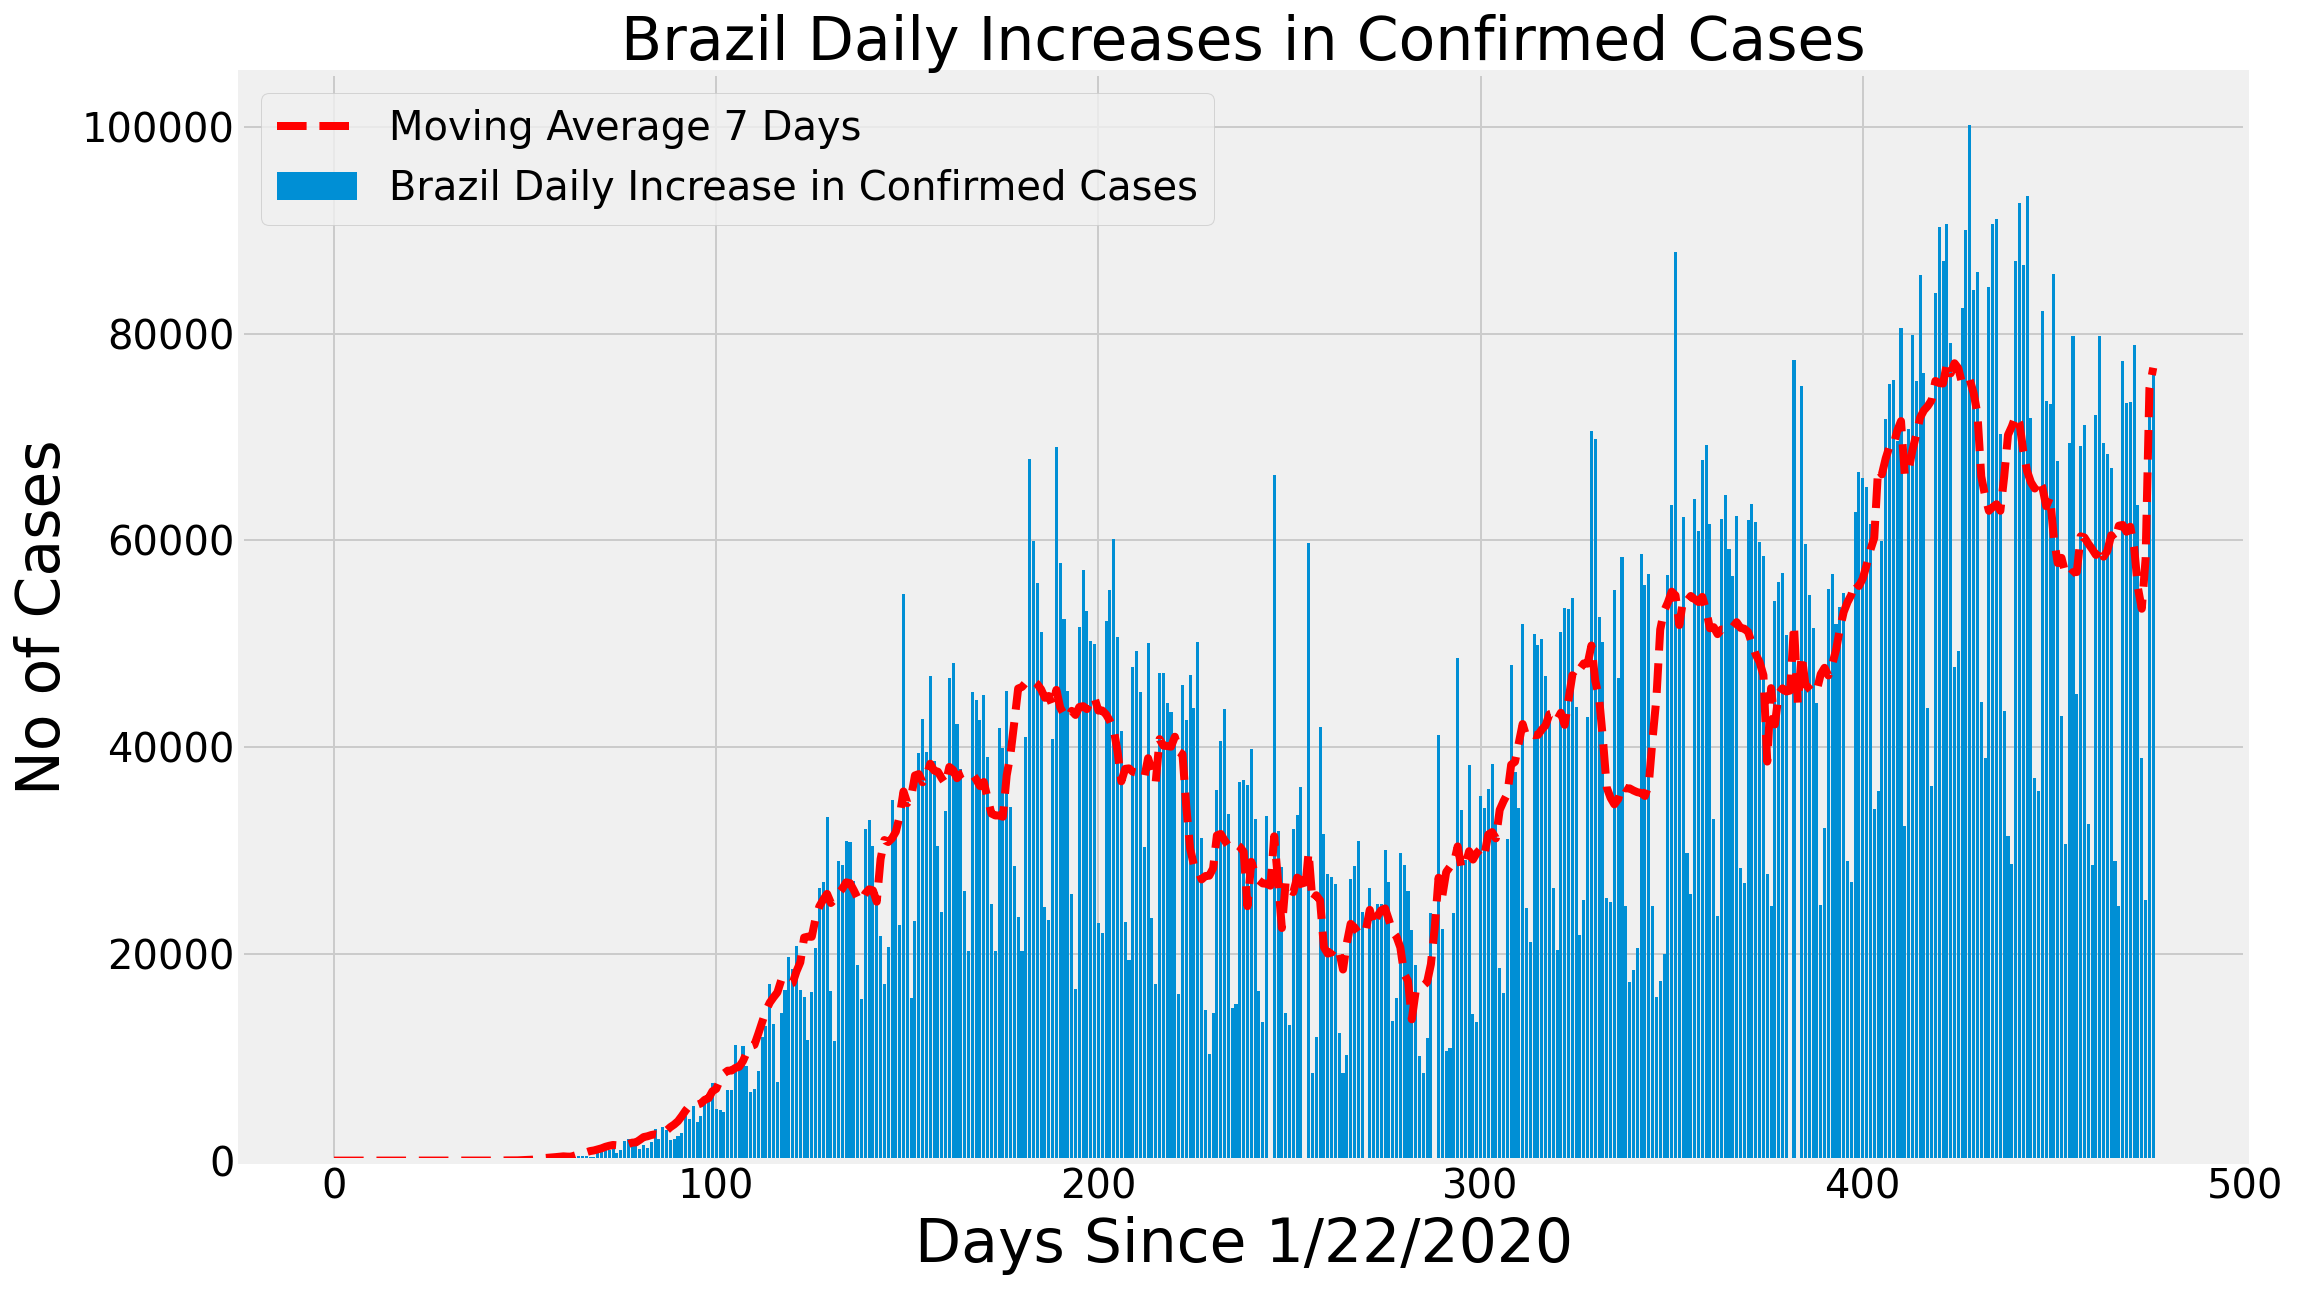

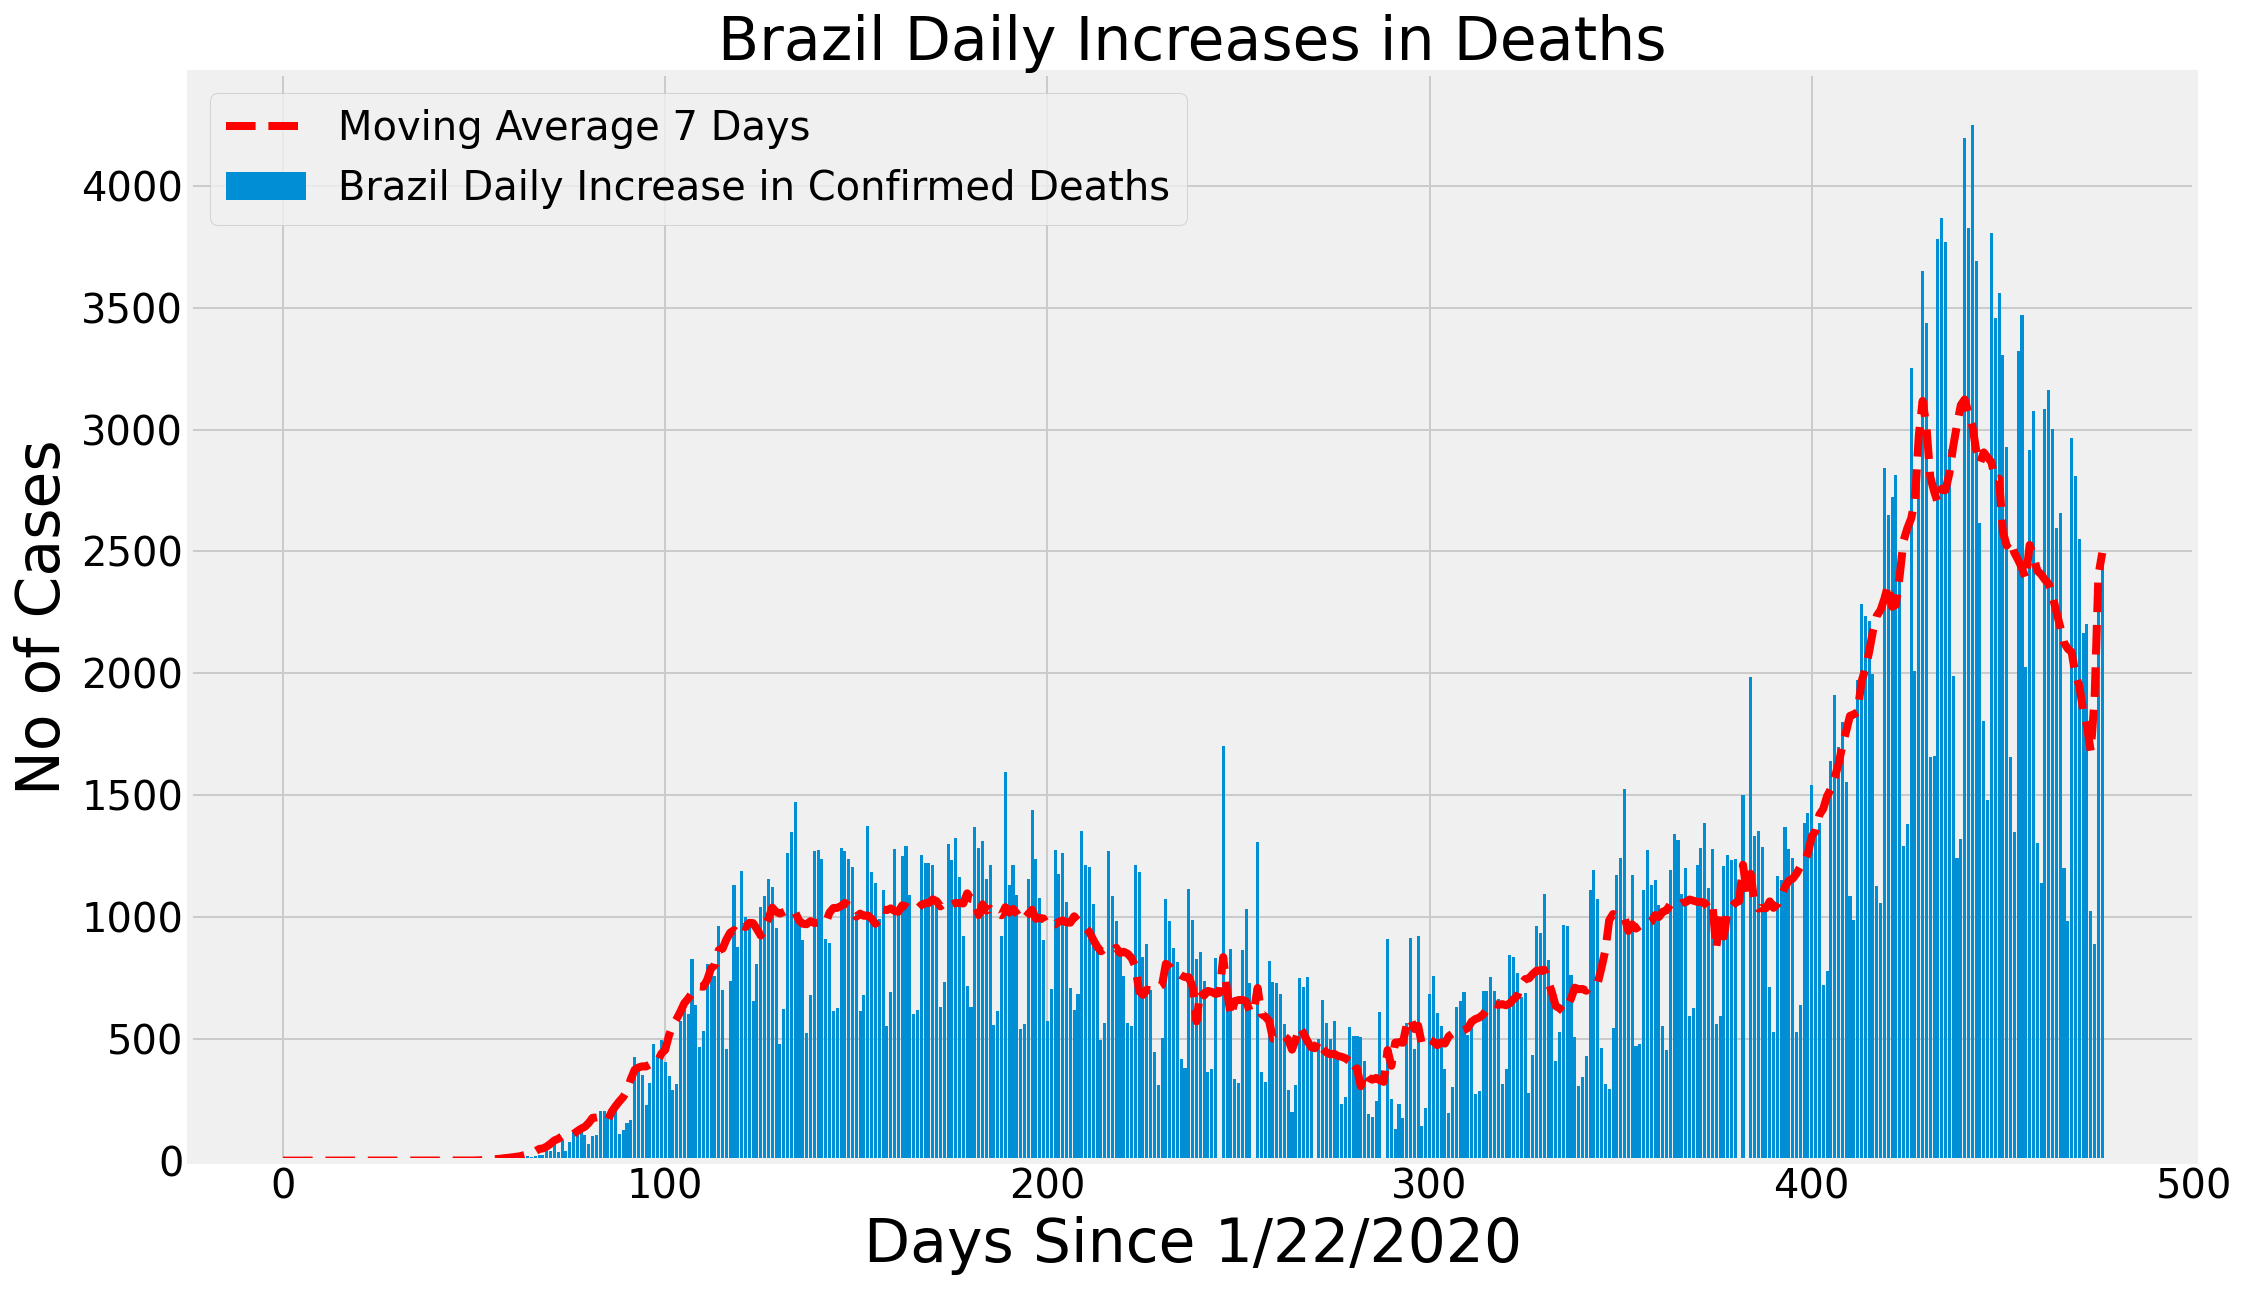

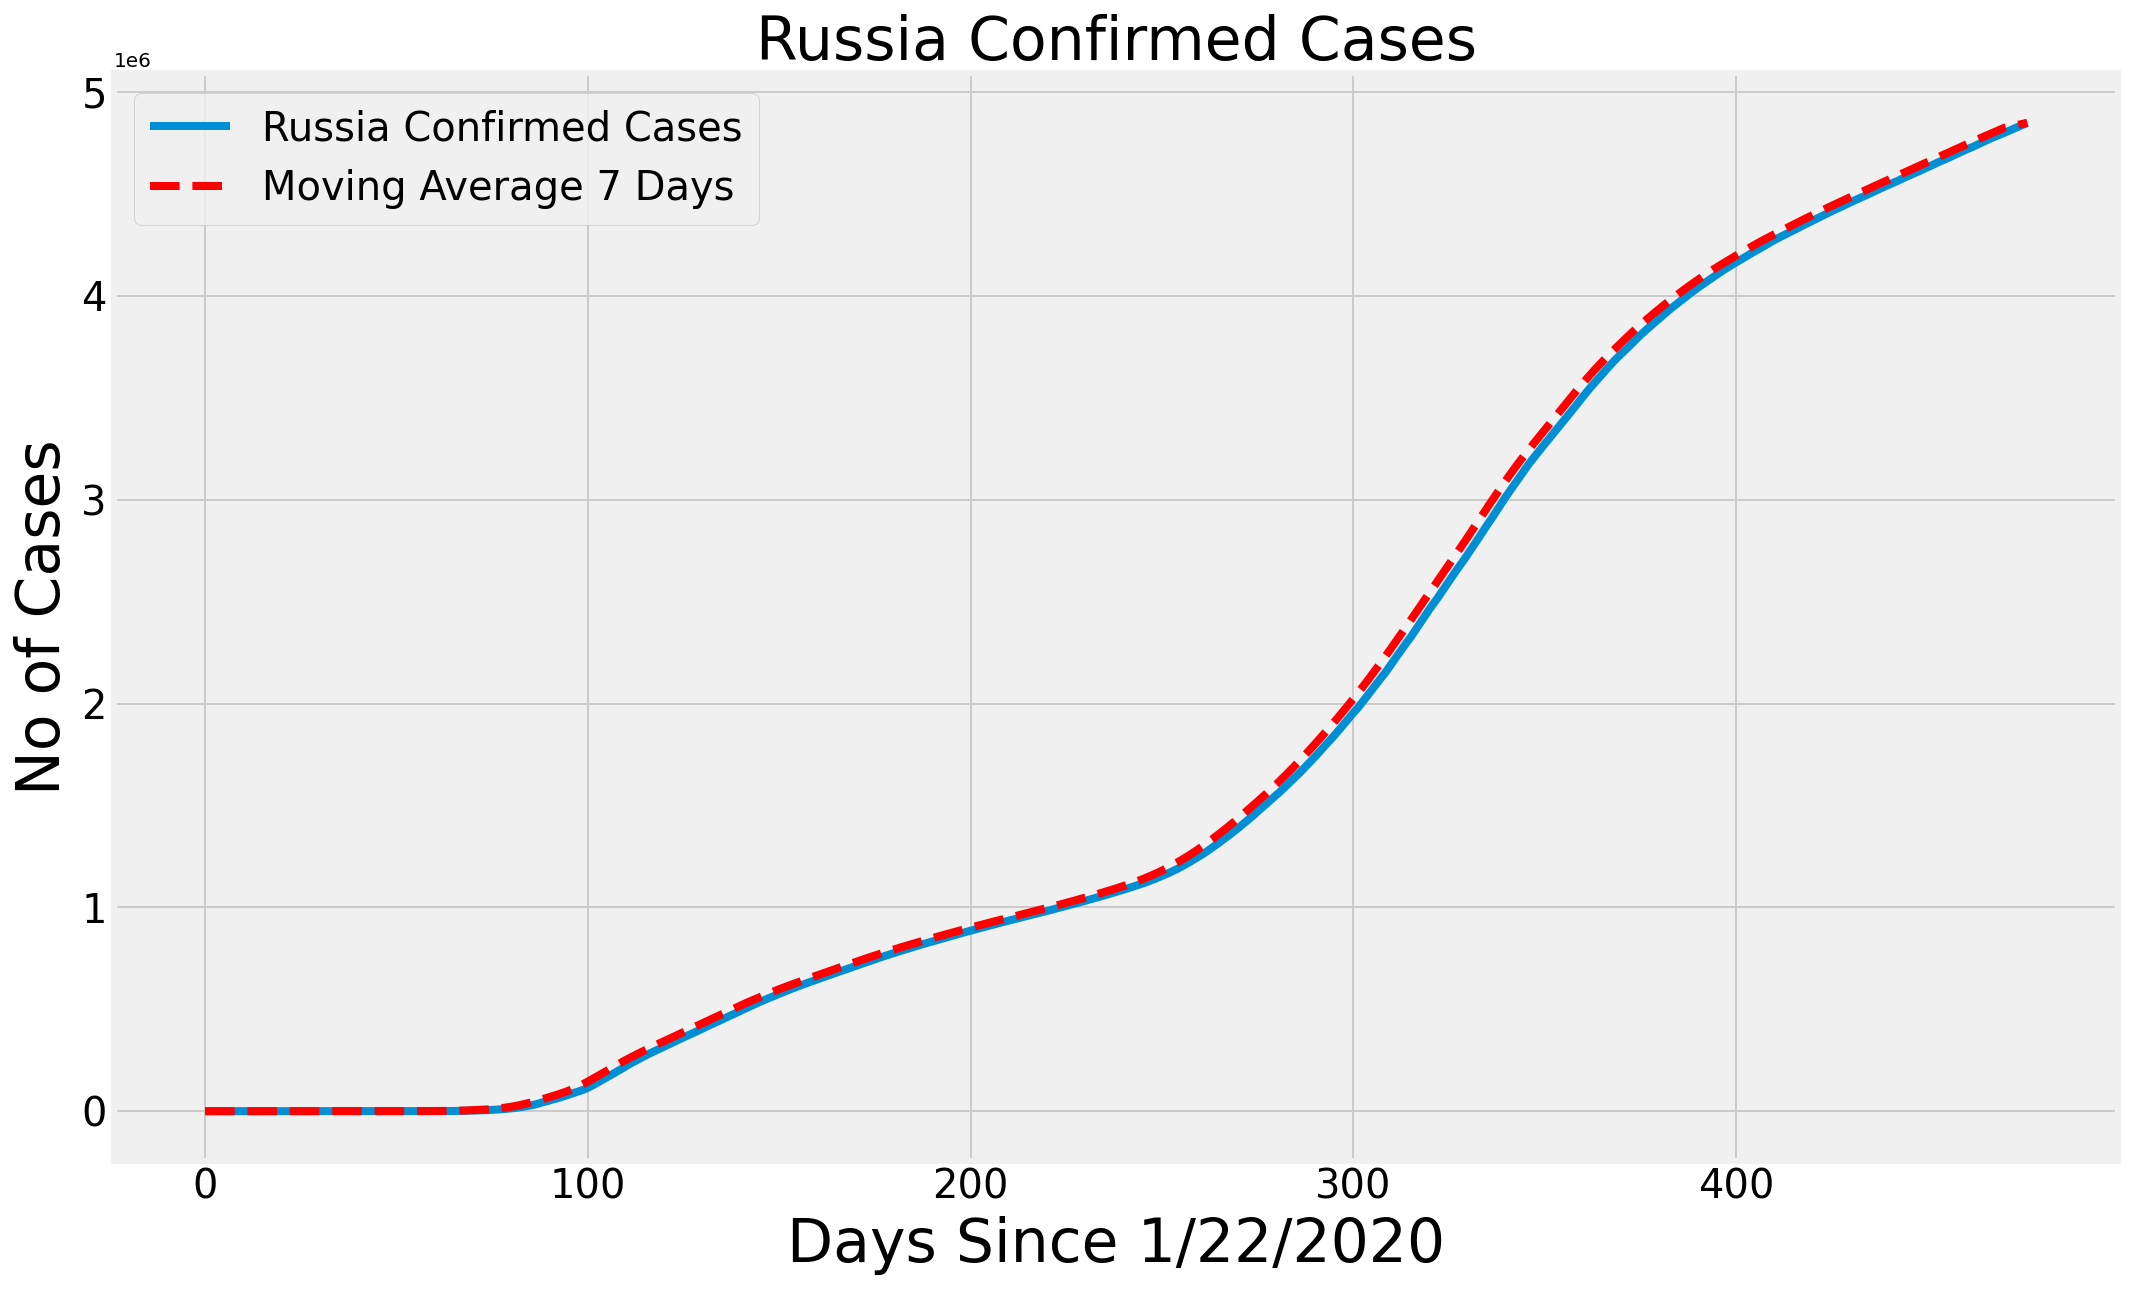

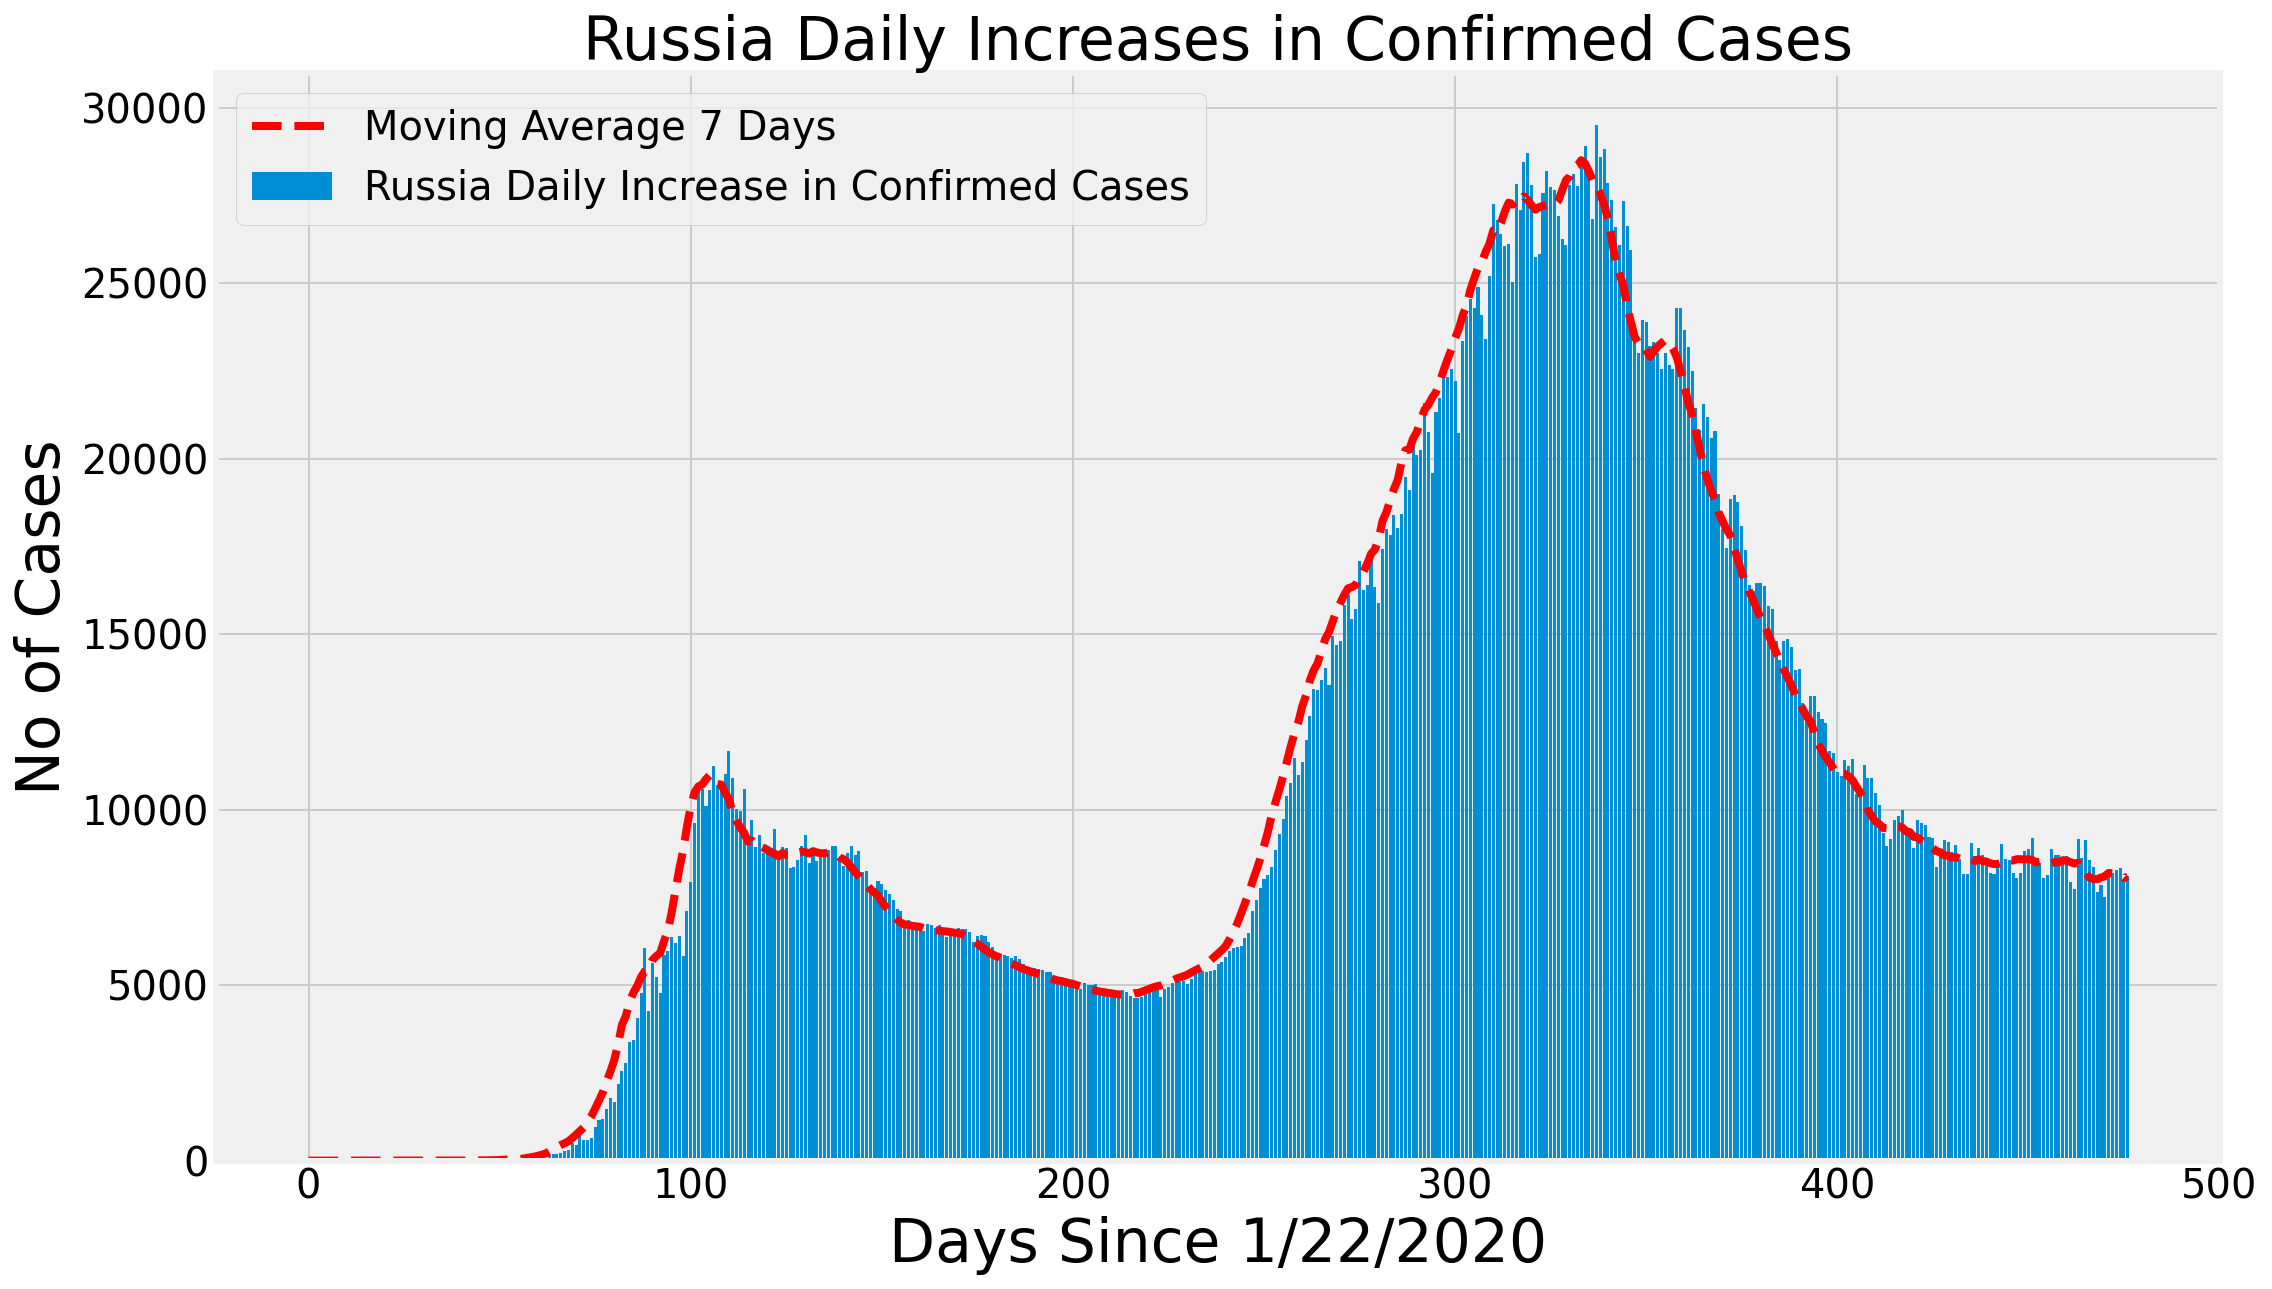

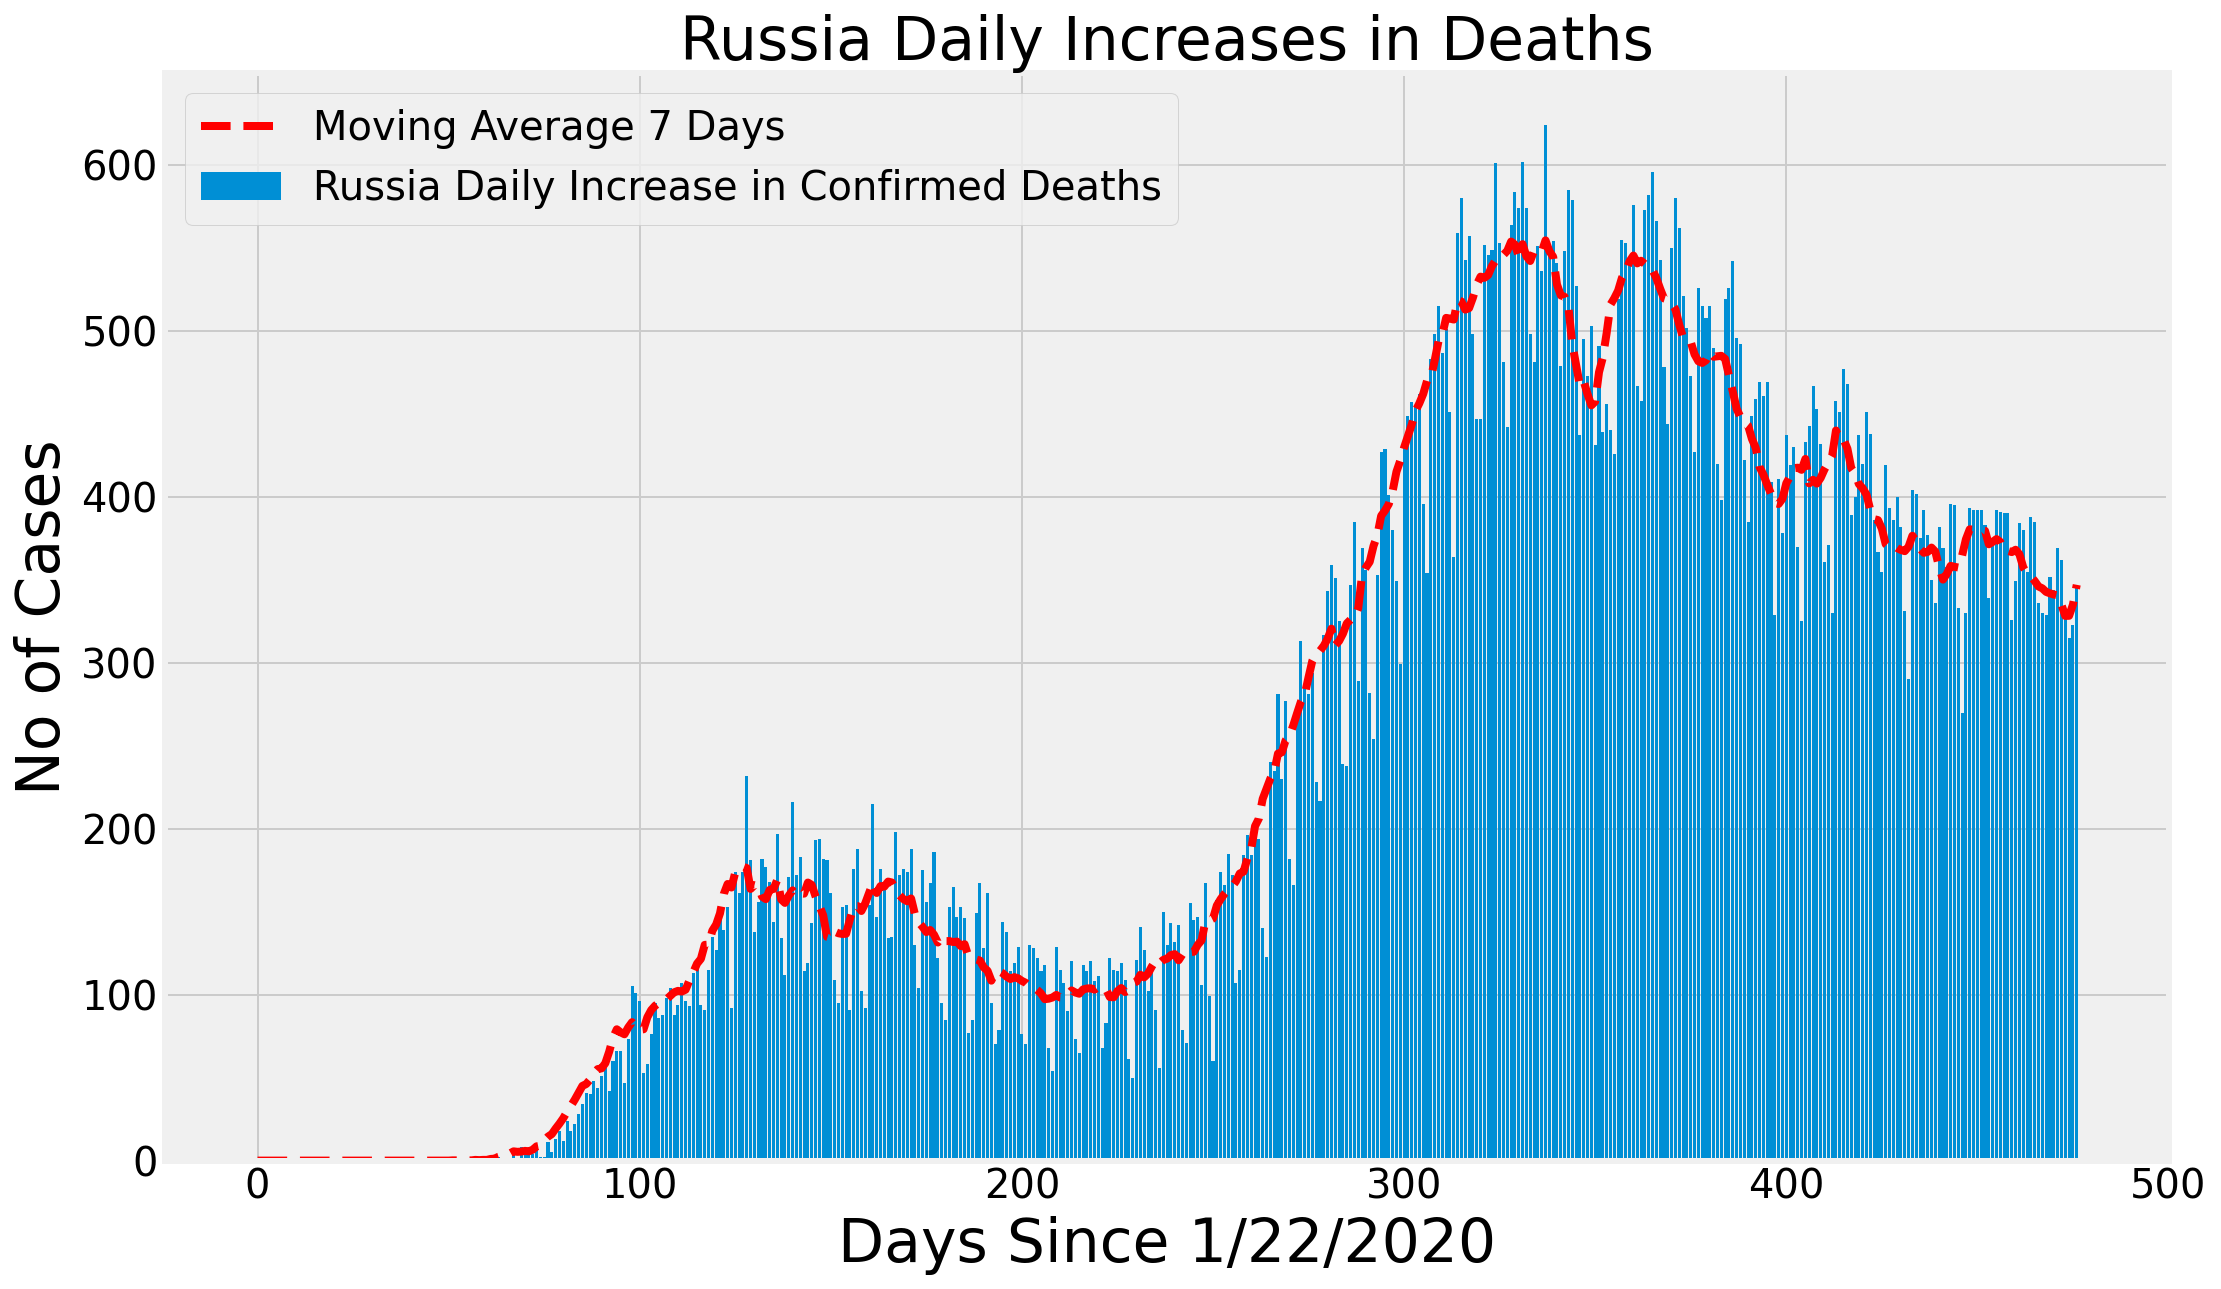

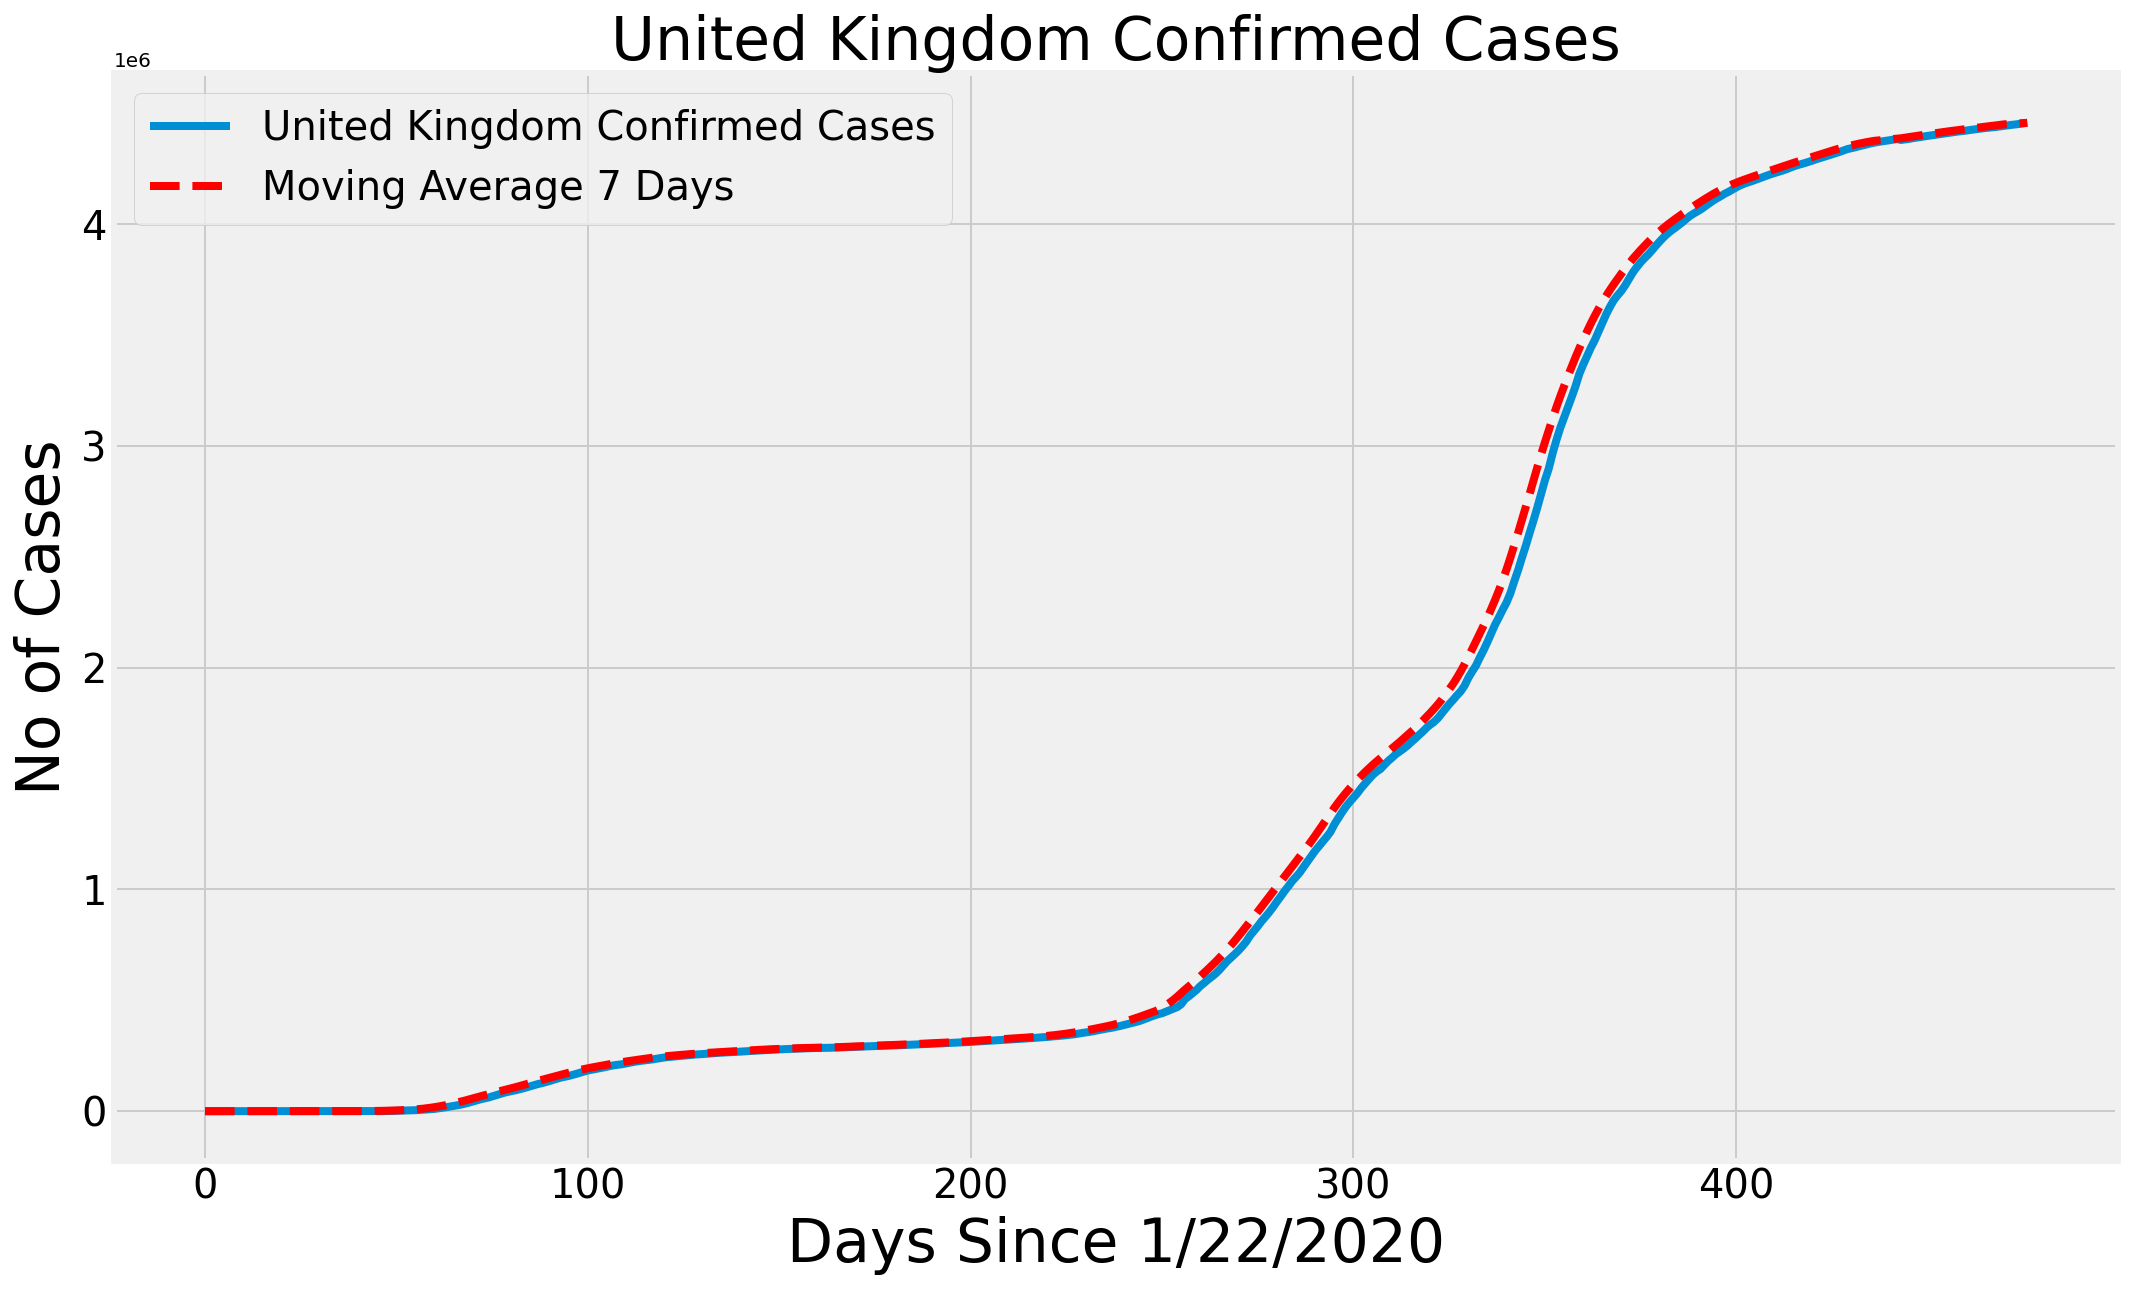

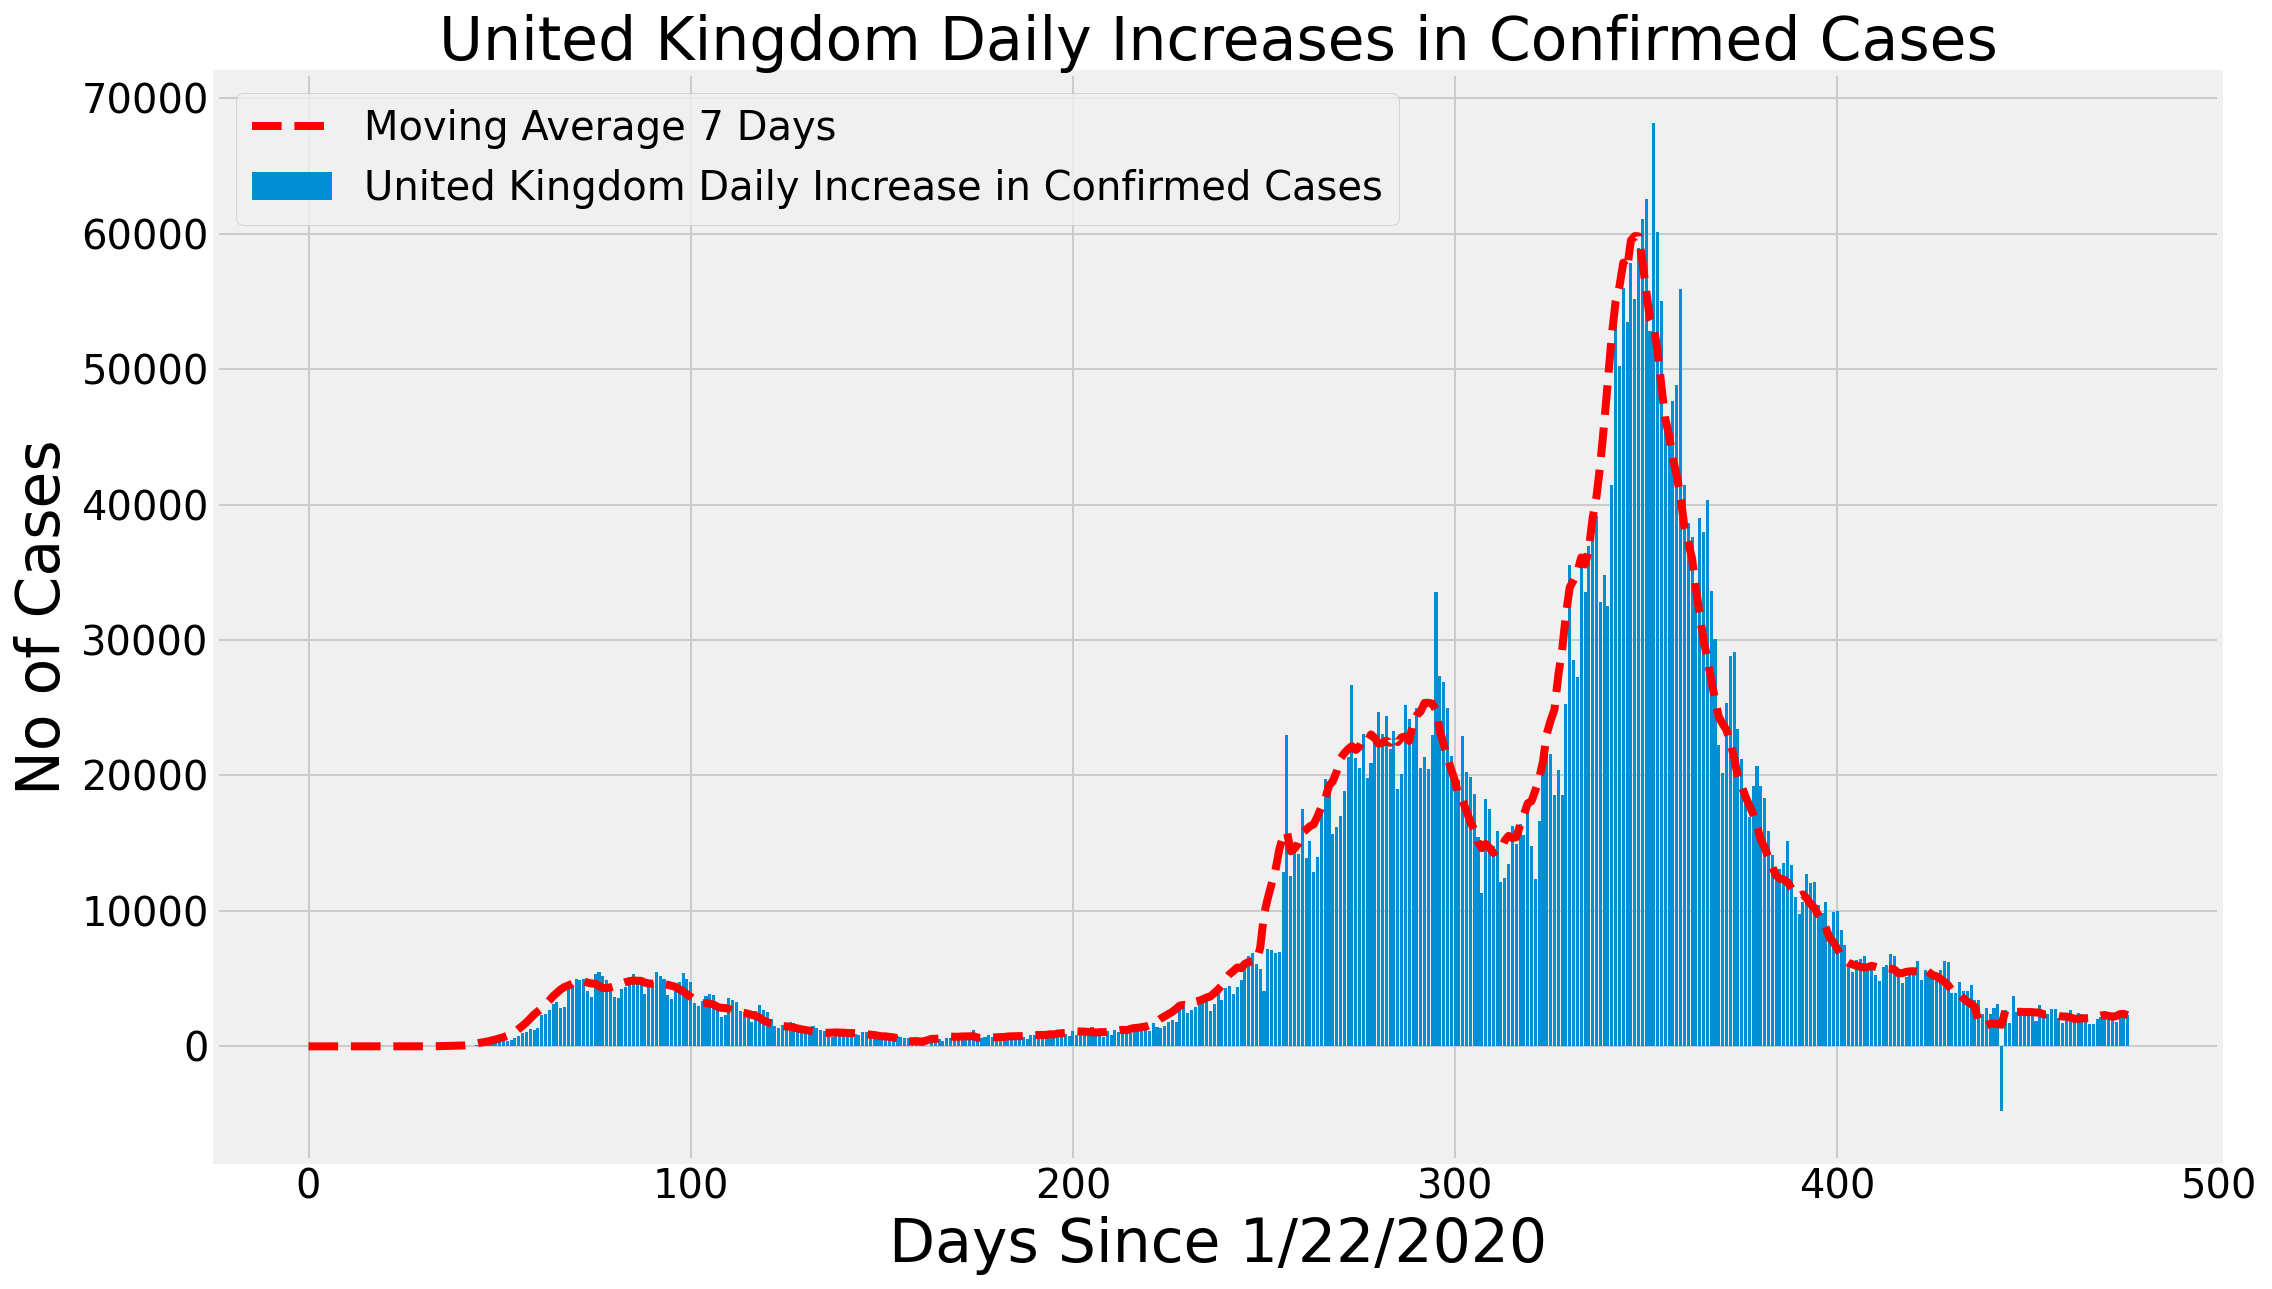

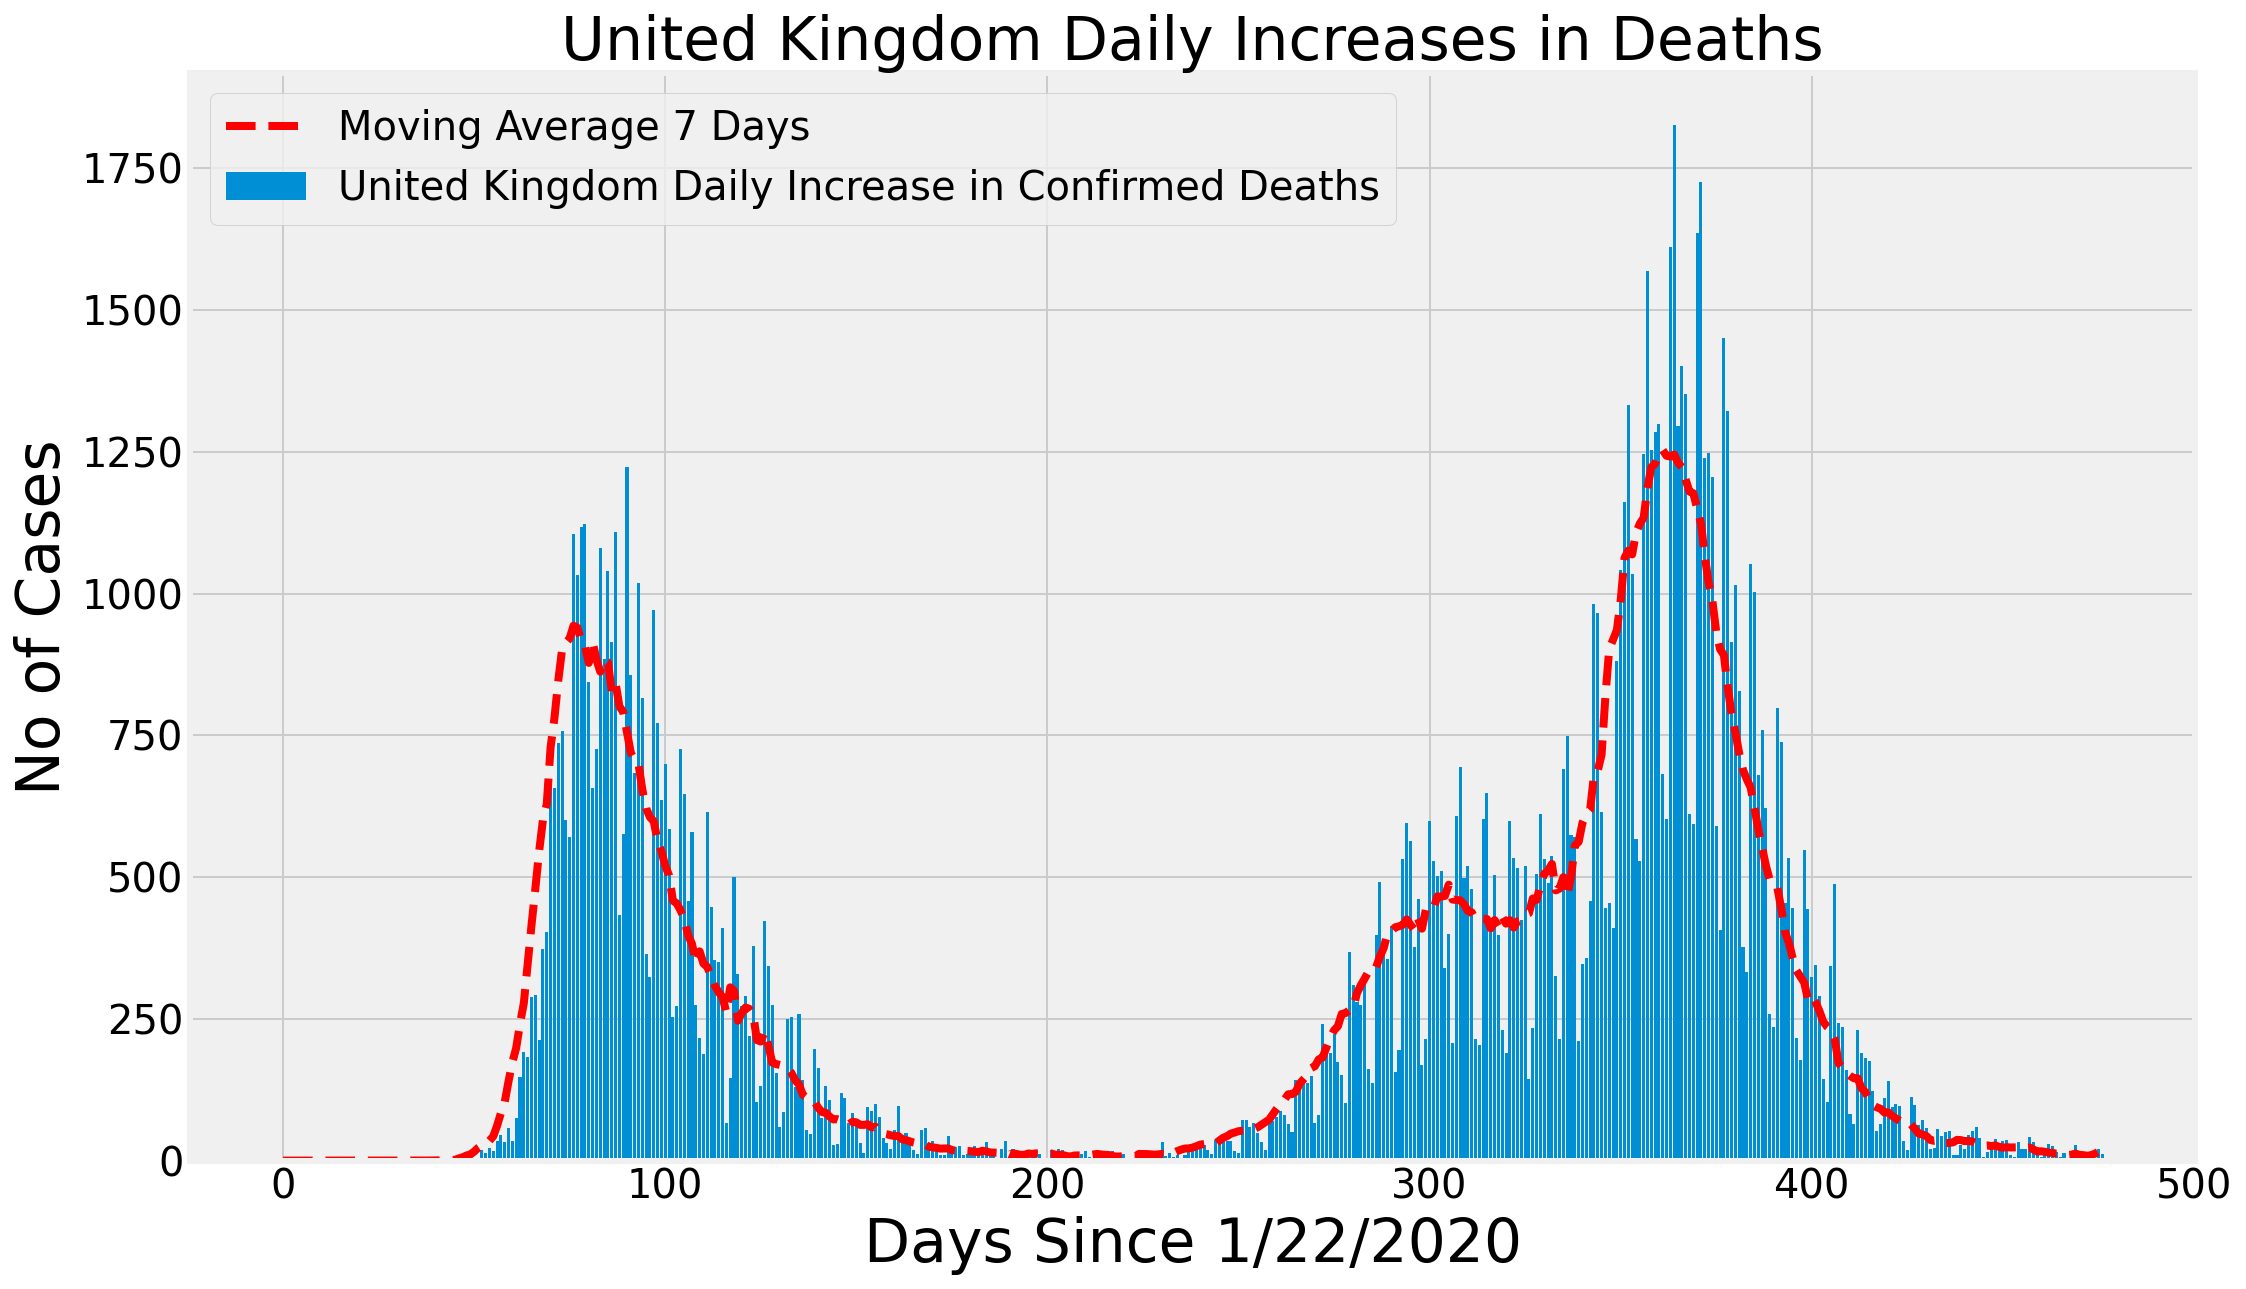

In [93]:
countries = ['US', 'India', 'Brazil', 'Russia', 'United Kingdom'] 

for country in countries:
    country_visualizations(country)

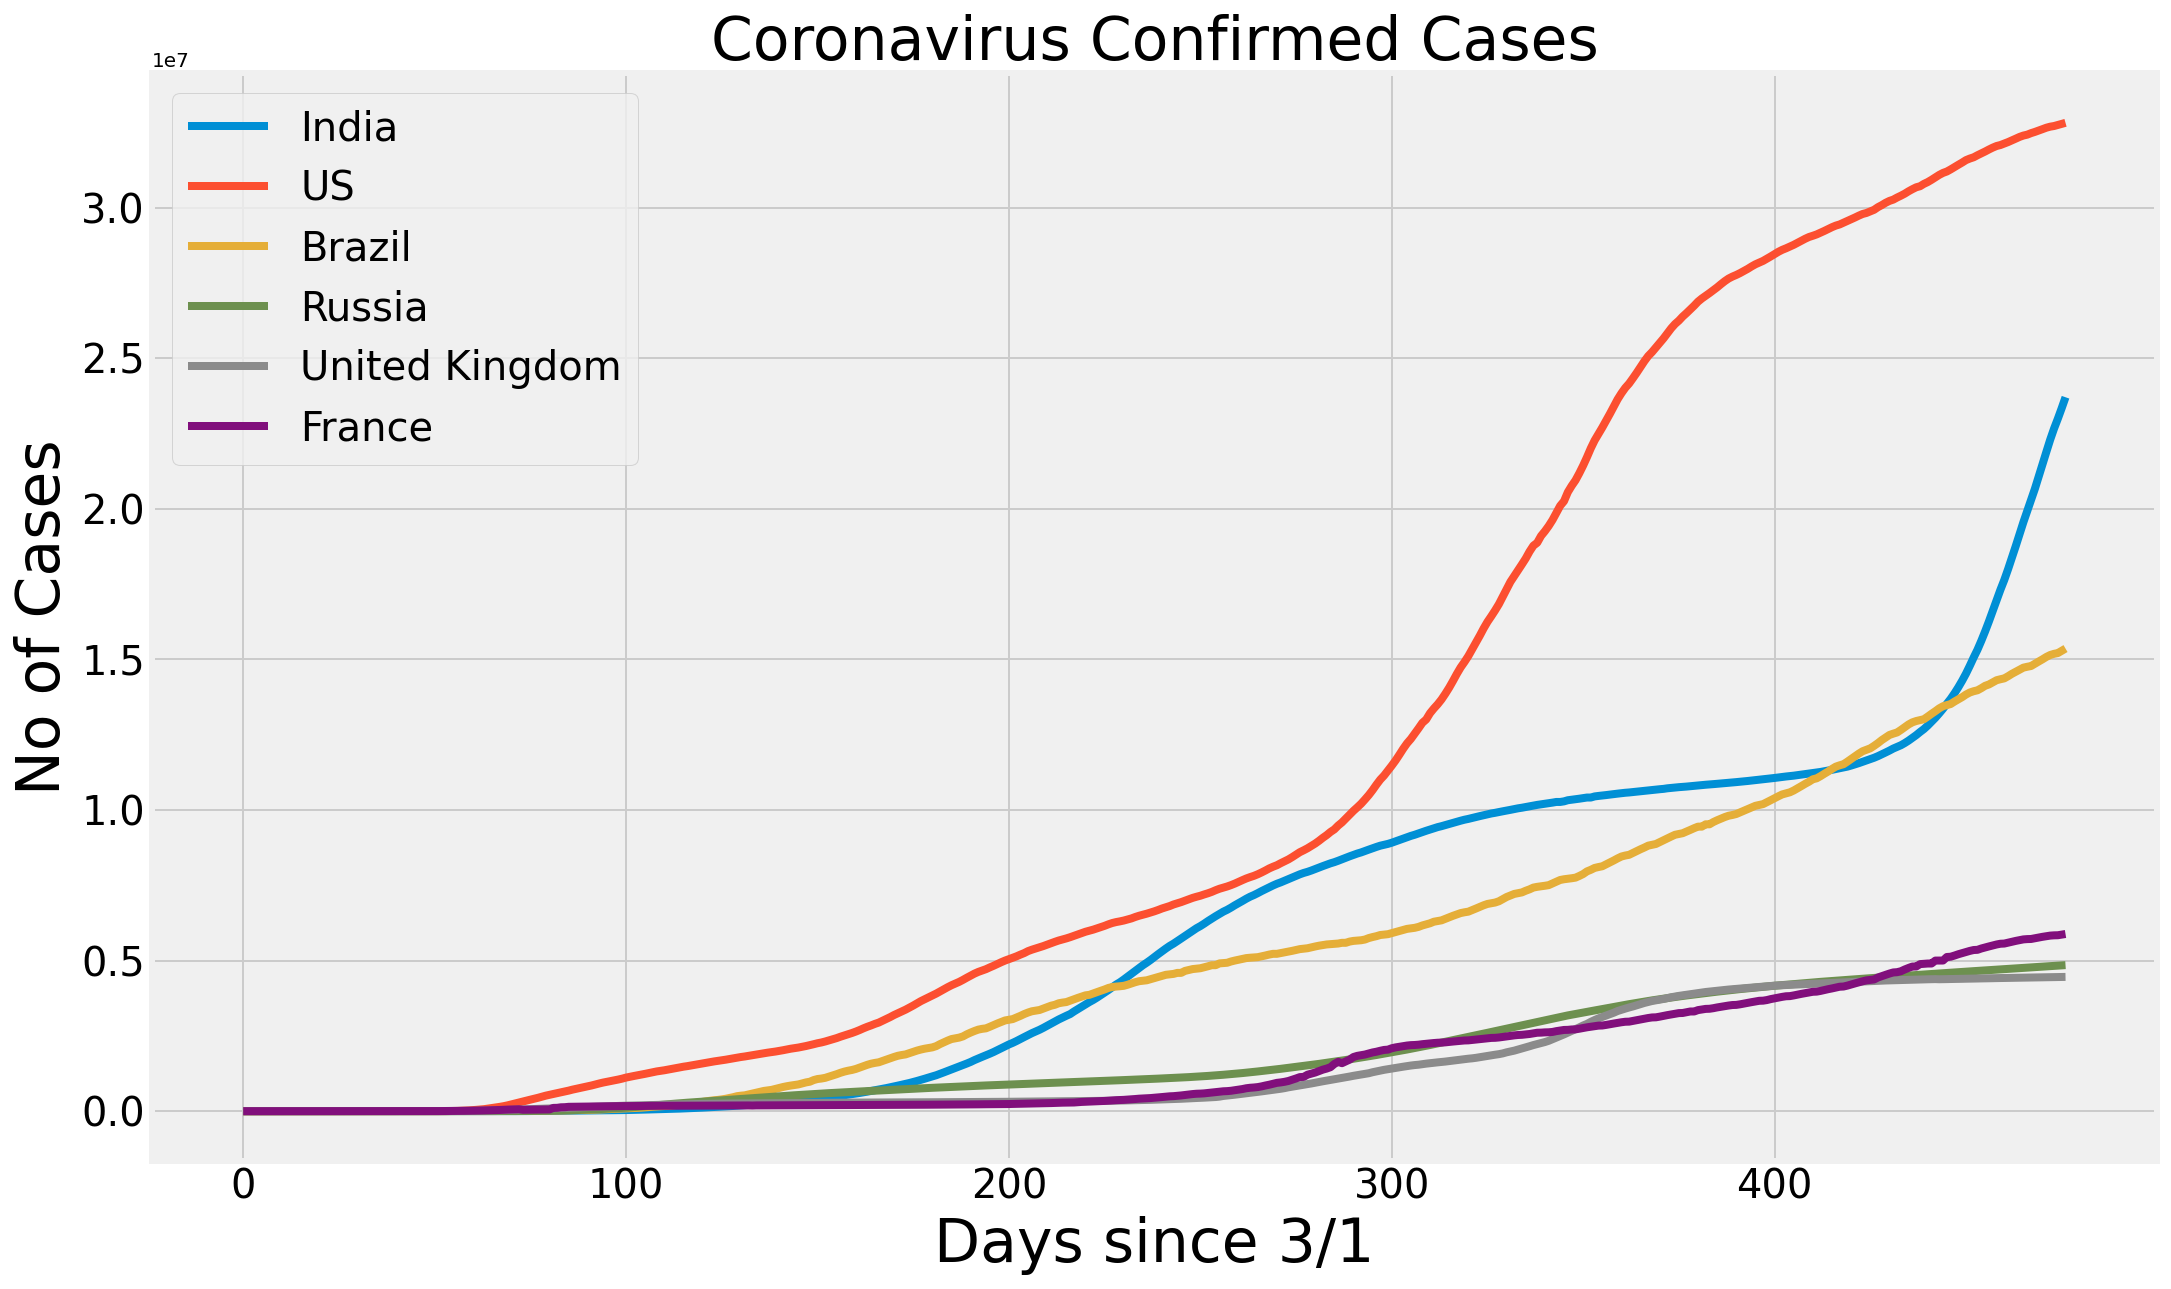

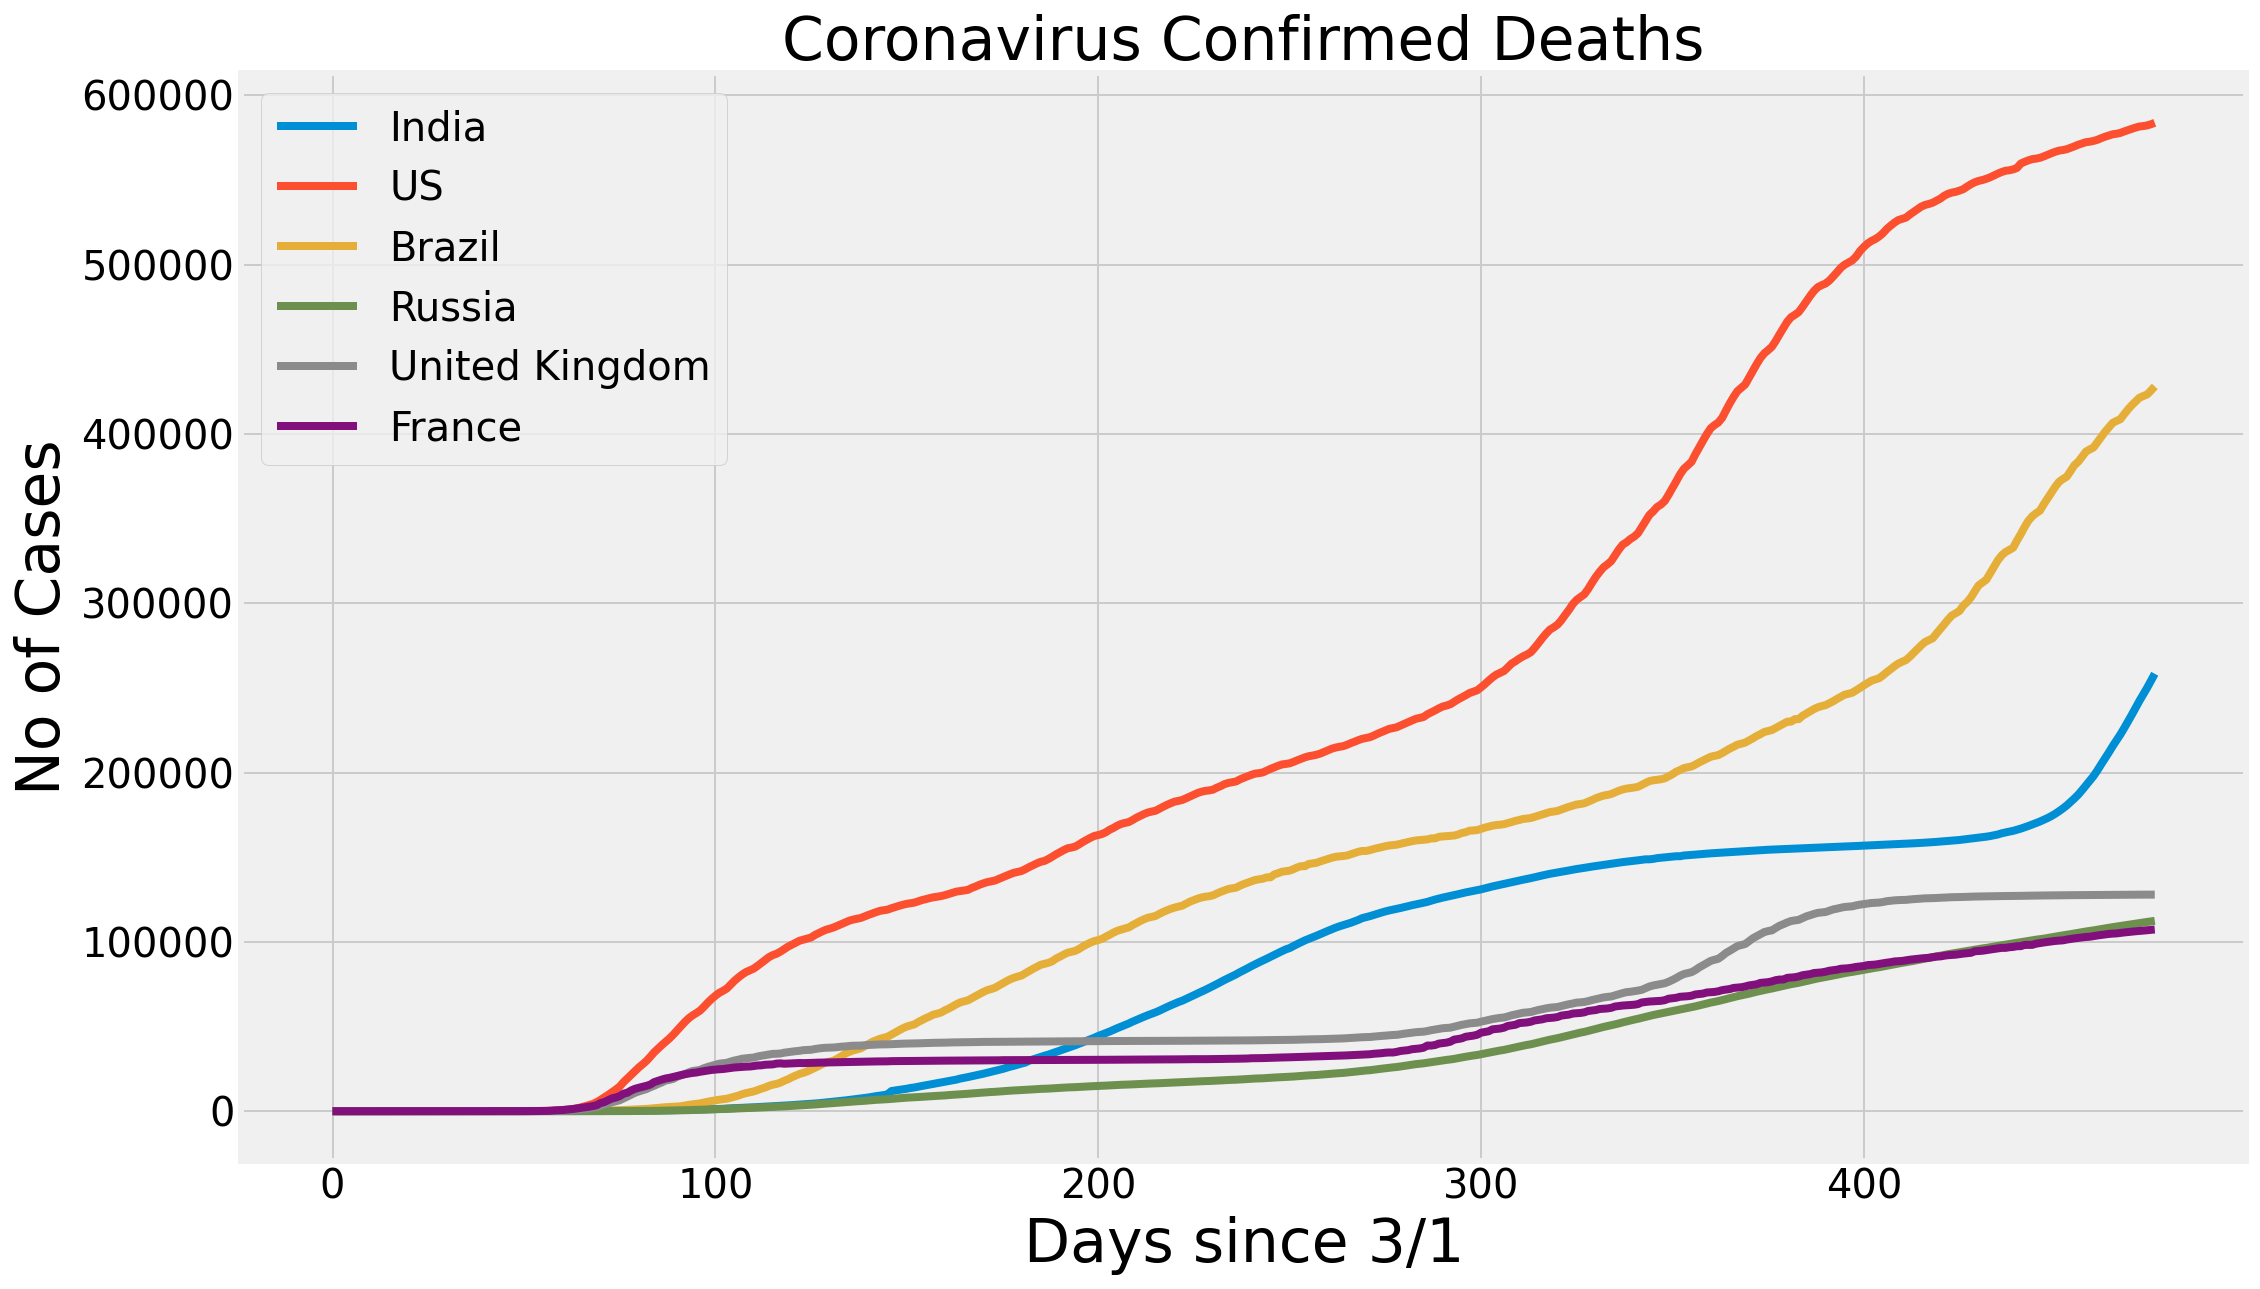

In [94]:
# Country Comparison
# removed redundant code

compare_countries = ['India', 'US', 'Brazil', 'Russia', 'United Kingdom', 'France'] 
graph_name = ['Coronavirus Confirmed Cases', 'Coronavirus Confirmed Deaths']

for num in range(2):
    plt.figure(figsize=(16, 10))
    for country in compare_countries:
        plt.plot(get_country_info(country)[num])
    plt.legend(compare_countries, prop={'size': 20})
    plt.xlabel('Days since 3/1', size=30)
    plt.ylabel('No of Cases', size=30)
    plt.title(graph_name[num], size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

In [95]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 10))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Worldwide Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('No of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

# Predictions for confirmed coronavirus cases worldwide
These models predict future covid cases on a global level. 

The prediction models include 
* Support Vector Machine 
* Polynomial Regression  

<a id='prediction'></a>

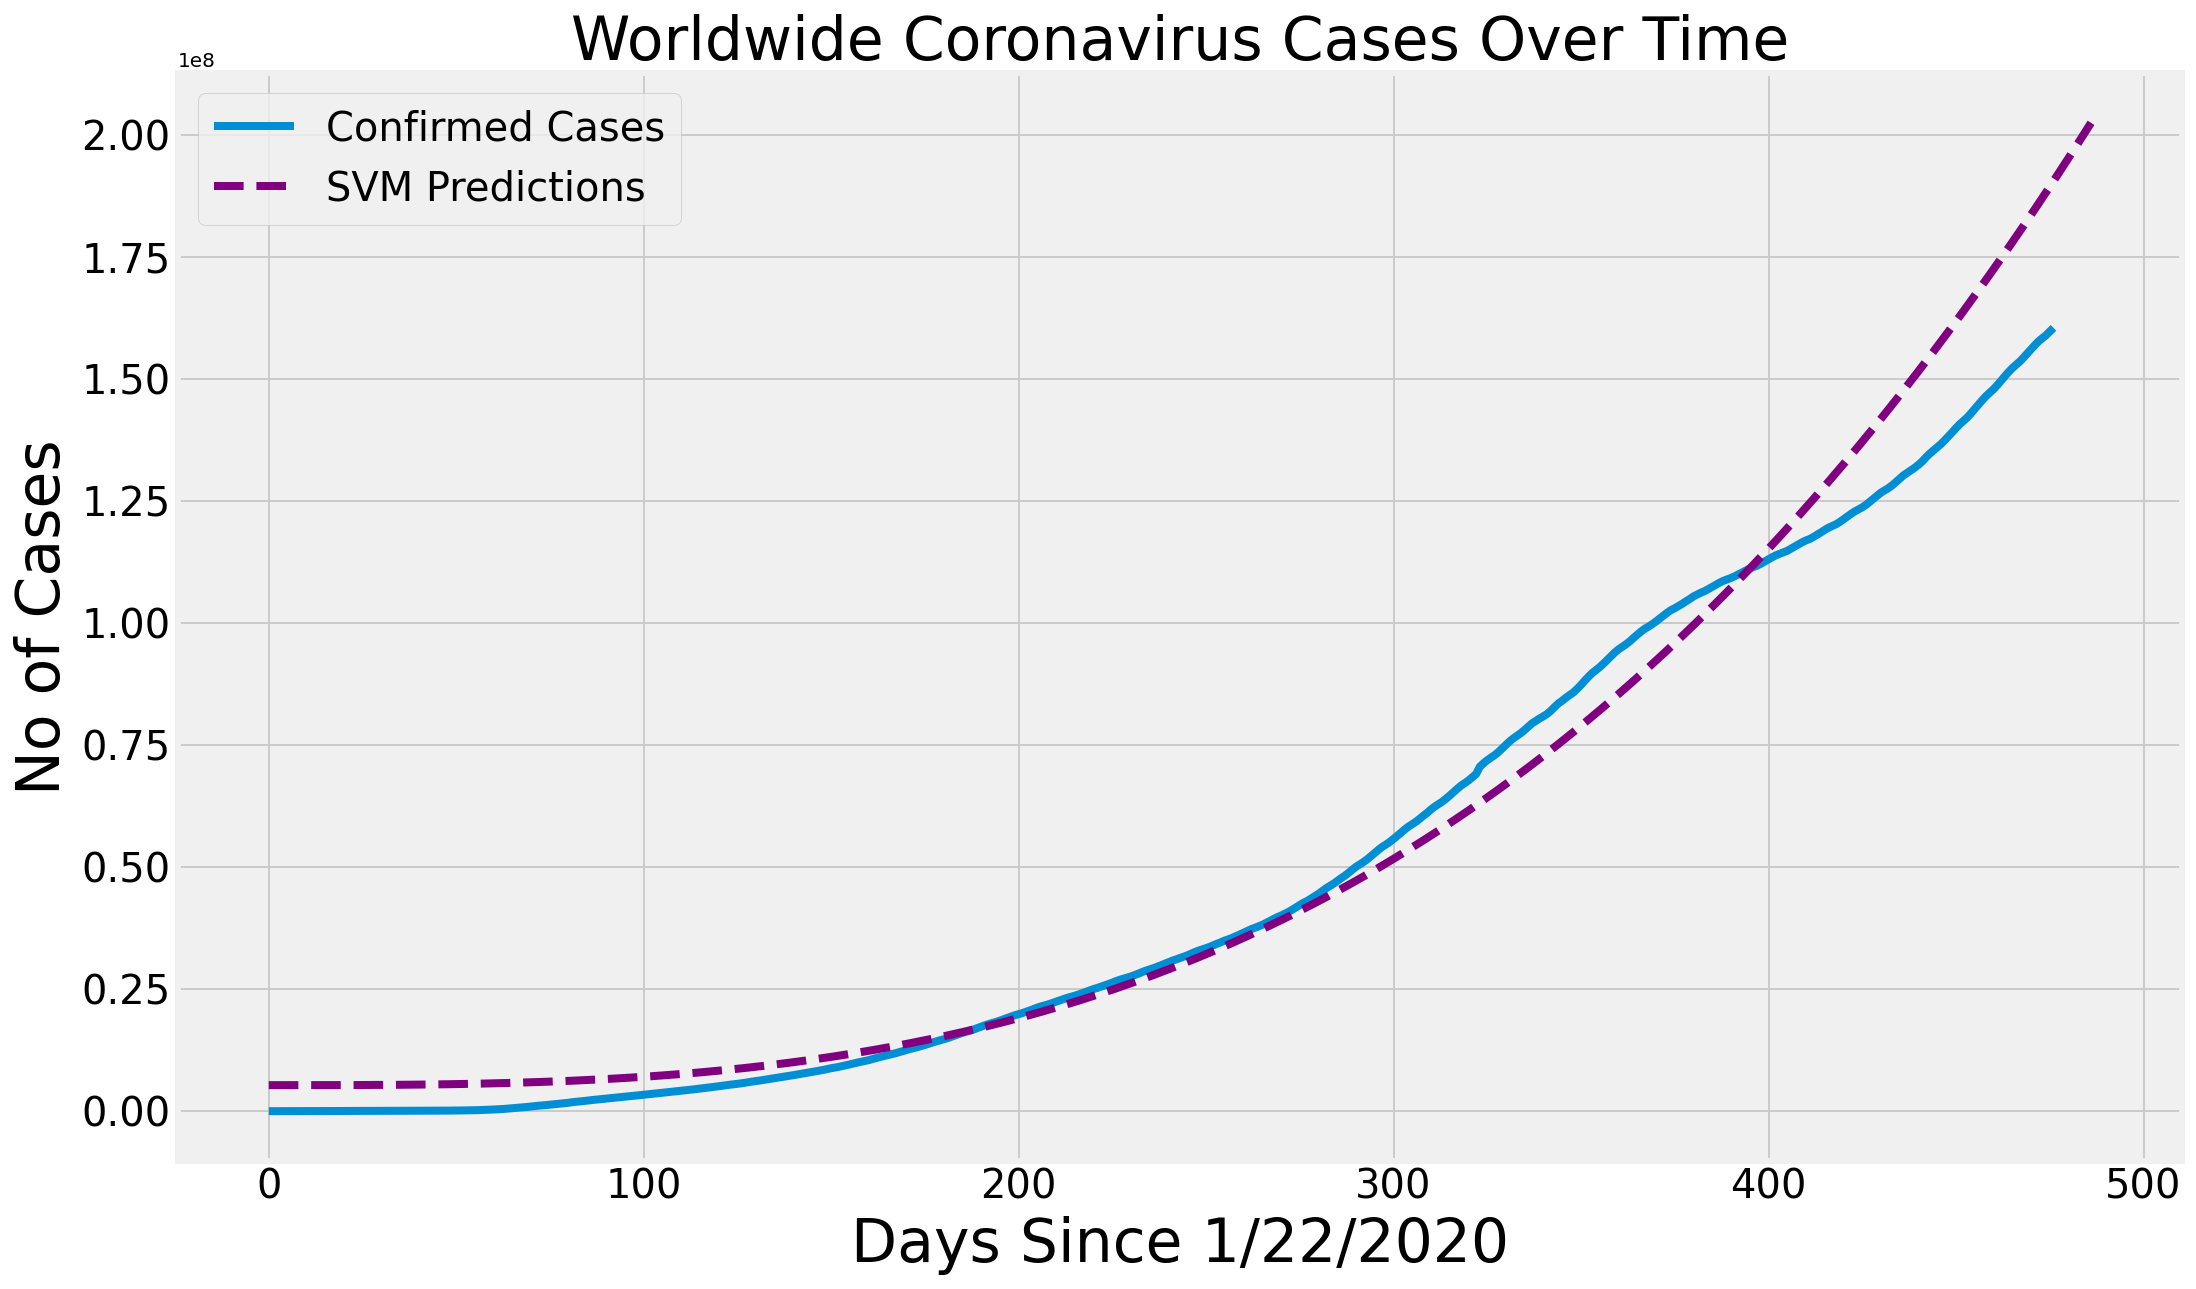

In [96]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'purple')

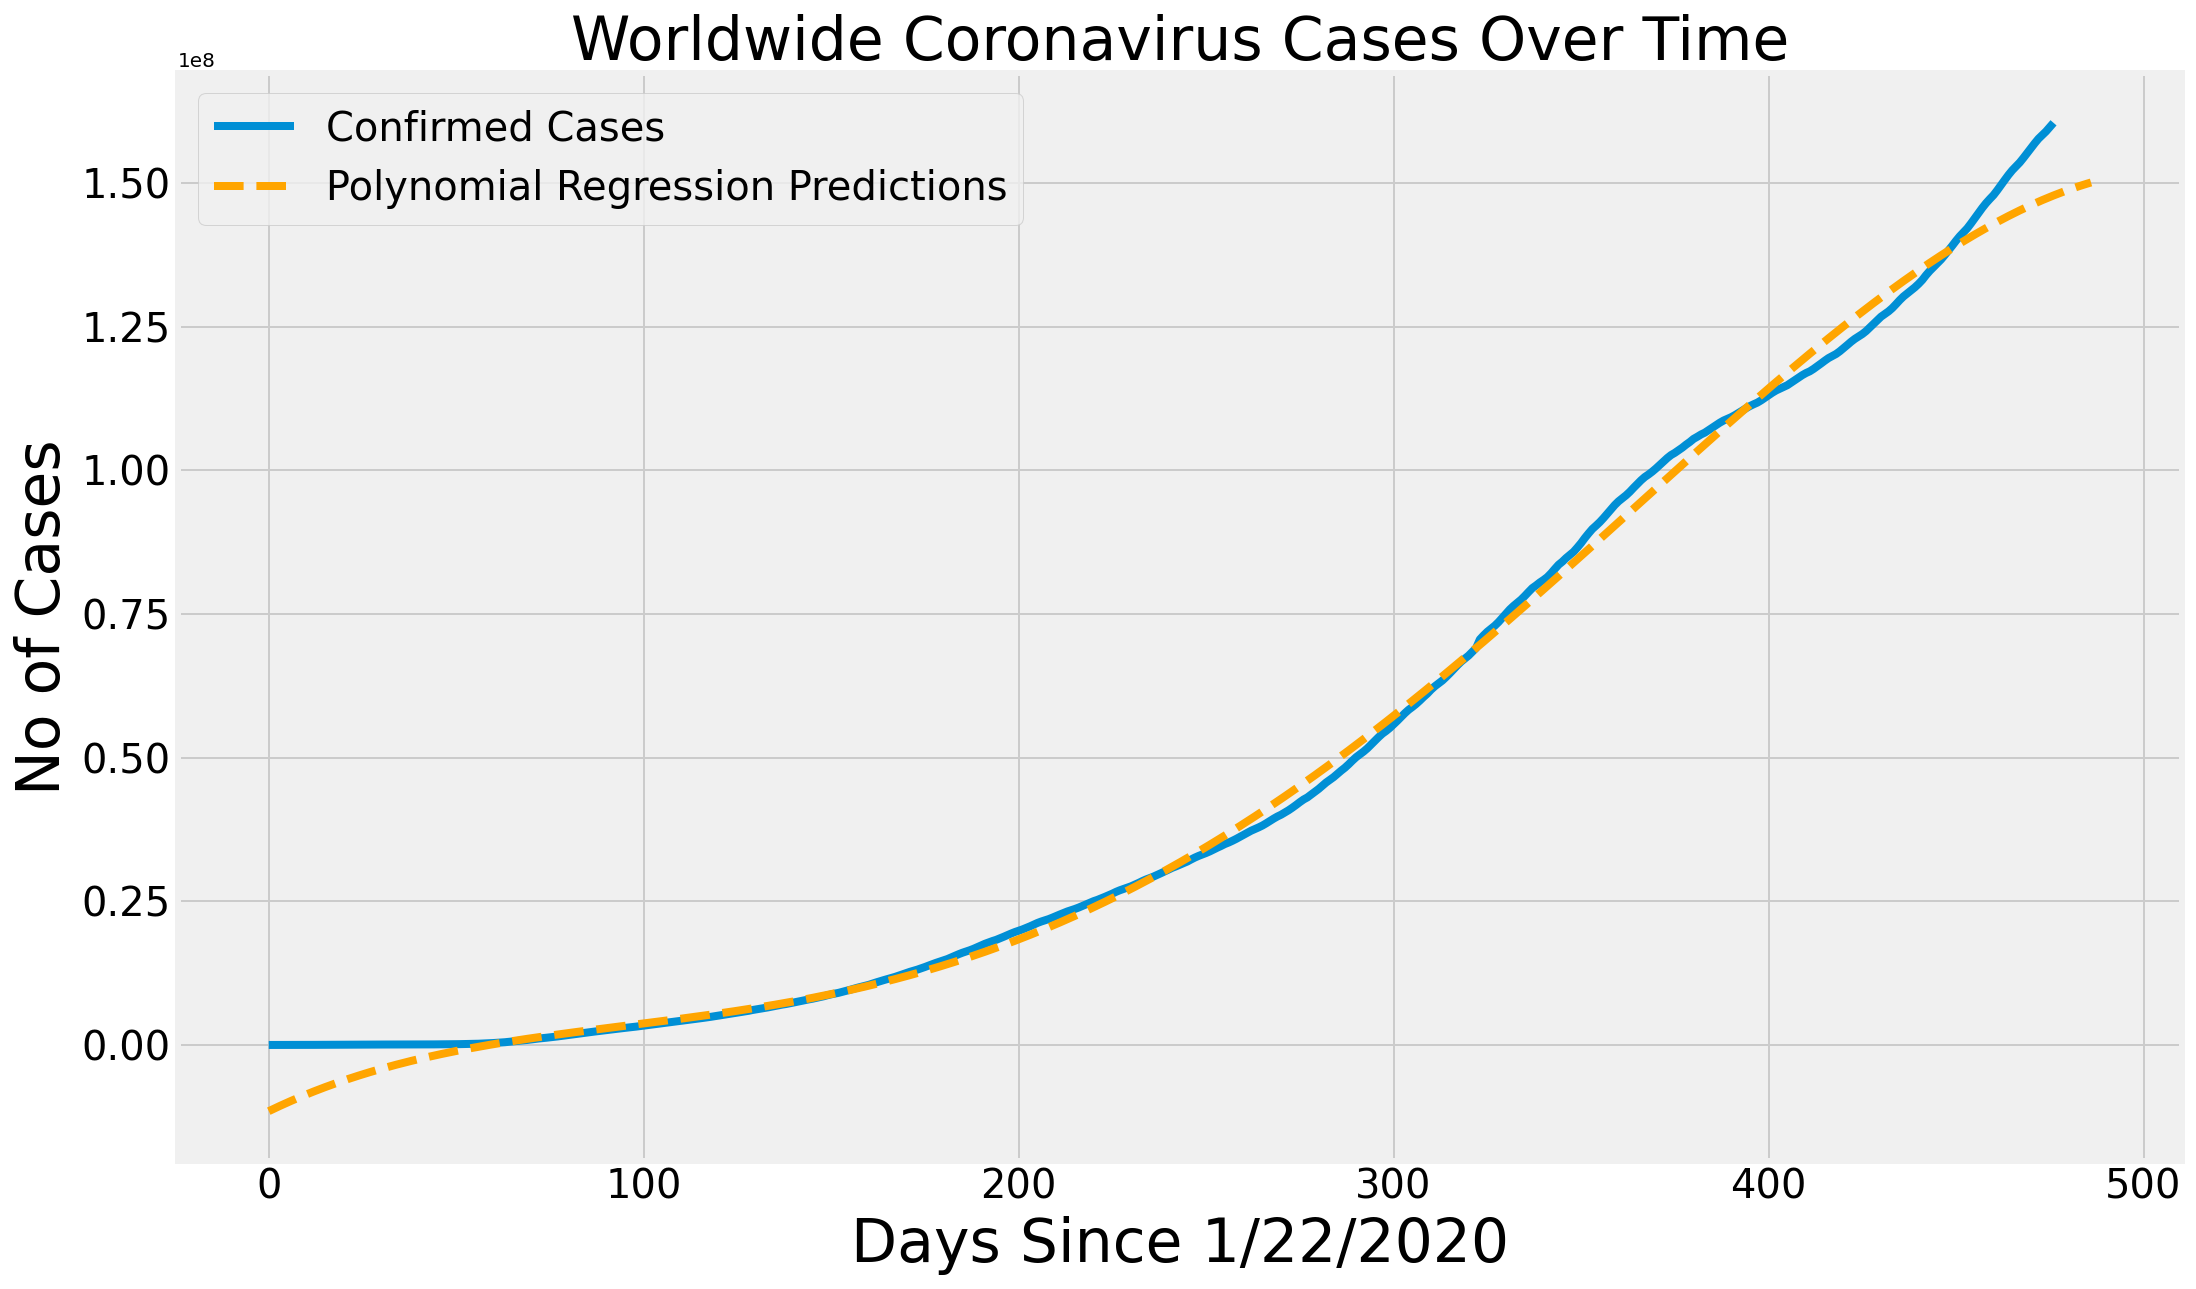

In [97]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')

In [98]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df.style.background_gradient(cmap='Reds')

In [99]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
linear_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial Predicted # of Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
linear_df.style.background_gradient(cmap='Reds')

Mortality Rate (worldwide) **susceptible to change **

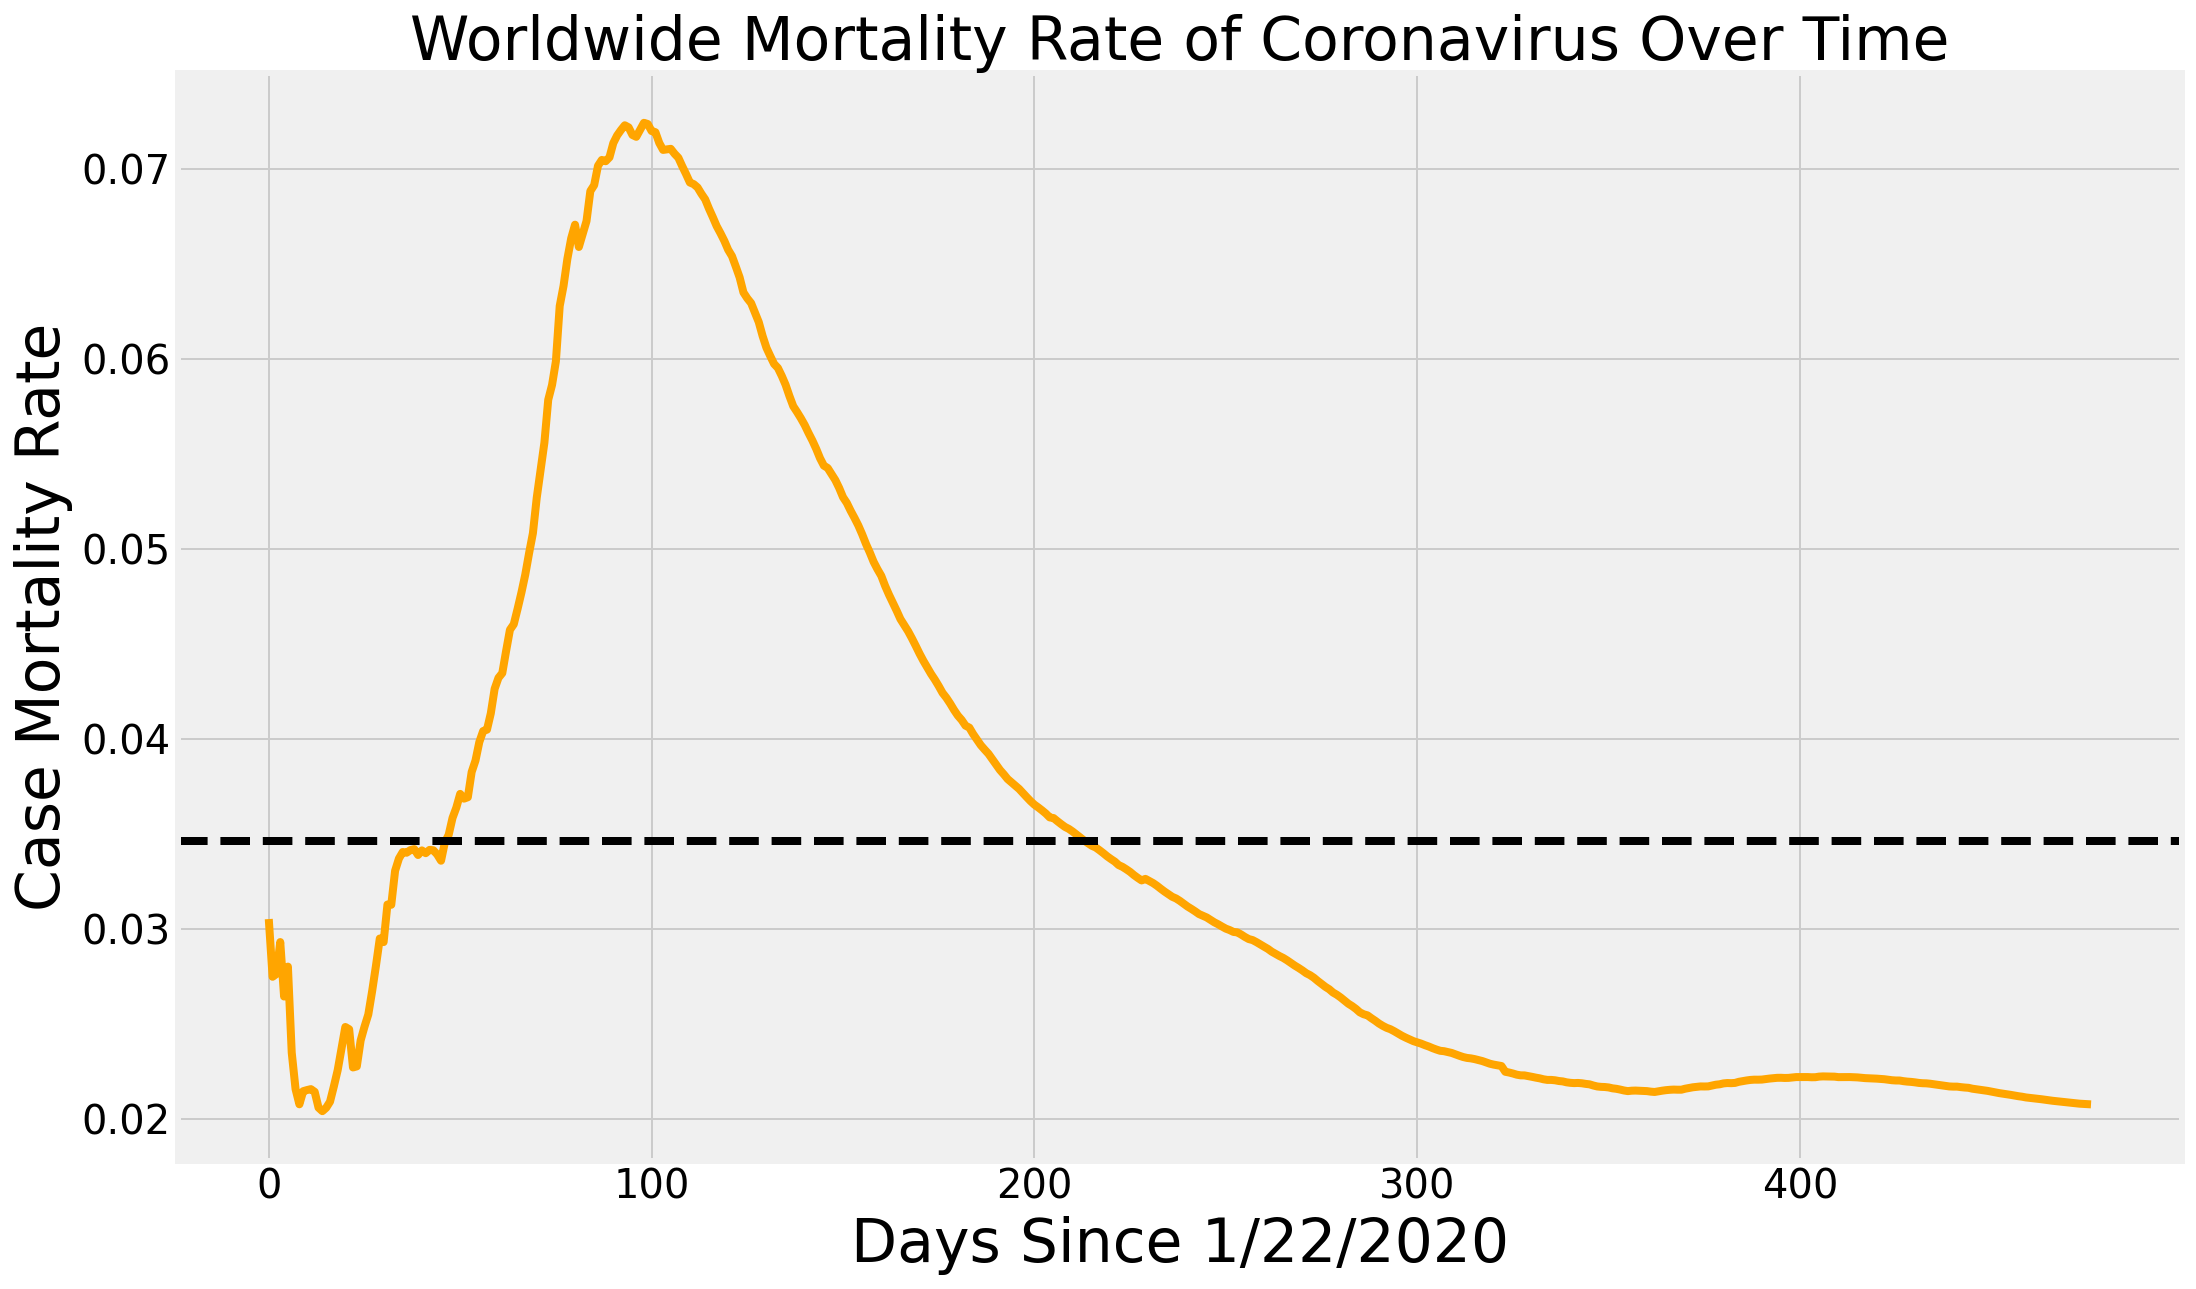

In [100]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Worldwide Mortality Rate of Coronavirus Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Case Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

Getting information about **countries/regions** that have confirmed coronavirus cases

In [101]:
latest_data

FIPS Admin2 Province_State      Country_Region          Last_Update  \
0      NaN    NaN            NaN         Afghanistan  2021-05-11 04:20:41   
1      NaN    NaN            NaN             Albania  2021-05-11 04:20:41   
2      NaN    NaN            NaN             Algeria  2021-05-11 04:20:41   
3      NaN    NaN            NaN             Andorra  2021-05-11 04:20:41   
4      NaN    NaN            NaN              Angola  2021-05-11 04:20:41   
...    ...    ...            ...                 ...                  ...   
3978   NaN    NaN            NaN             Vietnam  2021-05-11 04:20:41   
3979   NaN    NaN            NaN  West Bank and Gaza  2021-05-11 04:20:41   
3980   NaN    NaN            NaN               Yemen  2021-05-11 04:20:41   
3981   NaN    NaN            NaN              Zambia  2021-05-11 04:20:41   
3982   NaN    NaN            NaN            Zimbabwe  2021-05-11 04:20:41   

            Lat       Long_  Confirmed  Deaths  Recovered   Active  \
0     33.939110   67.709953      62063    2698    54382.0   4983.0   
1     41.153300   20.168300     131753    2416   118041.0  11296.0   
2     28.033900    1.659600     124288    3335    86554.0  34399.0   
3     42.506300    1.521800      13429     127    13021.0    281.0   
4    -11.202700   17.873900      28875     636    24772.0   3467.0   
...         ...         ...        ...     ...        ...      ...   
3978  14.058324  108.277199       3489      35     2618.0    836.0   
3979  31.952200   35.233200     302249    3378   287206.0  11665.0   
3980  15.552727   48.516388       6485    1275     3001.0   2209.0   
3981 -13.133897   27.849332      92112    1257    90501.0    354.0   
3982 -19.015438   29.154857      38433    1576    36208.0    649.0   

            Combined_Key  Incident_Rate  Case_Fatality_Ratio  
0            Afghanistan     159.428834             4.347196  
1                Albania    4578.254222             1.833734  
2                Algeria     283.432255             2.683284  
3                Andorra   17380.443927             0.945714  
4                 Angola      87.856035             2.202597  
...                  ...            ...                  ...  
3978             Vietnam       3.584396             1.003153  
3979  West Bank and Gaza    5924.805975             1.117622  
3980               Yemen      21.742798            19.660756  
3981              Zambia     501.045586             1.364643  
3982            Zimbabwe     258.582983             4.100643  

[3983 rows x 14 columns]

In [102]:
unique_countries =  list(latest_data['Country_Region'].unique())

In [103]:
country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
# country_recovery_cases = []
country_incidence_rate = [] 
country_mortality_rate = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
#     country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Active'].sum())
    country_incidence_rate.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Incident_Rate'].sum())
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

# Data table
<a id='data_table'></a>
This shows covid data for several countries. The table includes the number of confirmed cases, deaths, active cases, incidence rate, and mortality rate. 

In [104]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': [format(int(i), ',d') for i in country_confirmed_cases],
                          'Number of Deaths': [format(int(i), ',d') for i in country_death_cases], 
                          'Number of Active Cases' : [format(int(i), ',d') for i in country_active_cases], 'Incidence Rate' : country_incidence_rate,
                          'Mortality Rate': country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Oranges')

In [105]:
unique_provinces =  list(latest_data['Province_State'].unique())

Getting the latest information about **provinces/states** that have confirmed coronavirus cases

In [106]:
province_confirmed_cases = []
province_country = [] 
province_death_cases = [] 
# province_recovery_cases = []
province_active = [] 
province_incidence_rate = []
province_mortality_rate = [] 

no_cases = [] 
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
 
# remove areas with no confirmed cases
for i in no_cases:
    unique_provinces.remove(i)
    
unique_provinces = [k for k, v in sorted(zip(unique_provinces, province_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
#     province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    province_active.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Active'].sum())
    province_incidence_rate.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Incident_Rate'].sum())
    province_mortality_rate.append(province_death_cases[i]/province_confirmed_cases[i])

In [107]:
# nan_indices = [] 

# # handle nan if there is any, it is usually a float: float('nan')

# for i in range(len(unique_provinces)):
#     if type(unique_provinces[i]) == float:
#         nan_indices.append(i)

# unique_provinces = list(unique_provinces)
# province_confirmed_cases = list(province_confirmed_cases)

# for i in nan_indices:
#     unique_provinces.pop(i)
#     province_confirmed_cases.pop(i)

In [108]:
# number of cases per province/state/city top 100 
province_limit = 100 
province_df = pd.DataFrame({'Province/State Name': unique_provinces[:province_limit], 'Country': province_country[:province_limit], 'Number of Confirmed Cases': [format(int(i), ',d') for i in province_confirmed_cases[:province_limit]],
                          'Number of Deaths': [format(int(i), ',d') for i in province_death_cases[:province_limit]],'Number of Active Cases' : [format(int(i), ',d') for i in province_active[:province_limit]], 
                            'Incidence Rate' : province_incidence_rate[:province_limit], 'Mortality Rate': province_mortality_rate[:province_limit]})
# number of cases per country/region

province_df.style.background_gradient(cmap='Oranges')

In [109]:
# return the data table with province/state info for a given country
def country_table(country_name):
    states = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    state_confirmed_cases = []
    state_death_cases = [] 
    # state_recovery_cases = []
    state_active = [] 
    state_incidence_rate = [] 
    state_mortality_rate = [] 

    no_cases = [] 
    for i in states:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            state_confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        states.remove(i)

    states = [k for k, v in sorted(zip(states, state_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
    for i in range(len(states)):
        state_confirmed_cases[i] = latest_data[latest_data['Province_State']==states[i]]['Confirmed'].sum()
        state_death_cases.append(latest_data[latest_data['Province_State']==states[i]]['Deaths'].sum())
    #     state_recovery_cases.append(latest_data[latest_data['Province_State']==states[i]]['Recovered'].sum())
        state_active.append(latest_data[latest_data['Province_State']==states[i]]['Active'].sum())
        state_incidence_rate.append(latest_data[latest_data['Province_State']==states[i]]['Incident_Rate'].sum())
        state_mortality_rate.append(state_death_cases[i]/state_confirmed_cases[i])
        
      
    state_df = pd.DataFrame({'State Name': states, 'Number of Confirmed Cases': [format(int(i), ',d') for i in state_confirmed_cases],
                              'Number of Deaths': [format(int(i), ',d') for i in state_death_cases], 'Number of Active Cases' : [format(int(i), ',d') for i in state_active], 
                             'Incidence Rate' : state_incidence_rate, 'Mortality Rate': state_mortality_rate})
    # number of cases per country/region
    return state_df

Data table for **India**

In [110]:
india_table = country_table('India')
india_table.style.background_gradient(cmap='Oranges')

Data table for the **United States**

In [111]:
us_table = country_table('US')
us_table.style.background_gradient(cmap='Oranges')

Data table for **Brazil**

In [112]:
brazil_table = country_table('Brazil')
brazil_table.style.background_gradient(cmap='Oranges')

Data table for **Russia**

In [113]:
russia_table = country_table('Russia')
russia_table.style.background_gradient(cmap='Oranges')

Data table for **United Kingdom**

In [114]:
uk_table = country_table('United Kingdom')
uk_table.style.background_gradient(cmap='Oranges')

Data table for **China**

In [115]:
china_table = country_table('China')
china_table.style.background_gradient(cmap='Oranges')

<a id='bar_charts'></a>
# Bar Chart Visualizations for COVID-19
This offers us some insights for how different countries/regions compare in terms of covid cases.

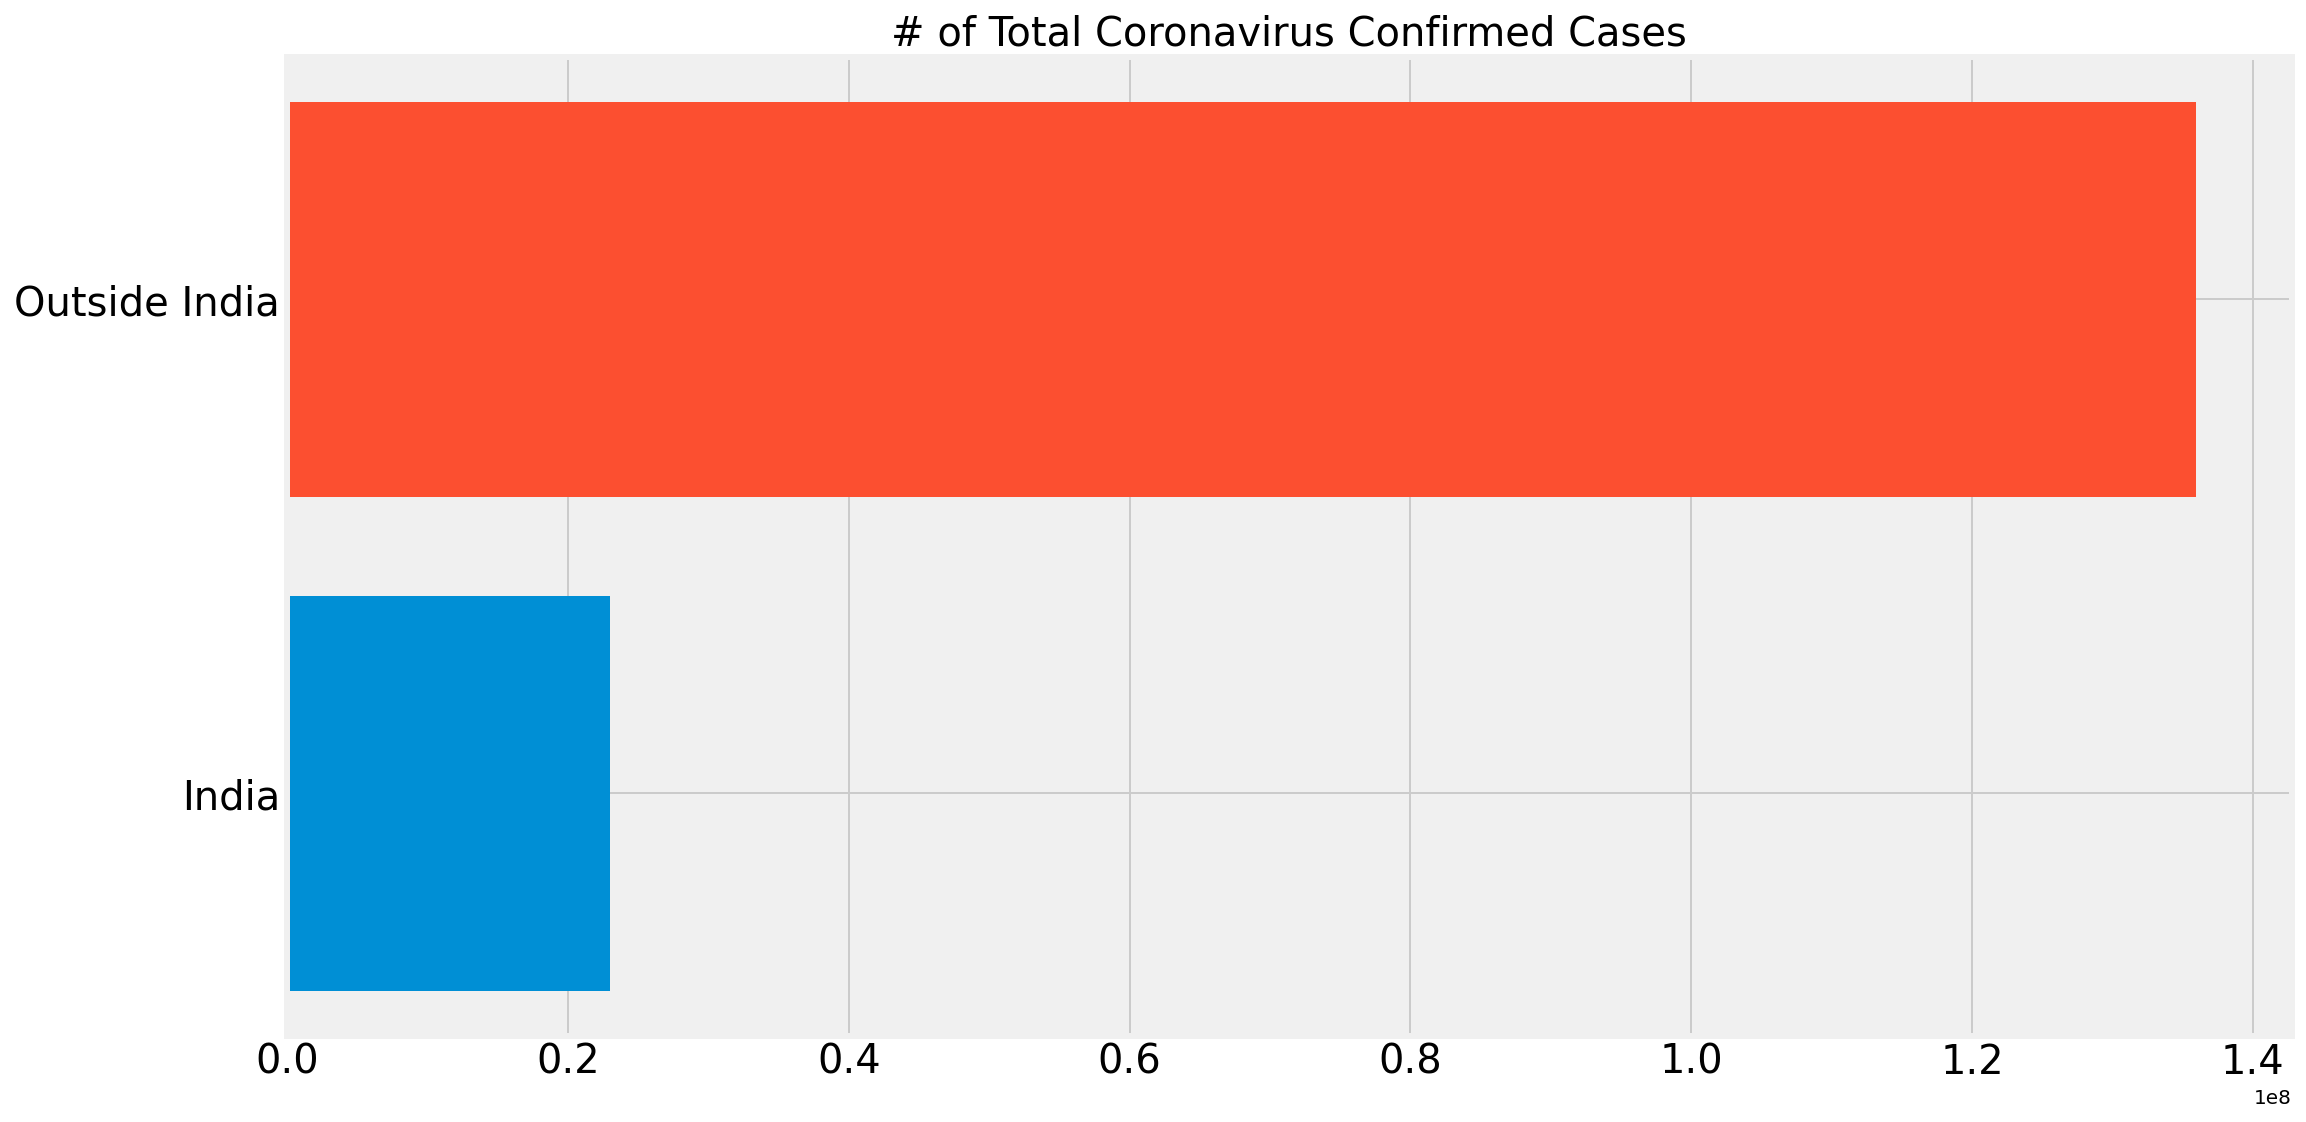

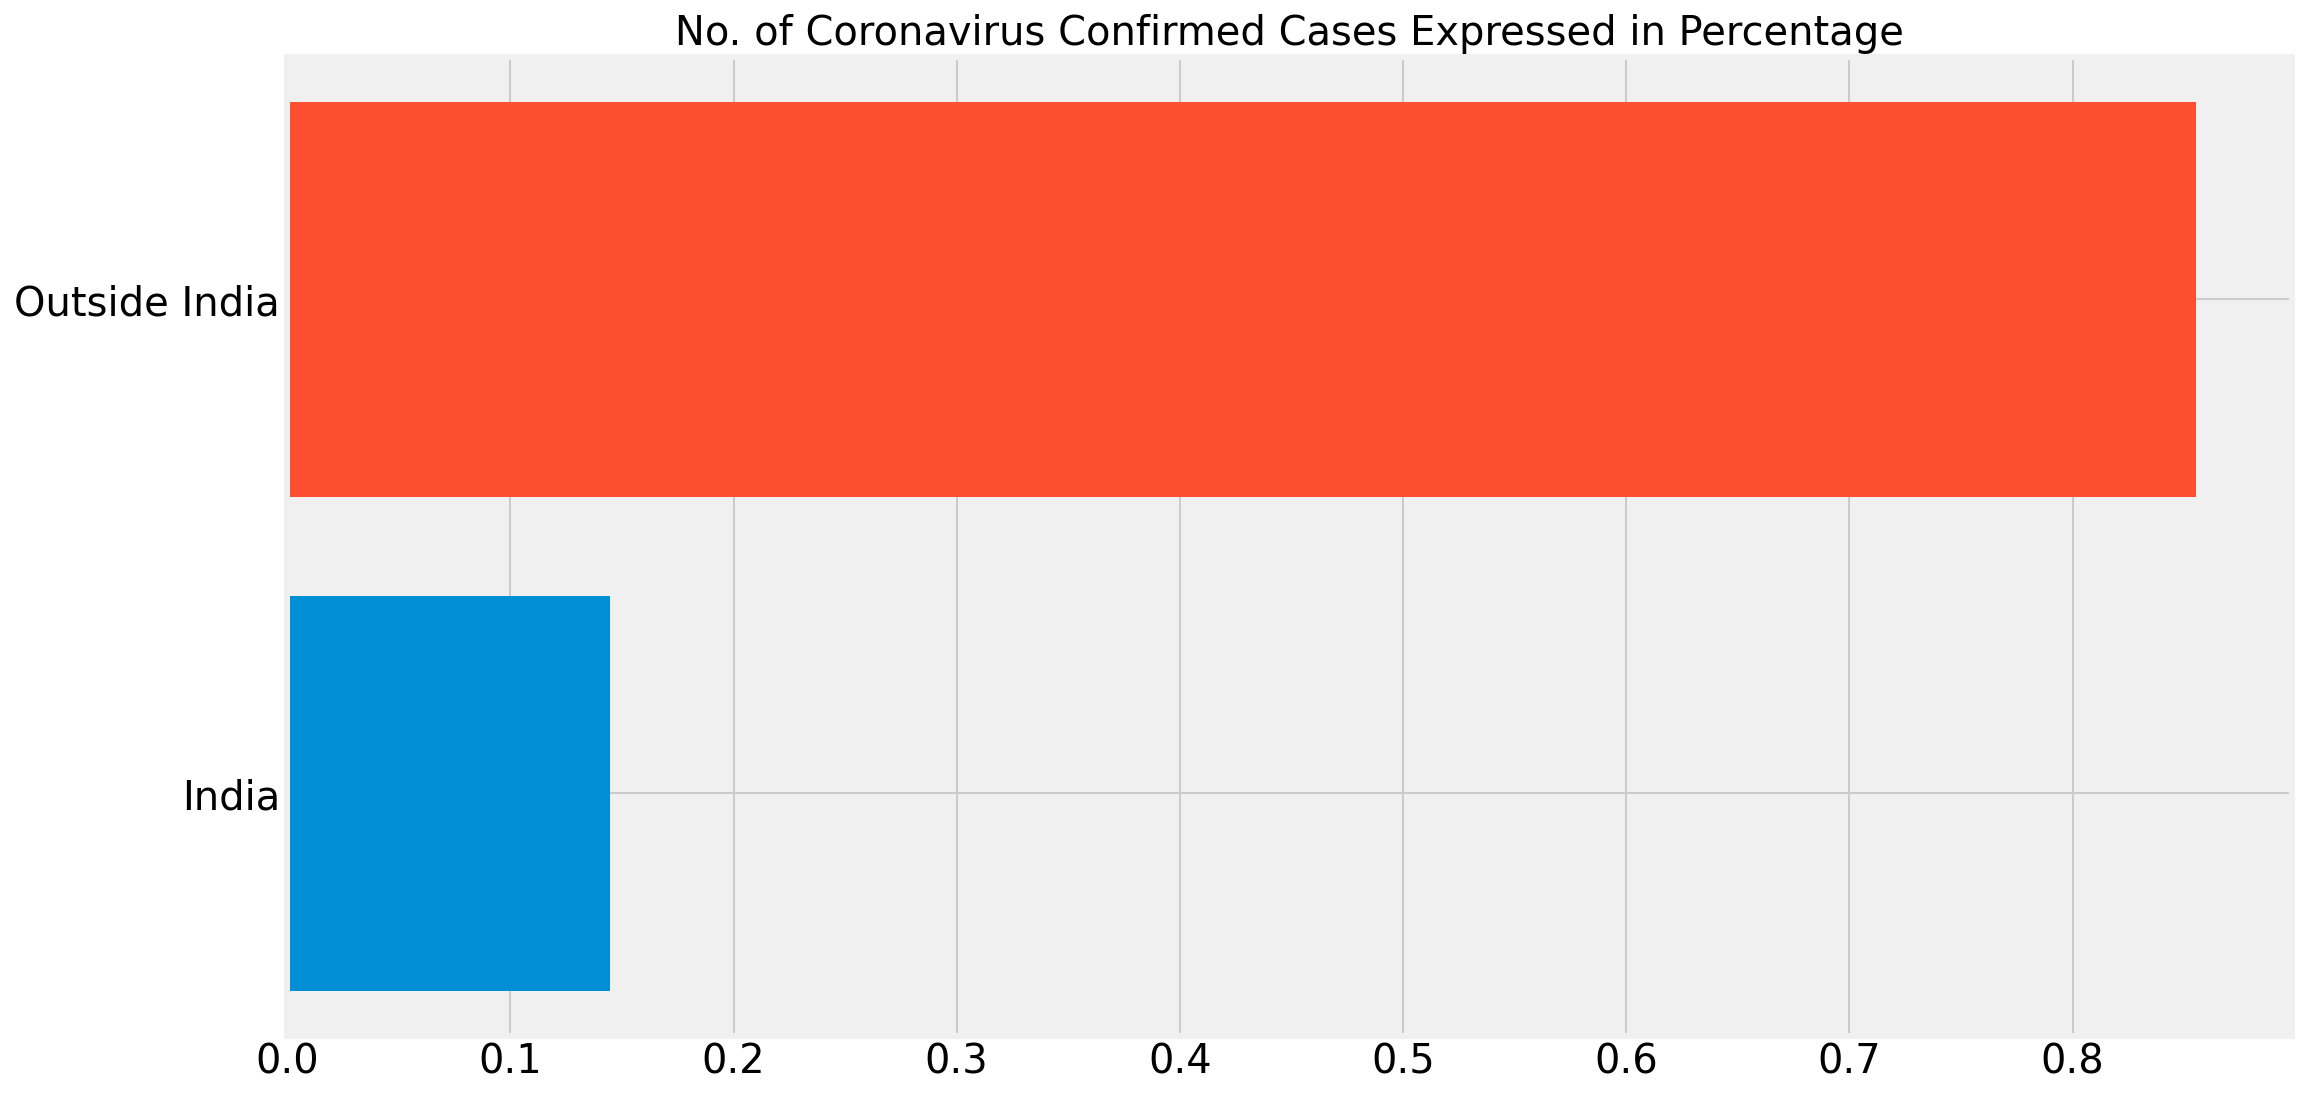

In [116]:
total_world_cases = np.sum(country_confirmed_cases)
India_confirmed = latest_data[latest_data['Country_Region']=='India']['Confirmed'].sum()
outside_India_confirmed = total_world_cases - India_confirmed

plt.figure(figsize=(16, 9))
plt.barh('India', India_confirmed)
plt.barh('Outside India', outside_India_confirmed)
plt.title('# of Total Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


plt.figure(figsize=(16, 9))
plt.barh('India', India_confirmed/total_world_cases)
plt.barh('Outside India', outside_India_confirmed/total_world_cases)
plt.title('No. of Coronavirus Confirmed Cases Expressed in Percentage', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [117]:
print('Outside India {} cases ({}%):'.format(outside_India_confirmed, np.round((outside_India_confirmed/total_world_cases)*100, 1)))
print('India {} cases ({}%)'.format(India_confirmed, np.round((India_confirmed/total_world_cases)*100, 1)))
print('Total: {} cases'.format(total_world_cases))

Outside India 135959784 cases (85.5%):
India 22992517 cases (14.5%)
Total: 158952301 cases


In [118]:
# Only show 10 countries with the most confirmed cases, the rest are grouped into the other category
visual_unique_countries = [] 
visual_confirmed_cases = []
others = np.sum(country_confirmed_cases[10:])

for i in range(len(country_confirmed_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirmed_cases[i])
    
visual_unique_countries.append('Others')
visual_confirmed_cases.append(others)

In [119]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16, 12))
    plt.barh(x, y)
    plt.title(title, size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()
    
# good for a lot x values 
def plot_bar_graphs_tall(x, y, title):
    plt.figure(figsize=(19, 18))
    plt.barh(x, y)
    plt.title(title, size=25)
    plt.xticks(size=25)
    plt.yticks(size=25)
    plt.show()

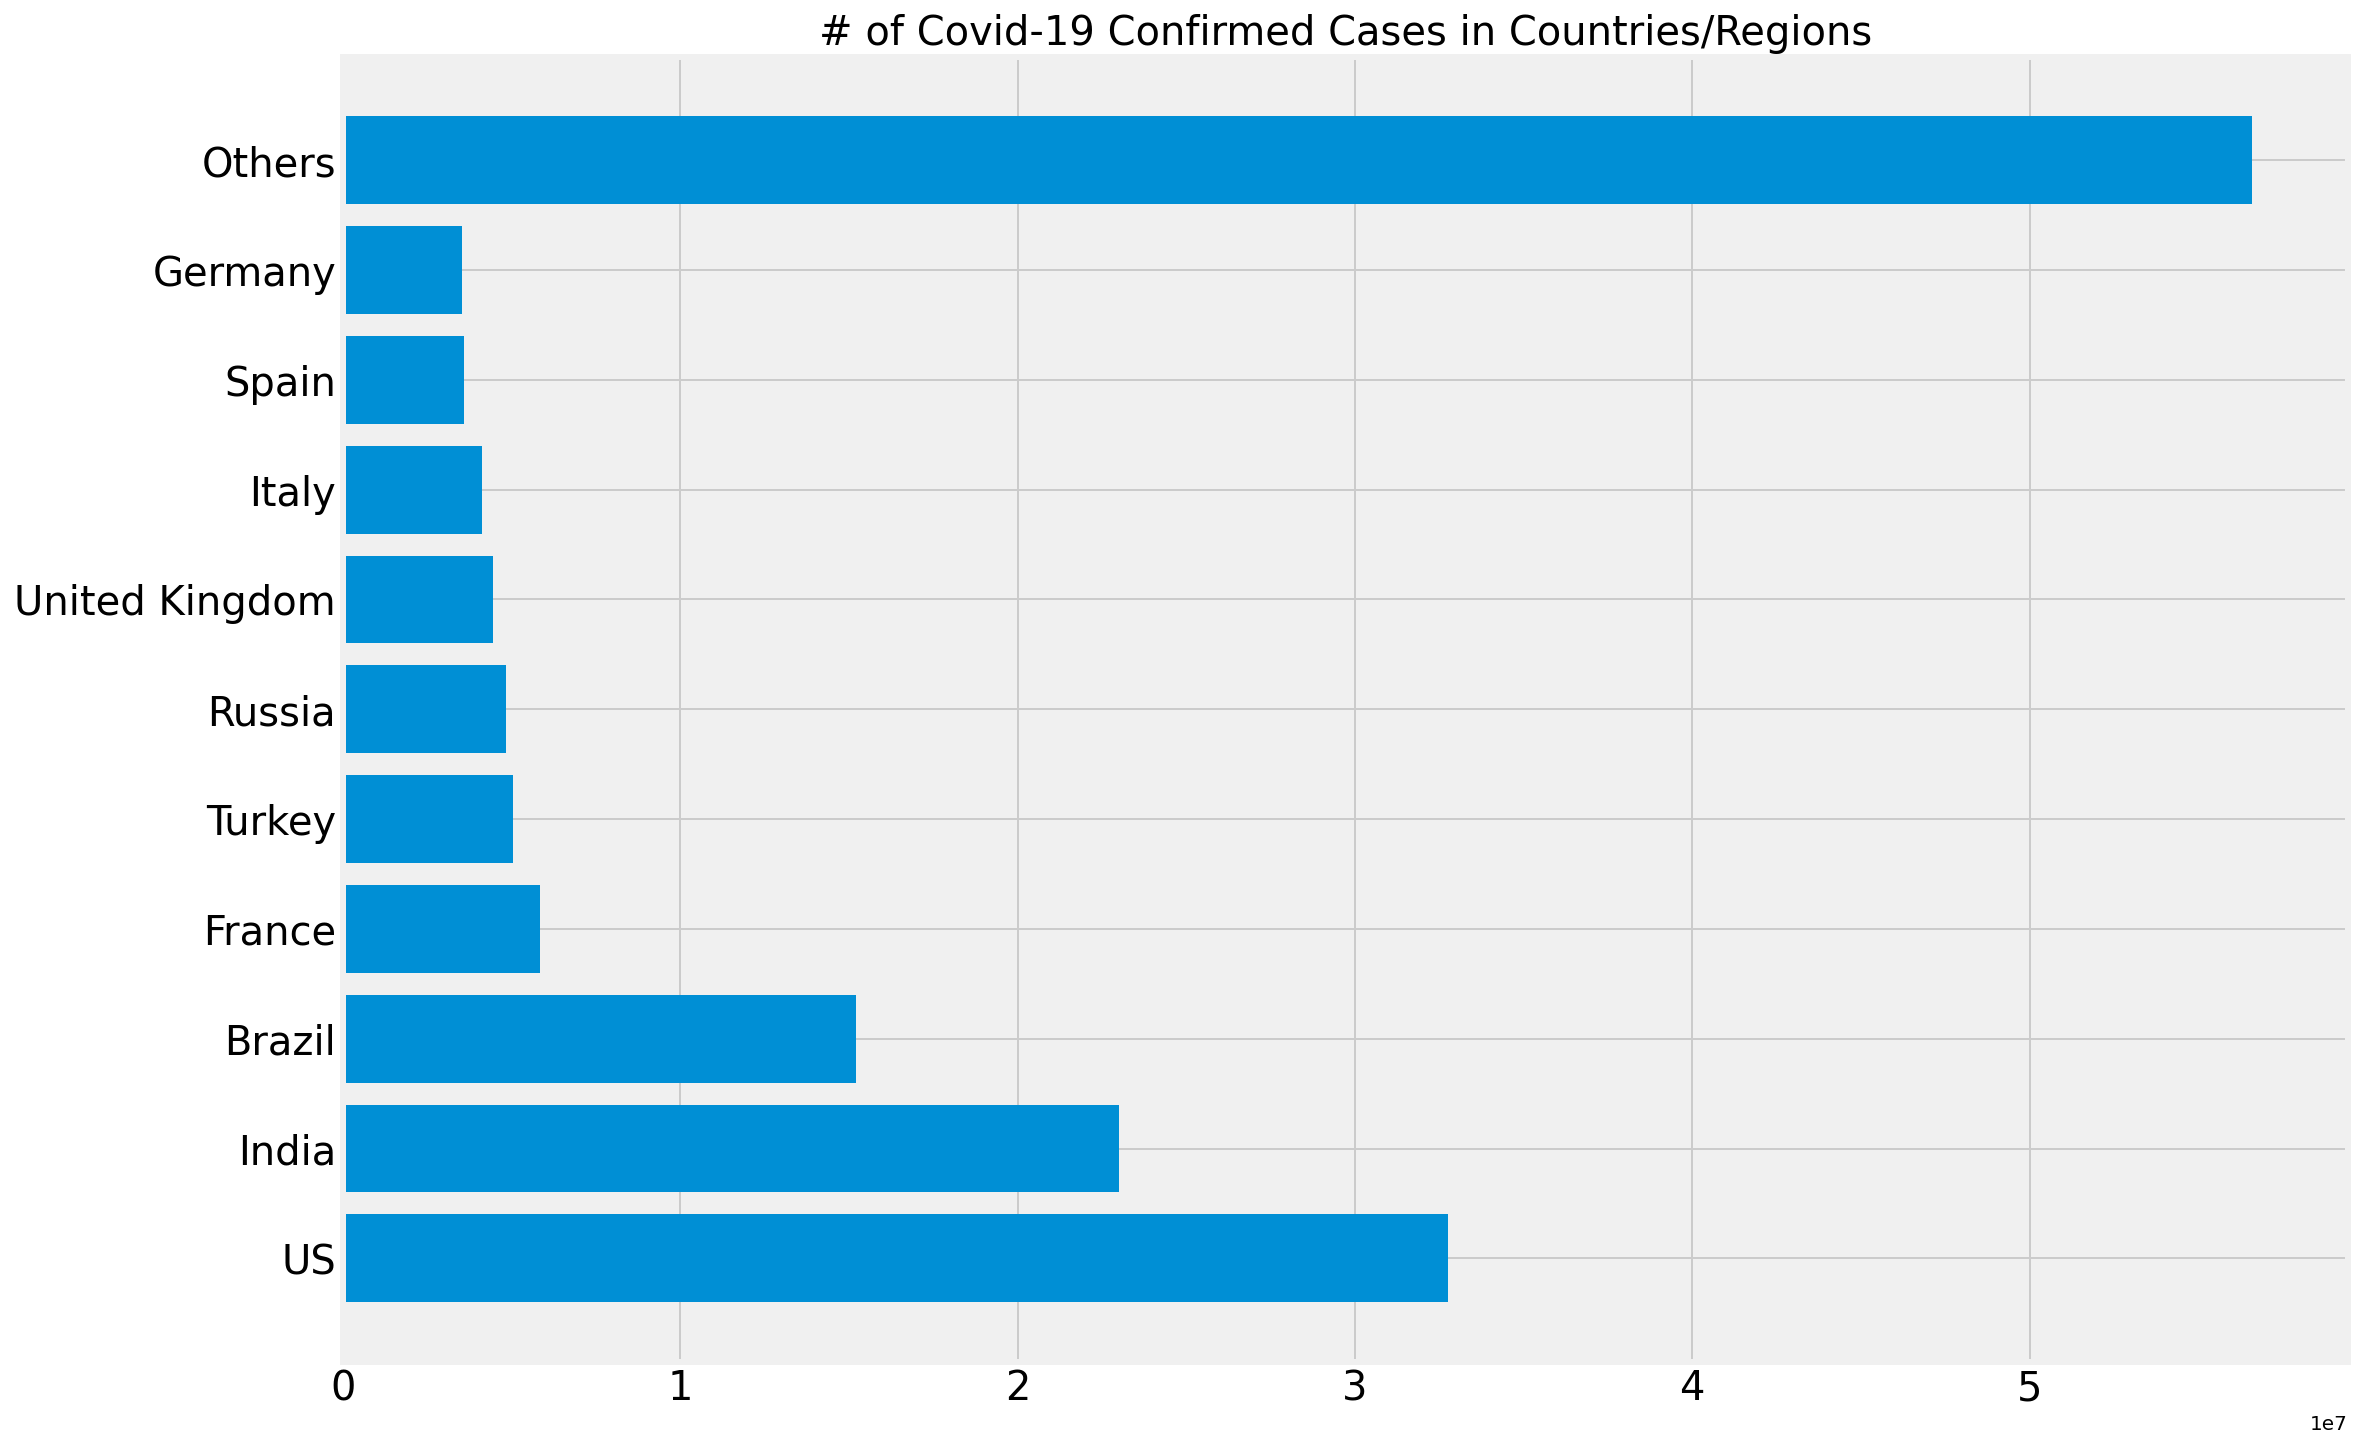

In [120]:
plot_bar_graphs(visual_unique_countries, visual_confirmed_cases, '# of Covid-19 Confirmed Cases in Countries/Regions')

<a id='pie_charts'></a>
# Pie Chart Visualizations for COVID-19
Although pie charts are not necessarily the most informative visualizations, I added them to increase some variety for the visualizations. 

In [121]:
def plot_pie_charts(x, y, title):
    # more muted color 
    c = ['lightcoral', 'rosybrown', 'sandybrown', 'navajowhite', 'gold',
        'khaki', 'lightskyblue', 'turquoise', 'lightslategrey', 'thistle', 'pink']
    plt.figure(figsize=(20,15))
    plt.title(title, size=20)
    plt.pie(y, colors=c,shadow=True, labels=y)
    plt.legend(x, loc='best', fontsize=12)
    plt.show()

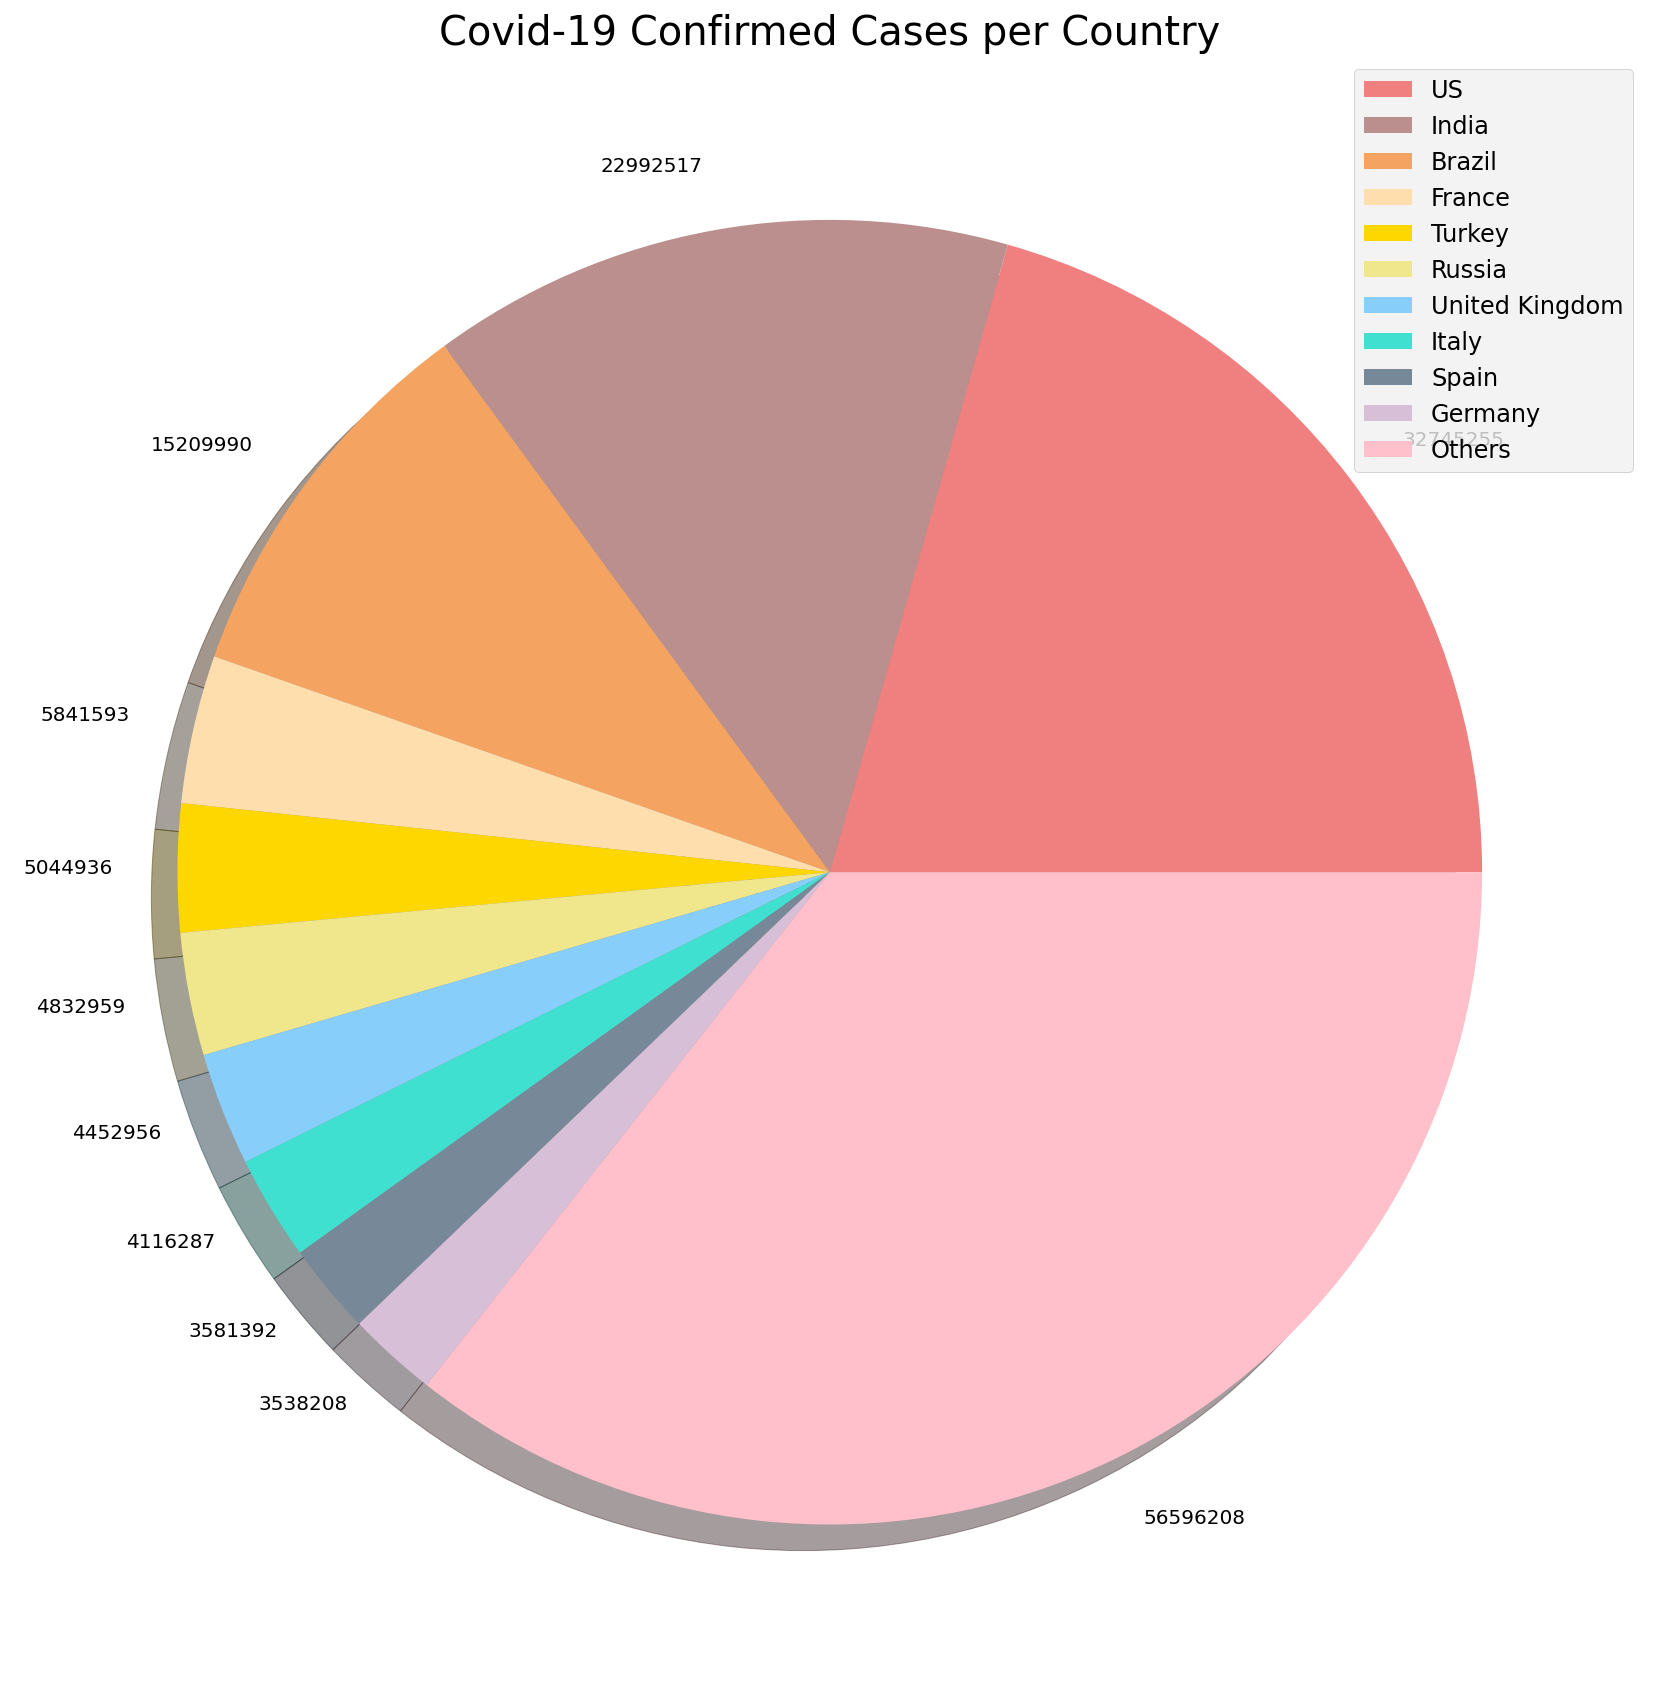

In [122]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

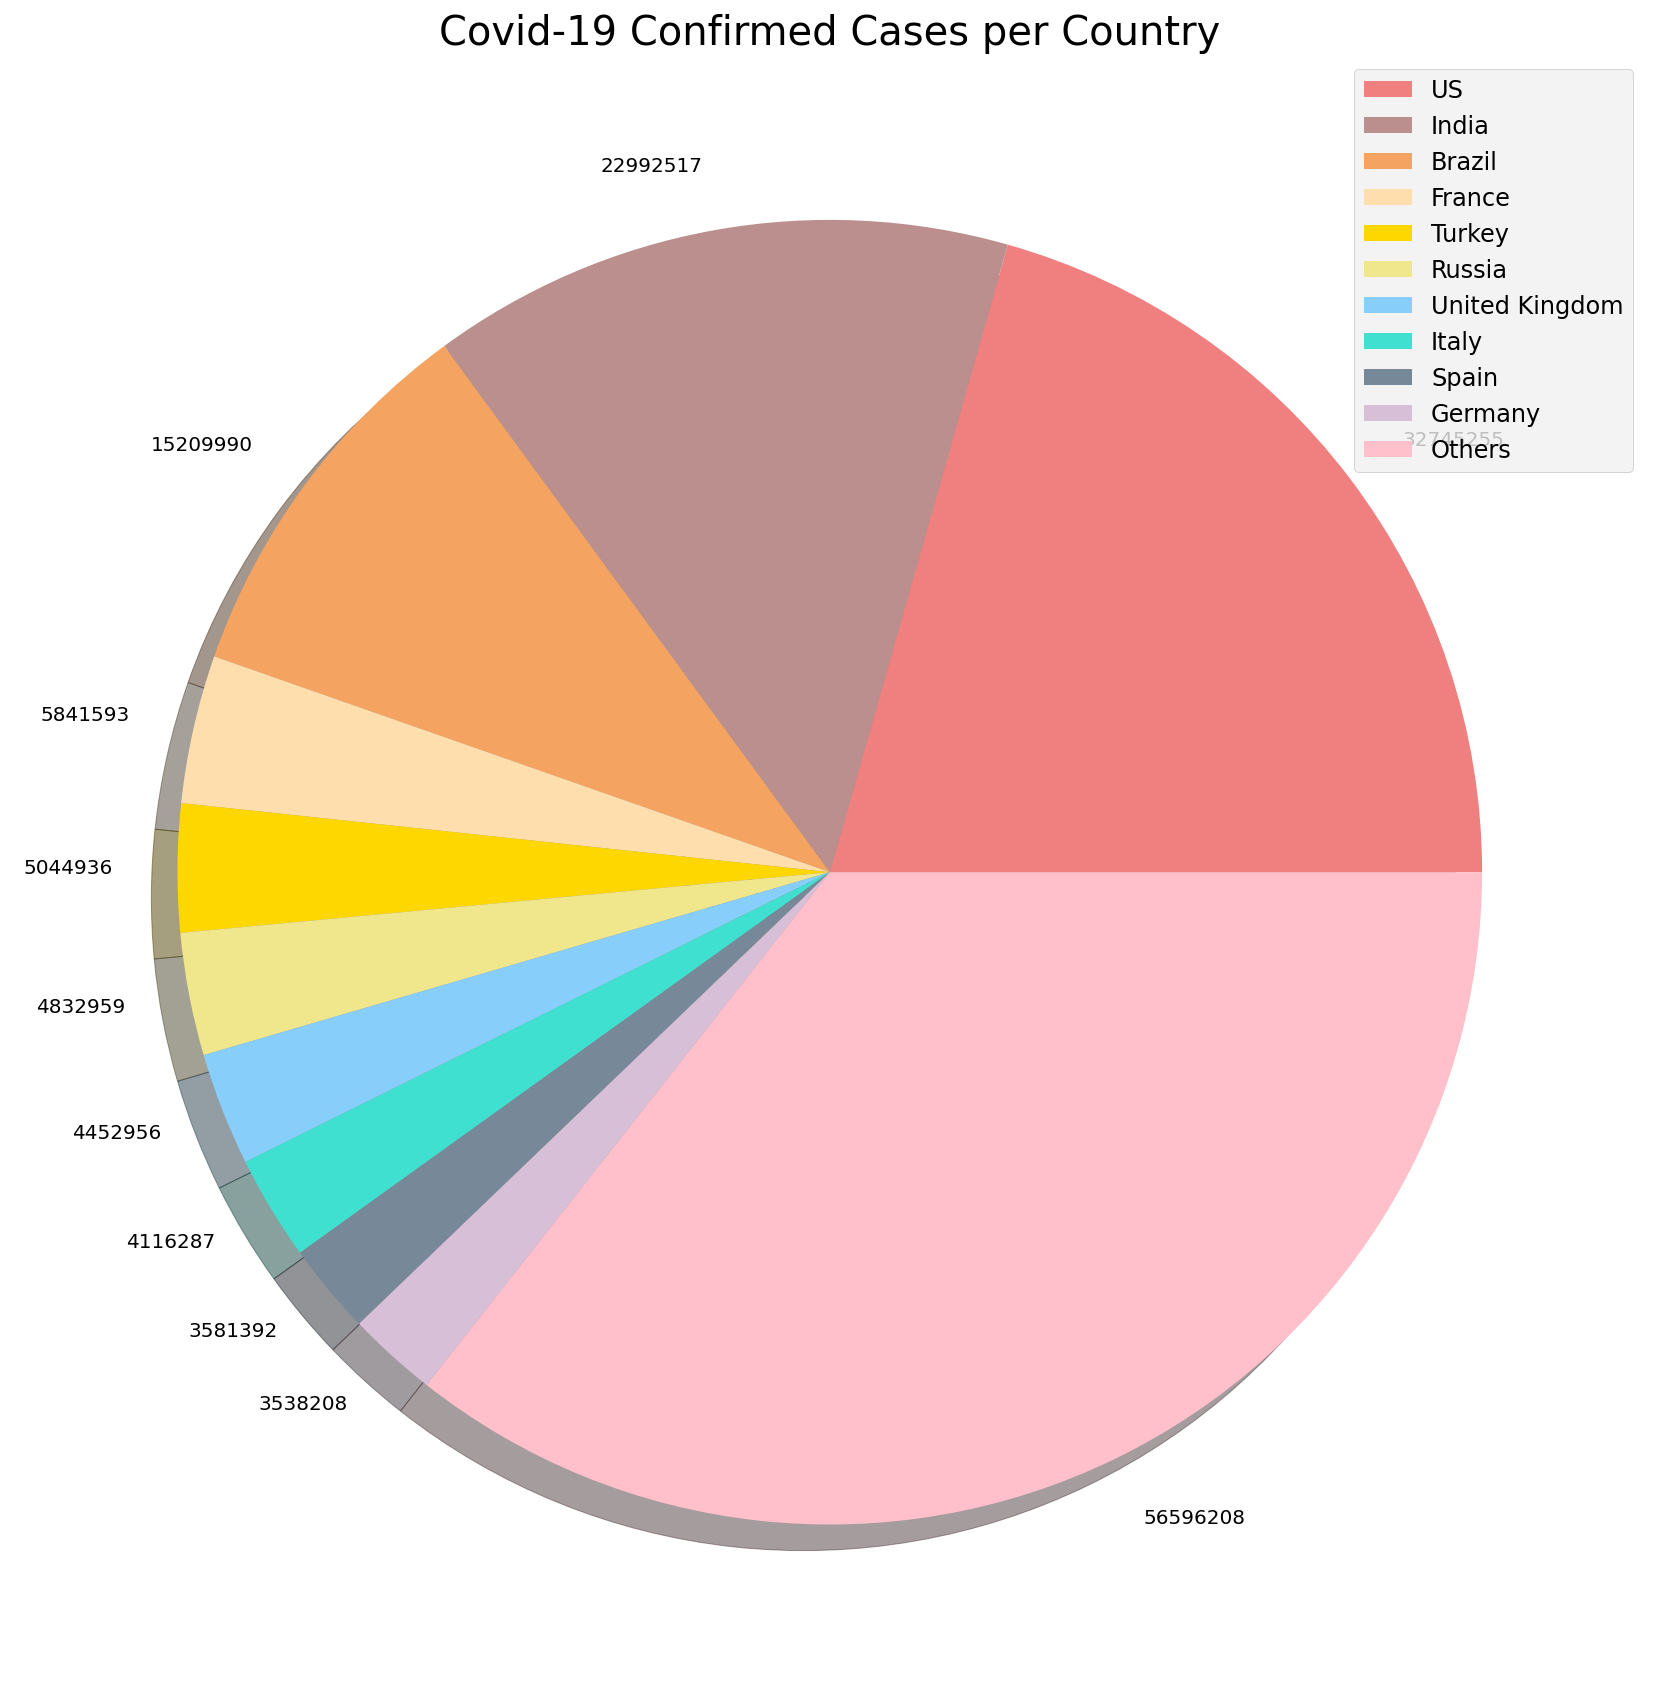

In [124]:
plot_pie_charts(visual_unique_countries, visual_confirmed_cases, 'Covid-19 Confirmed Cases per Country')

In [125]:
# Plotting countries with regional data using a pie chart 

def plot_pie_country_with_regions(country_name, title):
    regions = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = [] 
    for i in regions:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        regions.remove(i)

    # only show the top 5 states
    regions = [k for k, v in sorted(zip(regions, confirmed_cases), key=operator.itemgetter(1), reverse=True)]

    for i in range(len(regions)):
        confirmed_cases[i] = latest_data[latest_data['Province_State']==regions[i]]['Confirmed'].sum()  
    
    # additional province/state will be considered "others"
    
    if(len(regions)>5):
        regions_5 = regions[:5]
        regions_5.append('Others')
        confirmed_cases_5 = confirmed_cases[:5]
        confirmed_cases_5.append(np.sum(confirmed_cases[5:]))
        plot_pie_charts(regions_5,confirmed_cases_5, title)
    else:
        plot_pie_charts(regions,confirmed_cases, title)

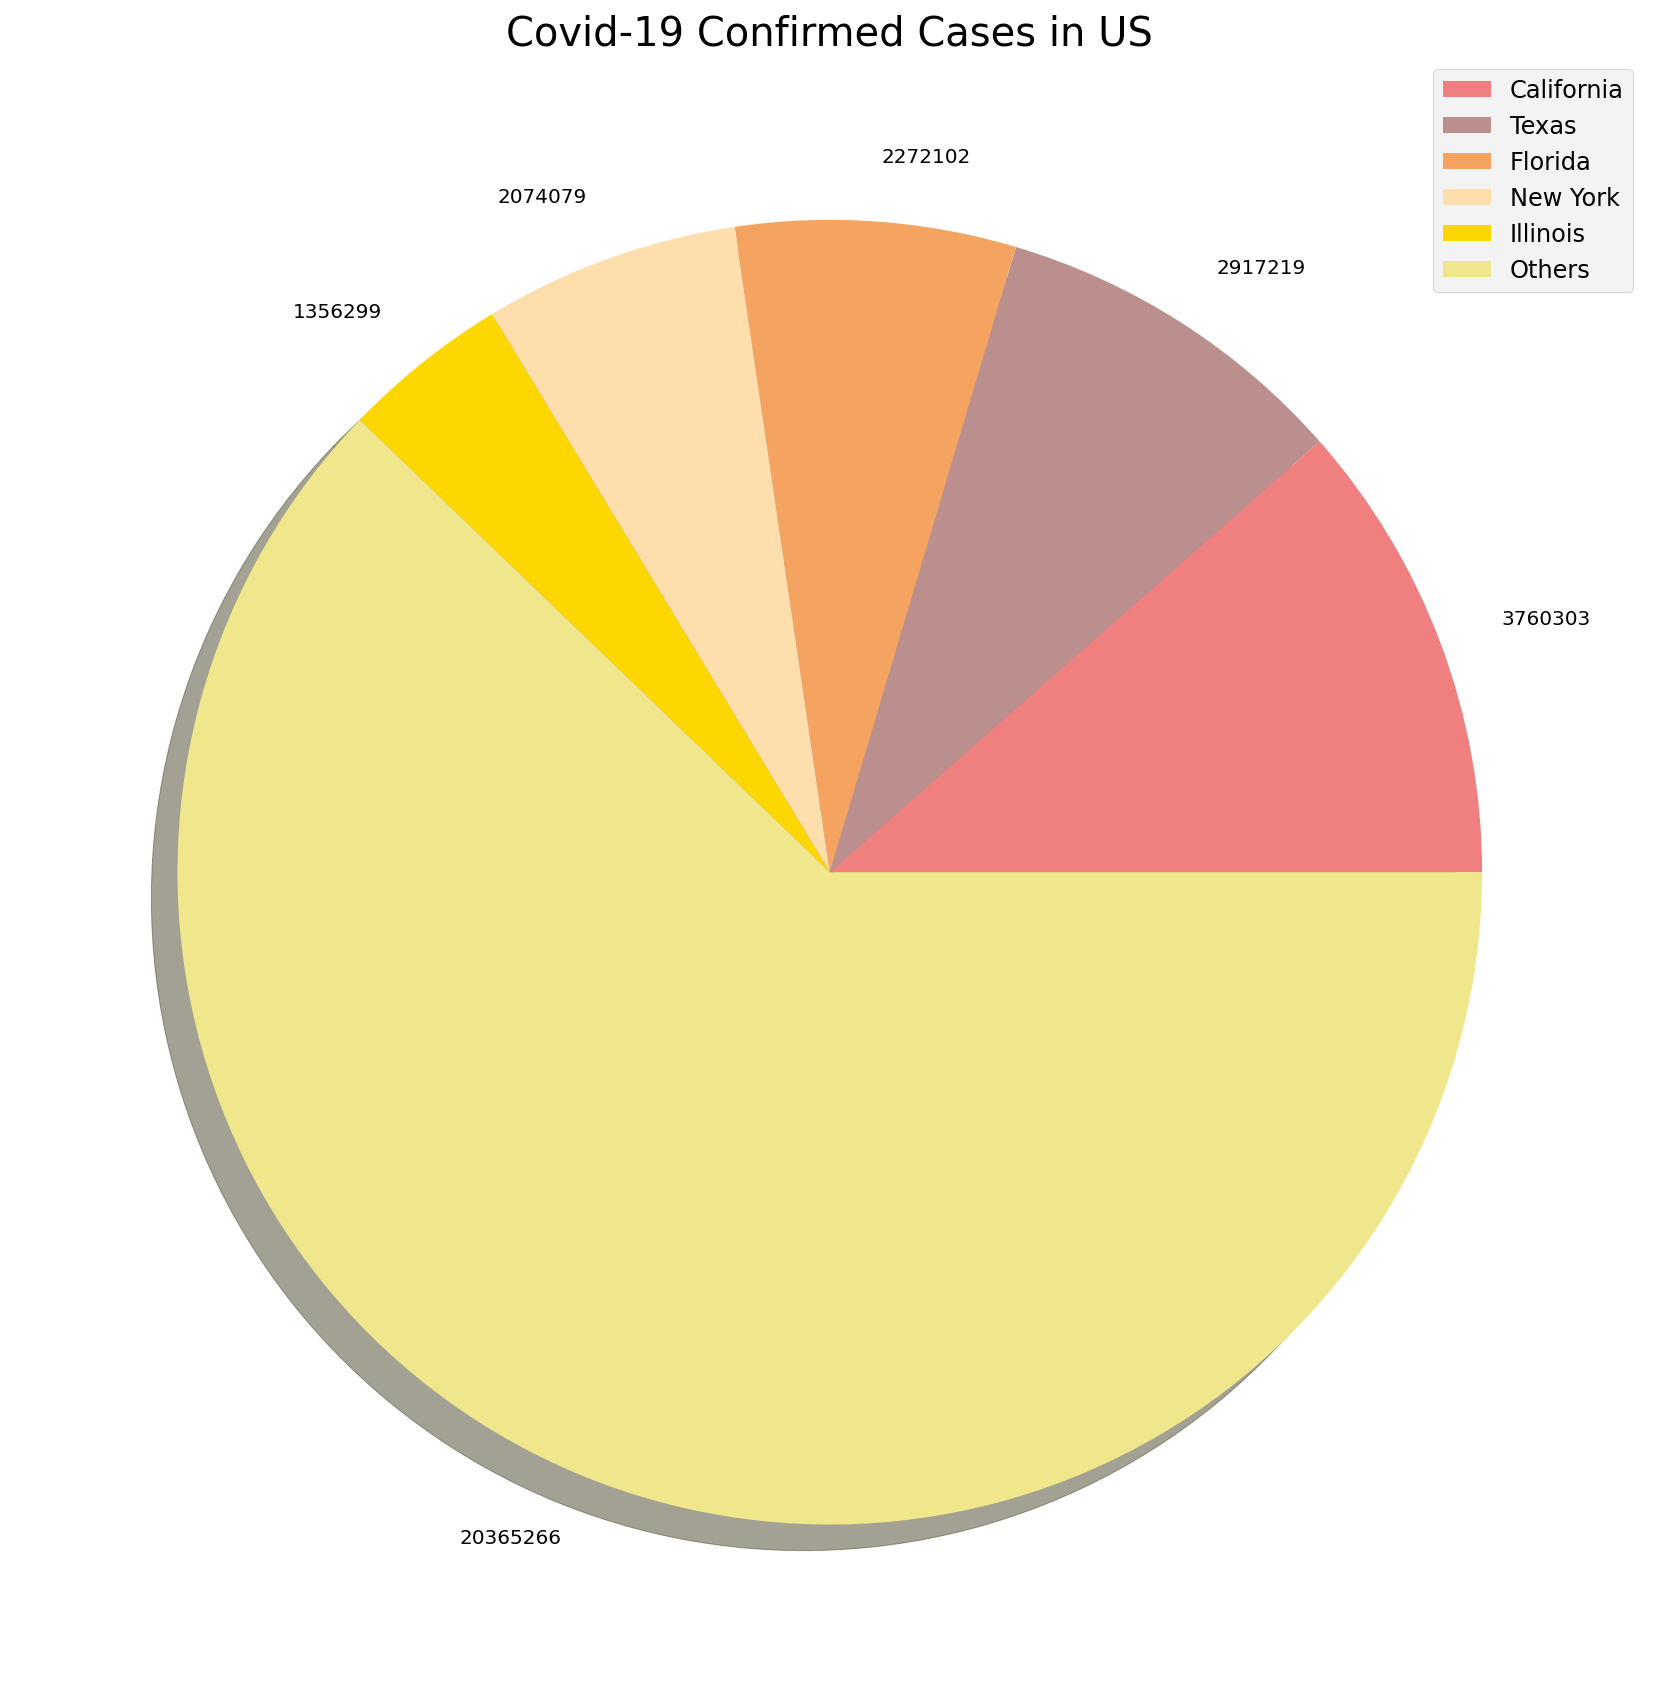

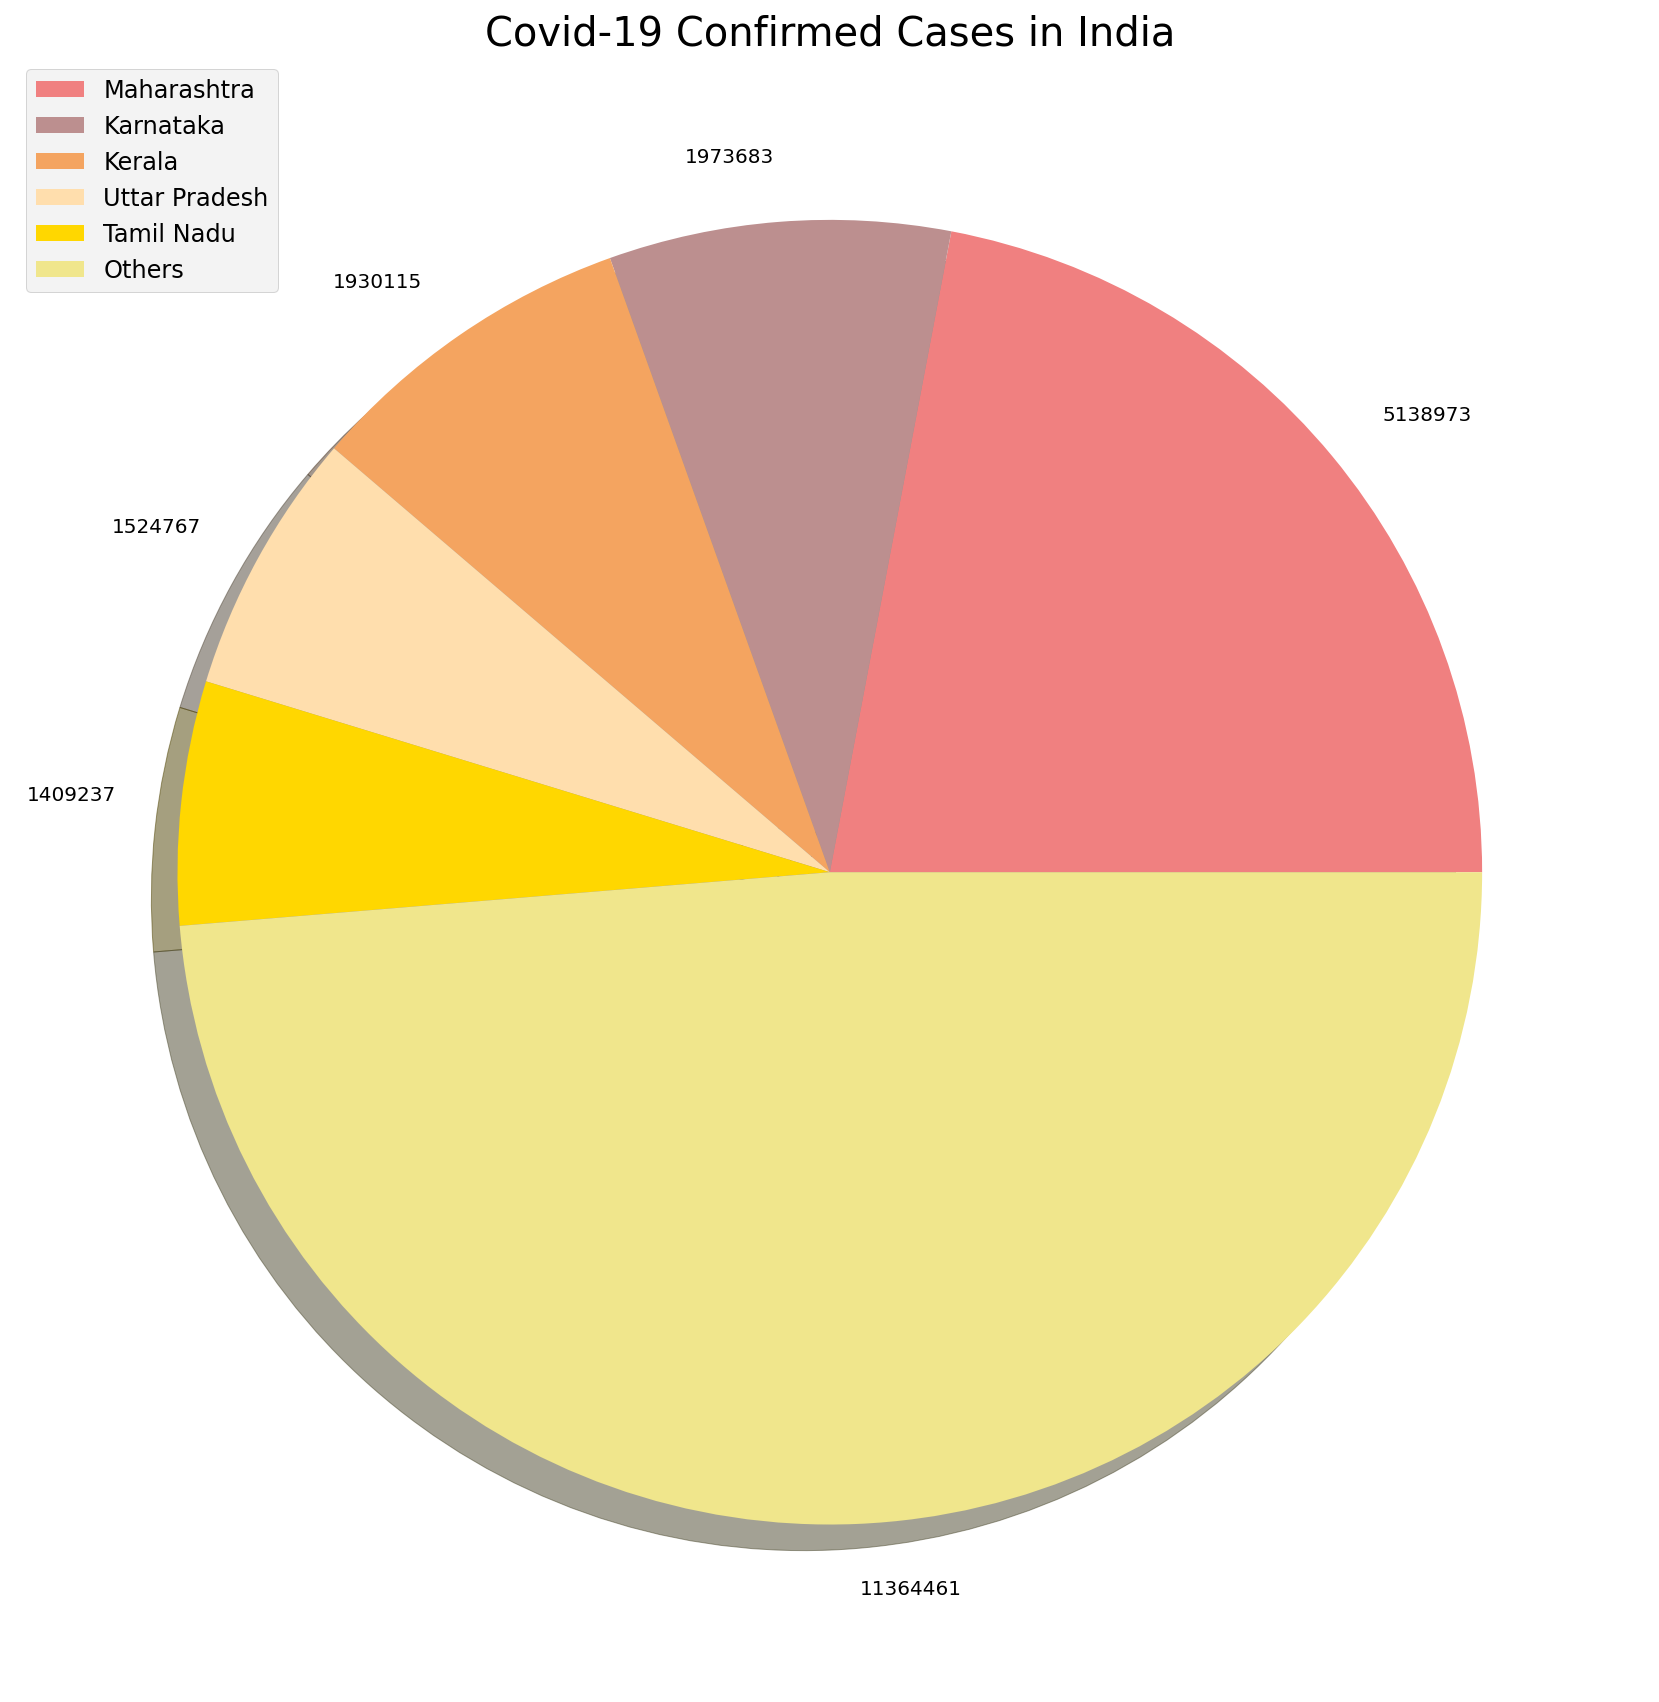

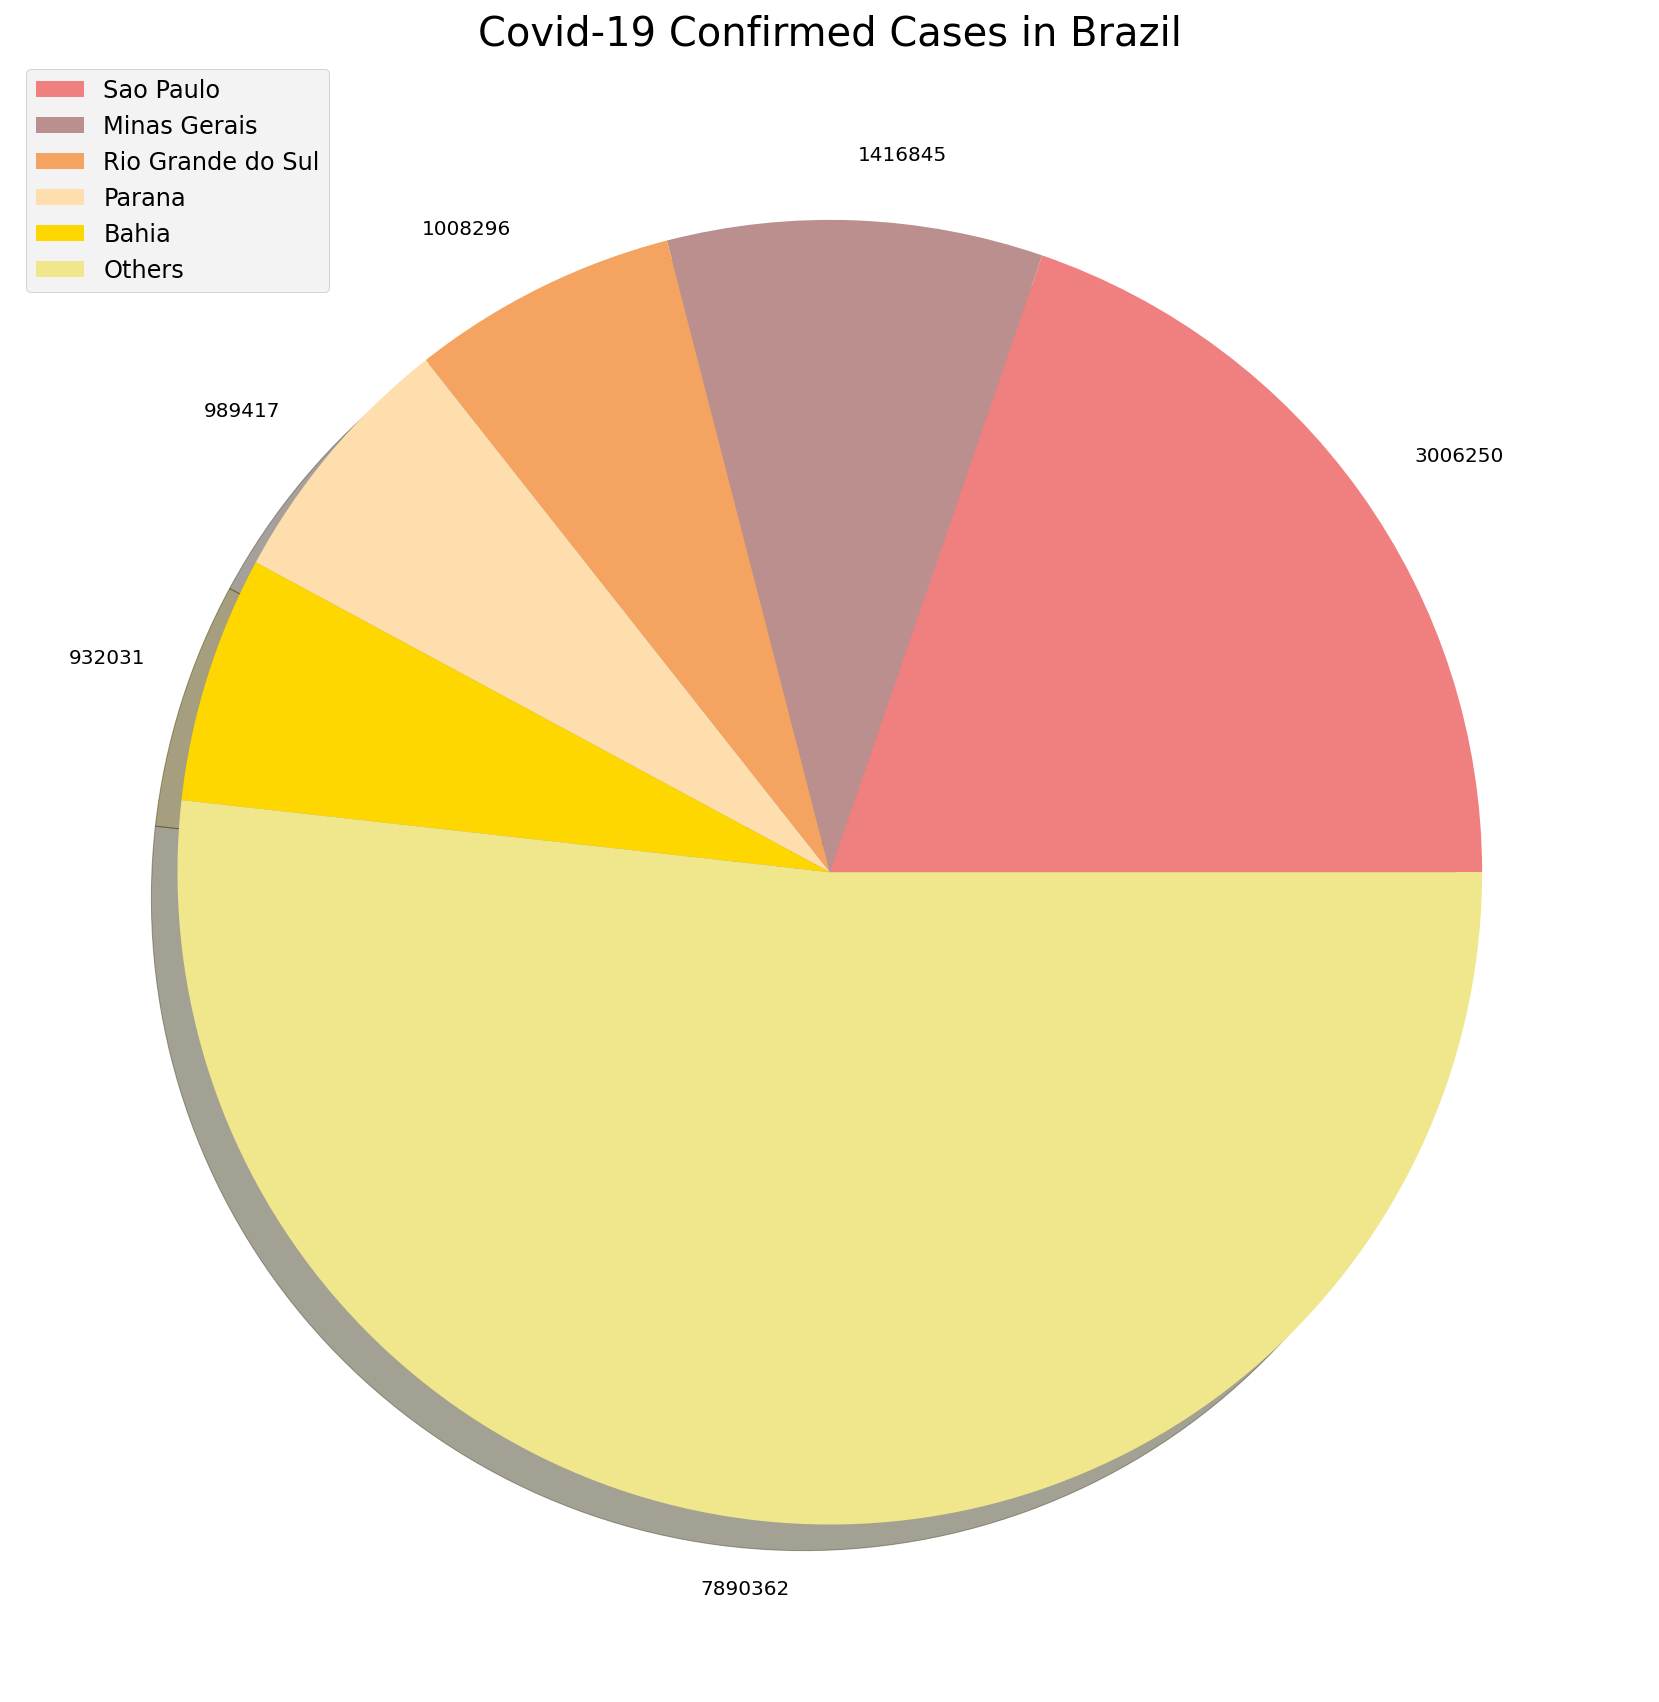

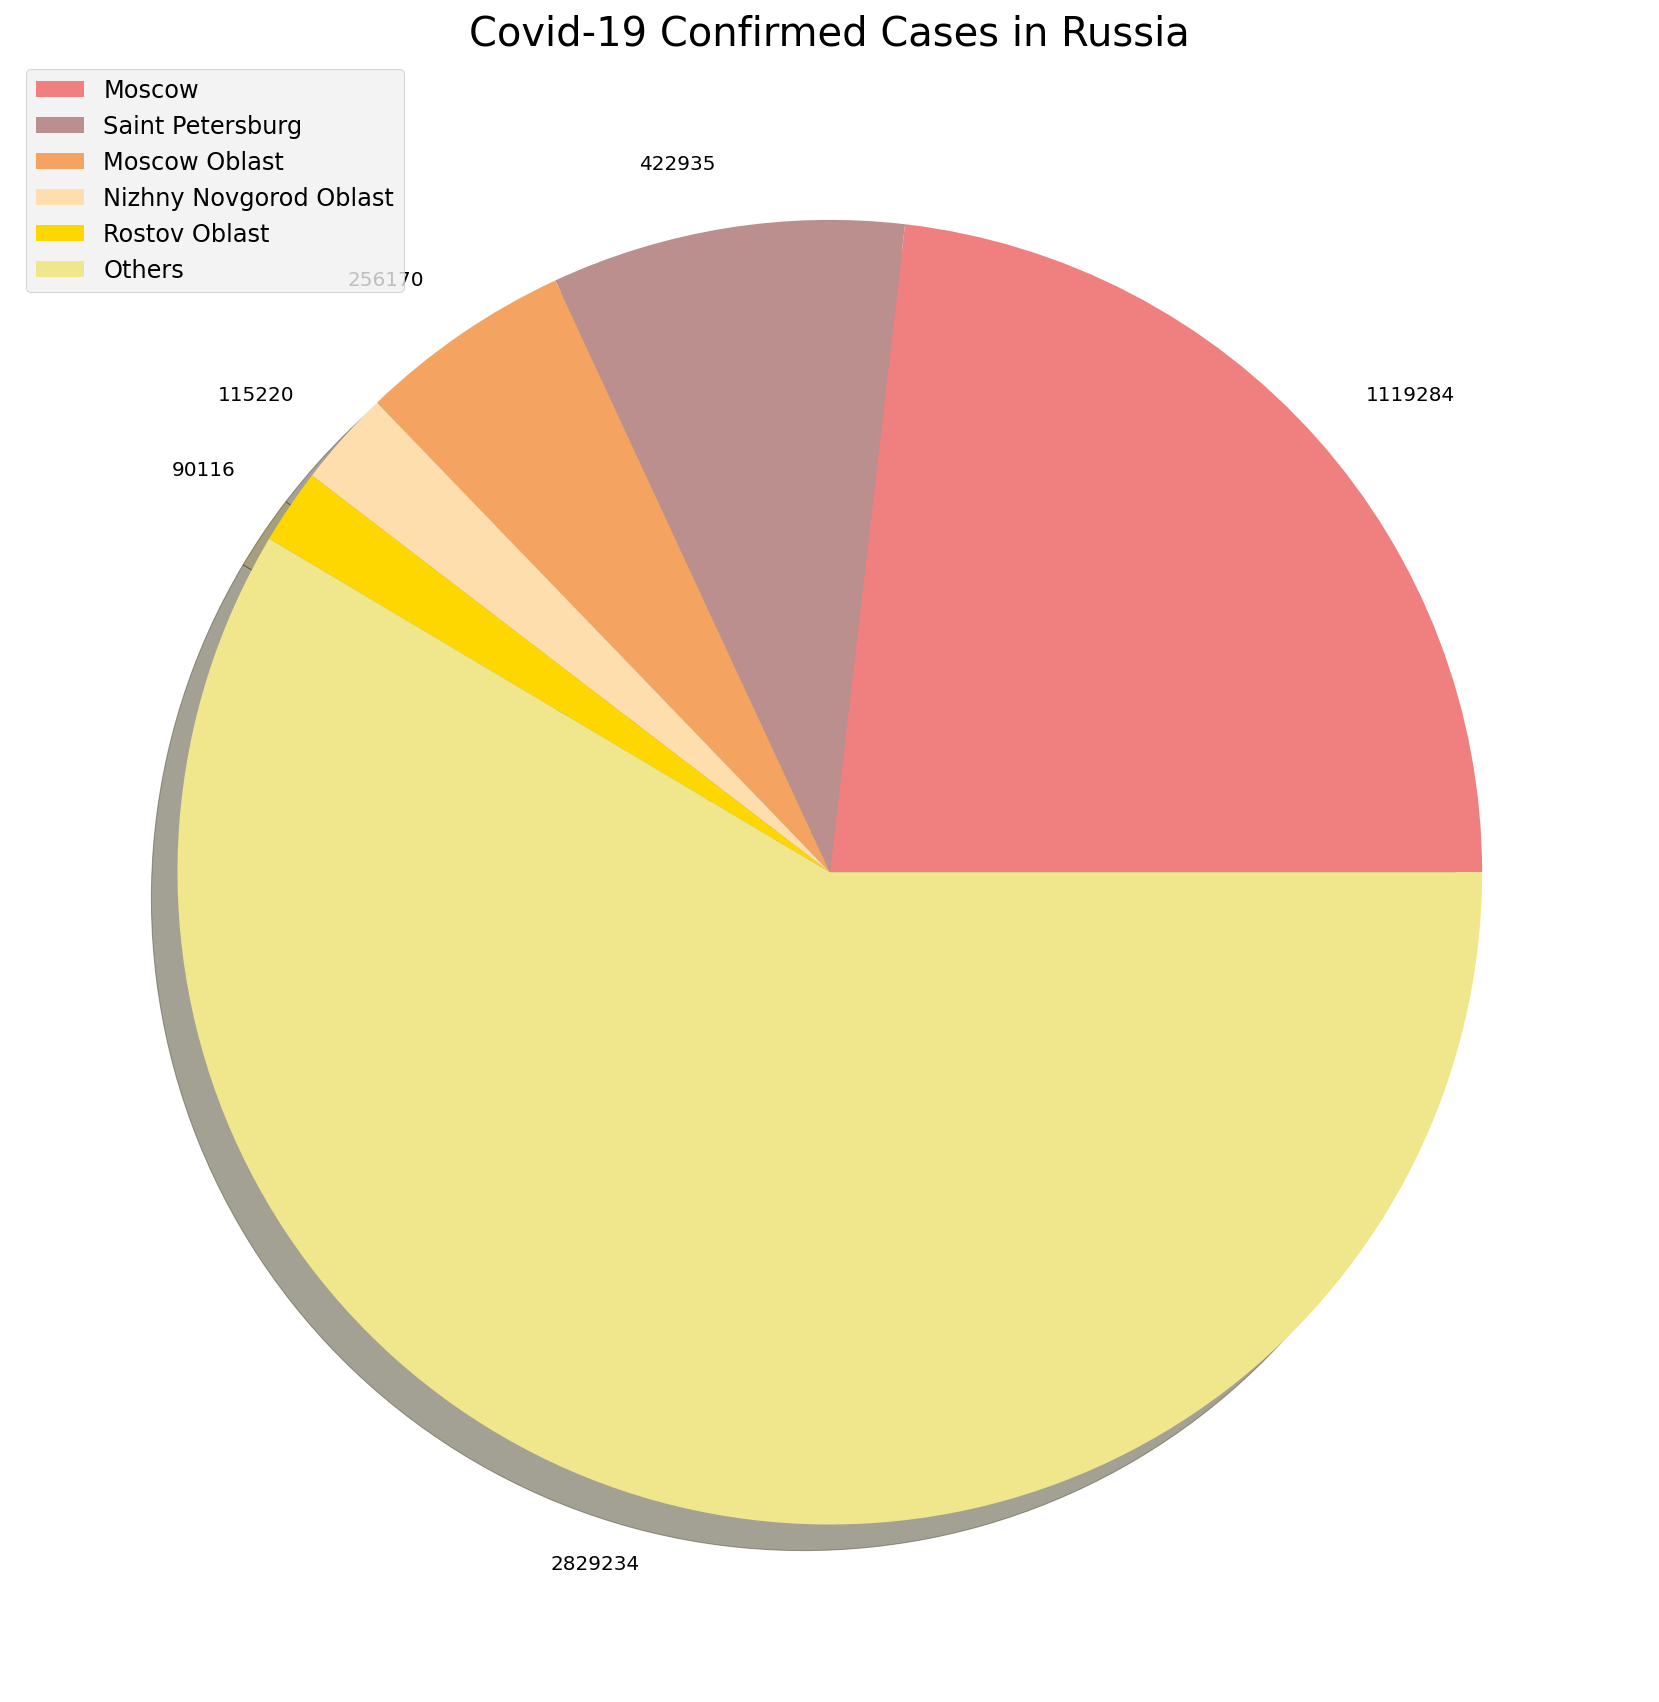

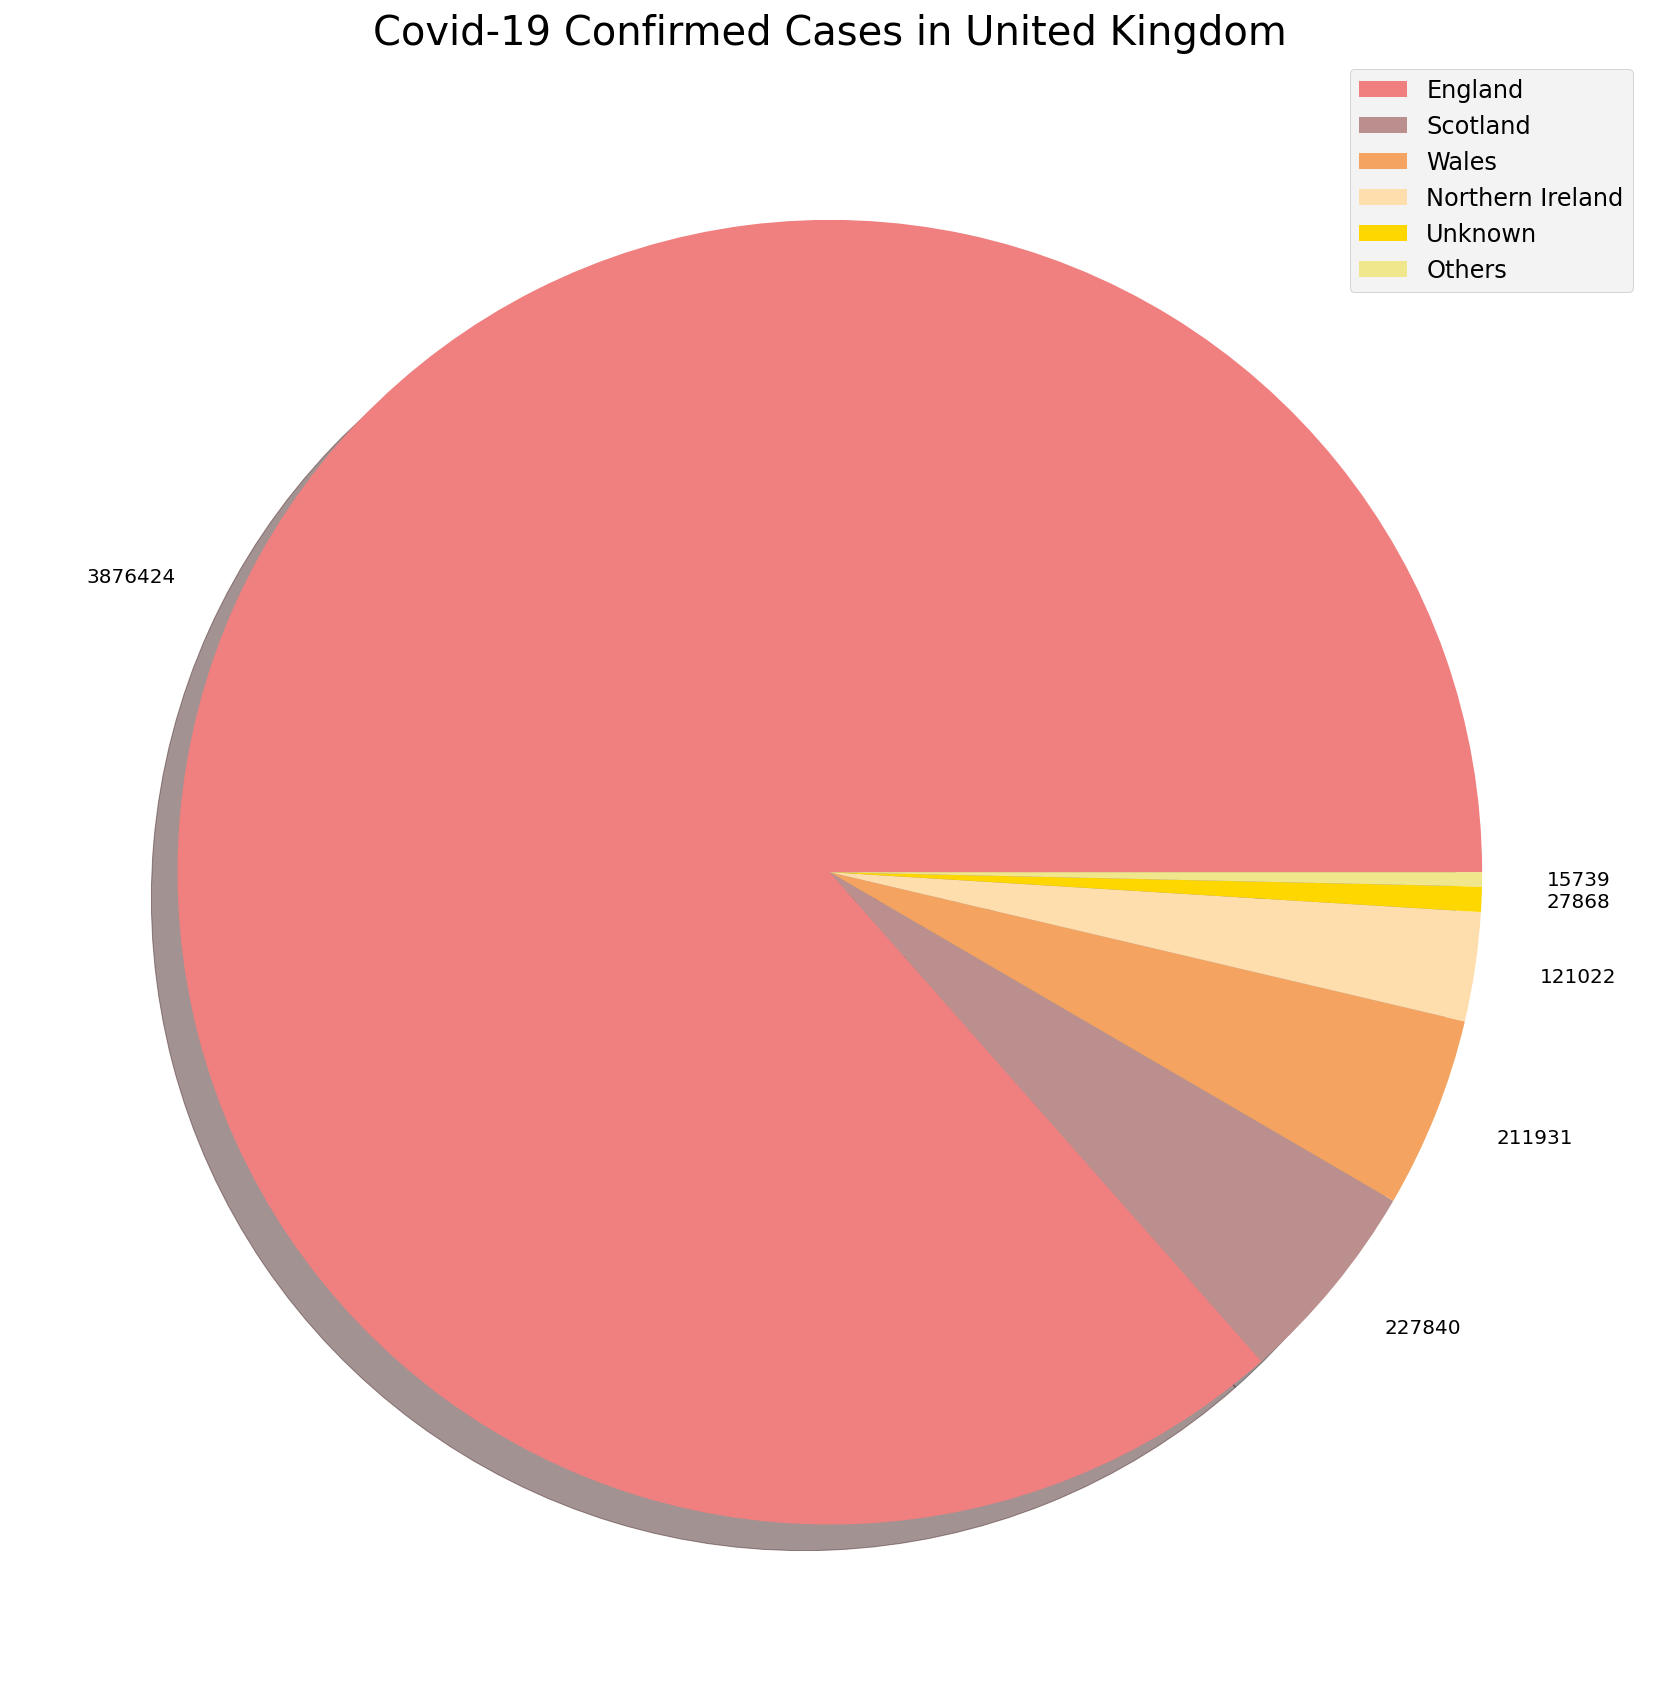

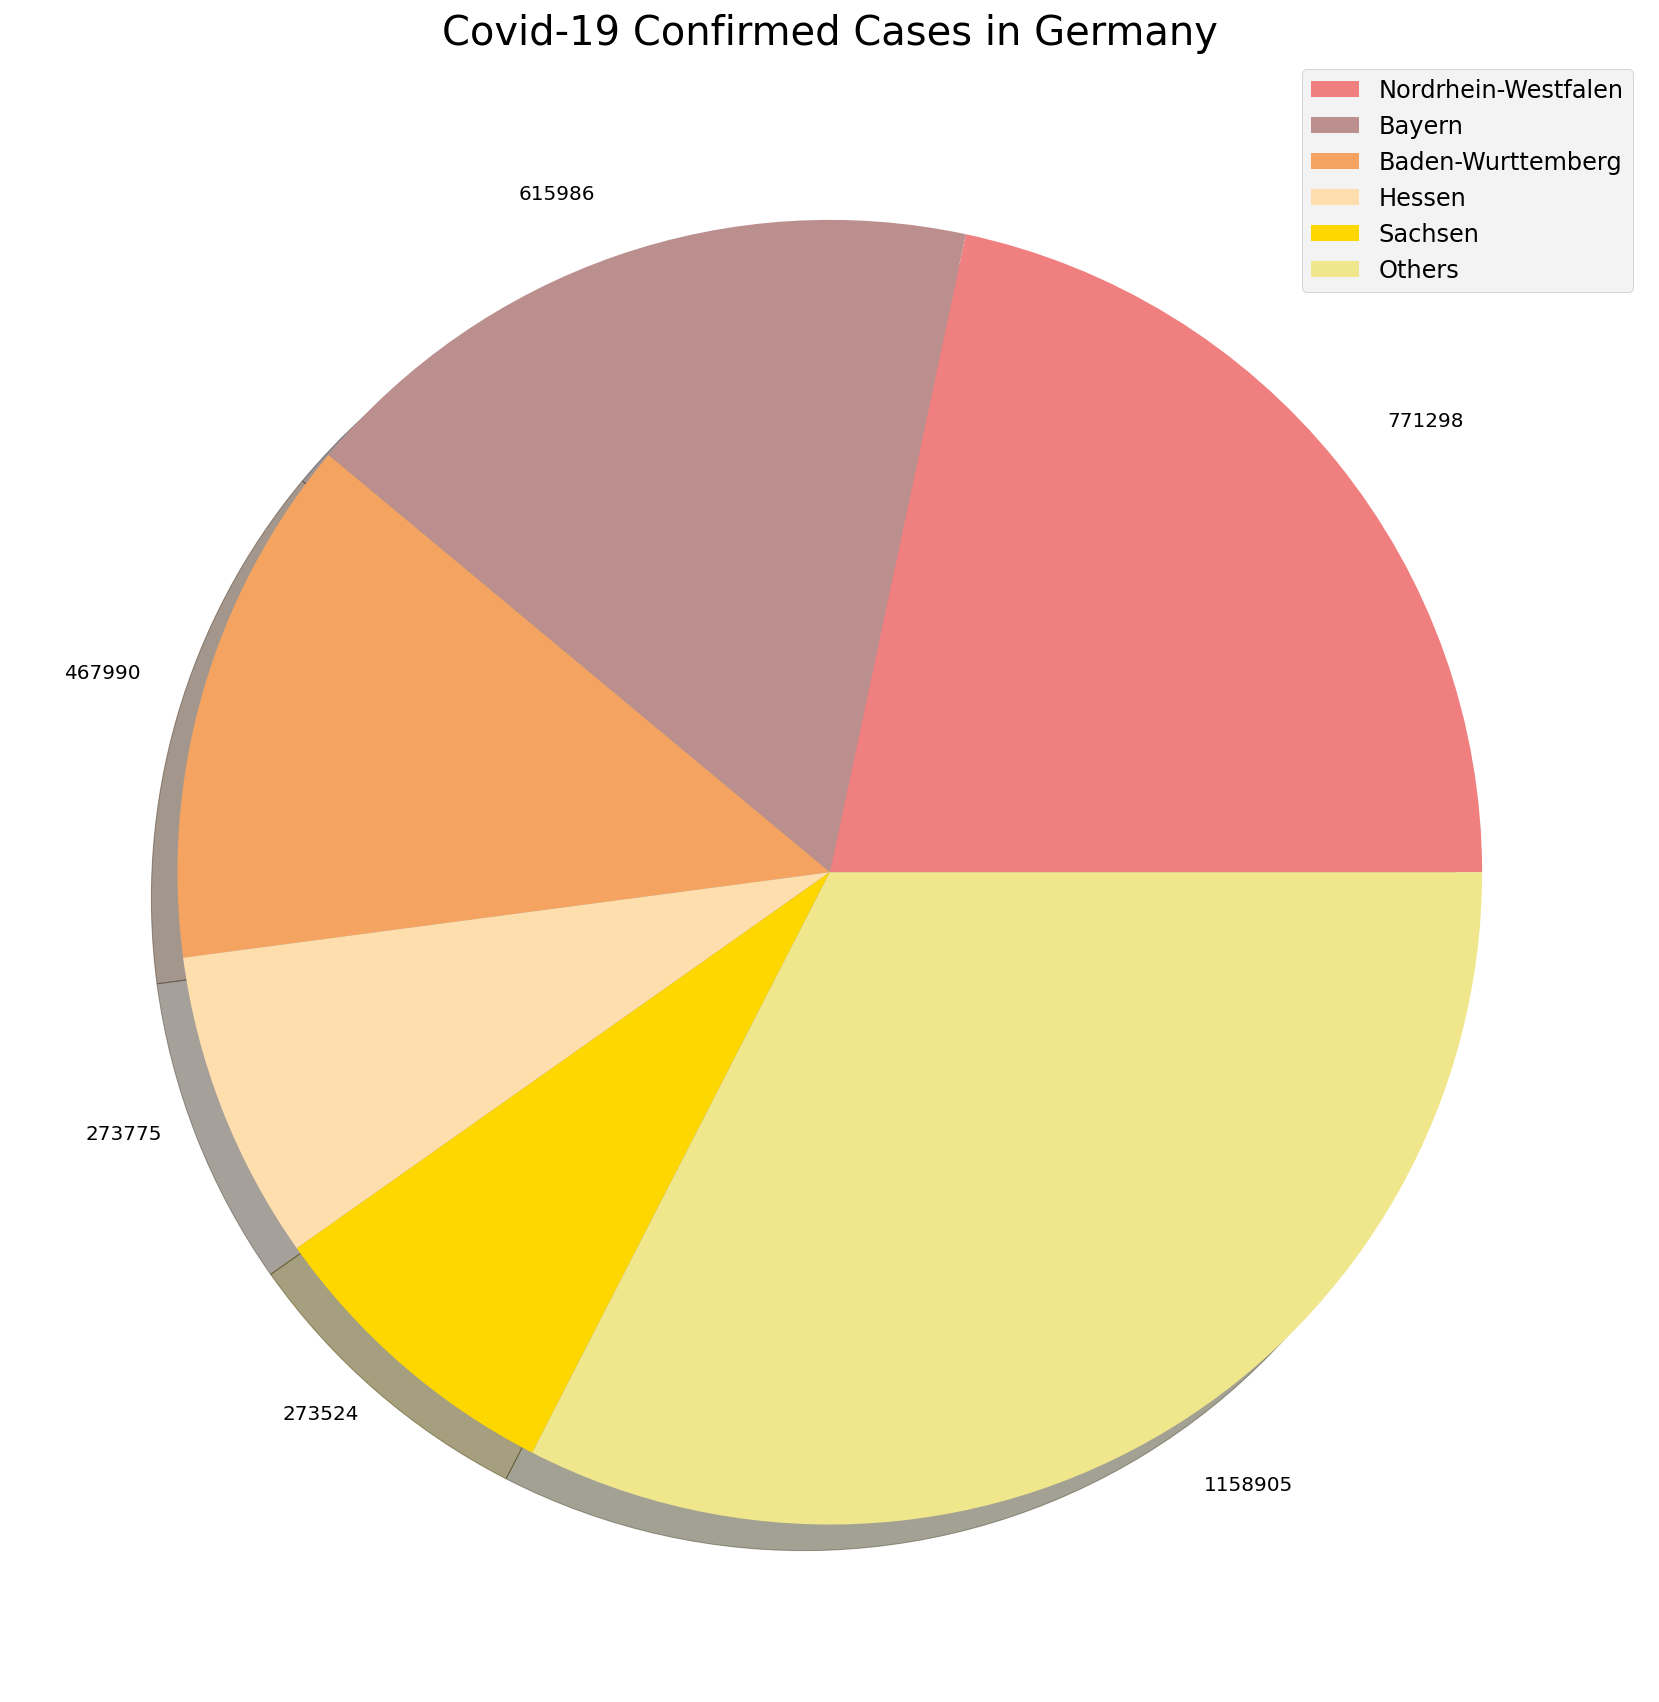

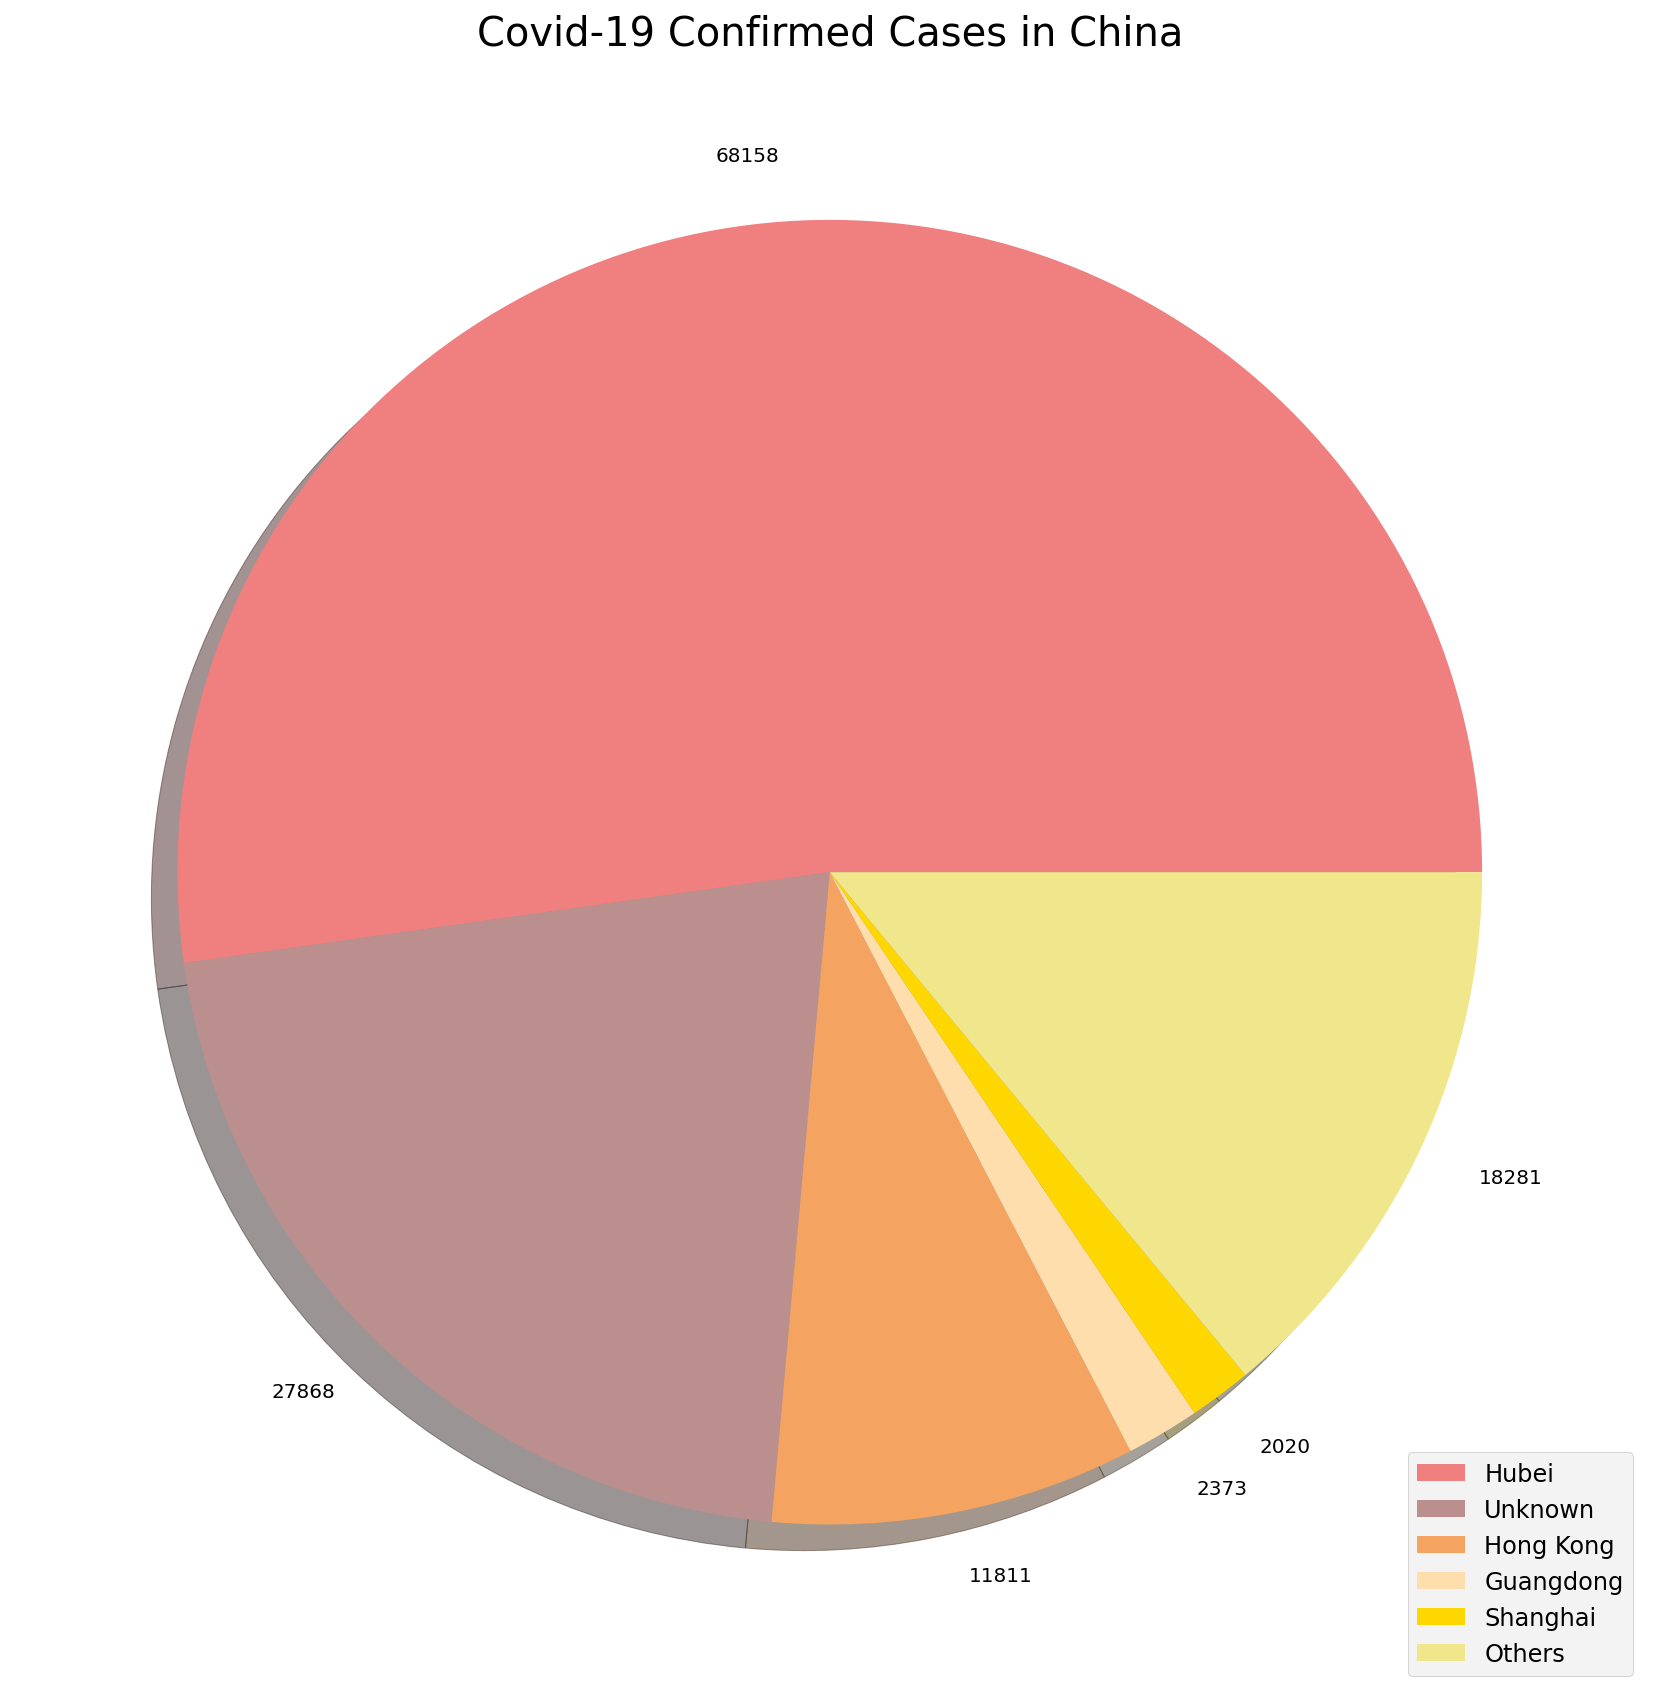

In [126]:
pie_chart_countries = ['US', 'India', 'Brazil', 'Russia', 'United Kingdom', 'Germany', 'China']

for i in pie_chart_countries:
    plot_pie_country_with_regions(i, 'Covid-19 Confirmed Cases in {}'.format(i))

## Thank You